In [1]:
import sys

import numpy as np
sys.path.append('./')
sys.path.append('../')
from simulation.envs.TWLRobot import TWLRobot, TWLRReduccedObsDiscete
 

import gymnasium as gym

from stable_baselines3 import PPO, DQN
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy

def make_env(rank: int, seed: int = 0):
    """
    Utility function for multiprocessed env.

    :param env_id: the environment ID
    :param num_env: the number of environments you wish to have in subprocesses
    :param seed: the initial seed for RNG
    :param rank: index of the subprocess
    """
    def _init():
        env = TWLRReduccedObsDiscete("../models/scene.xml", 2, termination_time = 3, time_first_reward = 3)
        env.goal = np.array([1, 0, 0.5])
        env._healthy_z_range = (0.3, 1.2)
        env.reset(seed=seed + rank)
        return env
    set_random_seed(seed)
    return _init

2024-08-29 19:47:24.762593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 19:47:24.778582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 19:47:24.783408: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 19:47:25.478105: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
if __name__ == "__main__":

    termination_time = 4
    num_cpu = 4
    vec_env = SubprocVecEnv([make_env(i*0xAB0BA) for i in range(num_cpu)])
    vec_env_eval = SubprocVecEnv([make_env(i) for i in range(num_cpu)])
    obs = vec_env.reset()
    eval_log_dir = "./ppo_eval/"
    model = PPO("MlpPolicy", vec_env, verbose=1, n_epochs= 30, learning_rate = 0.001, tensorboard_log="./ppo_train_reduced2/", device = "cpu", seed = 0xAB0BA)

    eval_callback = EvalCallback(vec_env_eval,
                              log_path=eval_log_dir, eval_freq=max(1000 // 4, 1), best_model_save_path="./coco_jambo/",
                              n_eval_episodes=2, deterministic=True,
                              render=False)
    
    model.learn(total_timesteps=3*500_000, progress_bar=True, tb_log_name="reduced", callback=eval_callback)

2024-08-29 19:47:39.336197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 19:47:39.352471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 19:47:39.358141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 19:47:39.384265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 19:47:39.400799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factor

Using cpu device
Logging to ./ppo_train_reduced2/reduced_9


Output()

/home/kirill/anaconda3/envs/twlr-rl/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: 
UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting 
modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first
with ``Monitor`` wrapper.
  warnings.warn(

Eval num_timesteps=1000, episode_reward=0.04 +/- 0.00

Episode length: 475.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 475      |
|    mean_reward     | 0.037    |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------


New best mean reward!

/home/kirill/anaconda3/envs/twlr-rl/lib/python3.11/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA 
initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env 
variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally 
at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0

Eval num_timesteps=2000, episode_reward=0.02 +/- 0.00

Episode length: 169.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 169      |
|    mean_reward     | 0.019    |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------


Eval num_timesteps=3000, episode_reward=0.02 +/- 0.00

Episode length: 144.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 144      |
|    mean_reward     | 0.0154   |
| time/              |          |
|    total_timesteps | 3000     |
---------------------------------


Eval num_timesteps=4000, episode_reward=0.02 +/- 0.00

Episode length: 134.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 134      |
|    mean_reward     | 0.0194   |
| time/              |          |
|    total_timesteps | 4000     |
---------------------------------


Eval num_timesteps=5000, episode_reward=0.02 +/- 0.00

Episode length: 125.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 125      |
|    mean_reward     | 0.0163   |
| time/              |          |
|    total_timesteps | 5000     |
---------------------------------


Eval num_timesteps=6000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0158   |
| time/              |          |
|    total_timesteps | 6000     |
---------------------------------


Eval num_timesteps=7000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0163   |
| time/              |          |
|    total_timesteps | 7000     |
---------------------------------


Eval num_timesteps=8000, episode_reward=0.02 +/- 0.00

Episode length: 121.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 121      |
|    mean_reward     | 0.0181   |
| time/              |          |
|    total_timesteps | 8000     |
---------------------------------


-----------------------------
| time/              |      |
|    fps             | 914  |
|    iterations      | 1    |
|    time_elapsed    | 8    |
|    total_timesteps | 8192 |
-----------------------------


Eval num_timesteps=9000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 119        |
|    mean_reward          | 0.0177     |
| time/                   |            |
|    total_timesteps      | 9000       |
| train/                  |            |
|    approx_kl            | 0.02381322 |
|    clip_fraction        | 0.193      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.3       |
|    explained_variance   | 0.803      |
|    learning_rate        | 0.001      |
|    loss                 | 0.00852    |
|    n_updates            | 30         |
|    policy_gradient_loss | -0.01      |
|    value_loss           | 0.000273   |
----------------------------------------


Eval num_timesteps=10000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0166   |
| time/              |          |
|    total_timesteps | 10000    |
---------------------------------


Eval num_timesteps=11000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0174   |
| time/              |          |
|    total_timesteps | 11000    |
---------------------------------


Eval num_timesteps=12000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0195   |
| time/              |          |
|    total_timesteps | 12000    |
---------------------------------


Eval num_timesteps=13000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.018    |
| time/              |          |
|    total_timesteps | 13000    |
---------------------------------


Eval num_timesteps=14000, episode_reward=0.01 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0141   |
| time/              |          |
|    total_timesteps | 14000    |
---------------------------------


Eval num_timesteps=15000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 15000    |
---------------------------------


Eval num_timesteps=16000, episode_reward=0.01 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.0144   |
| time/              |          |
|    total_timesteps | 16000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 516   |
|    iterations      | 2     |
|    time_elapsed    | 31    |
|    total_timesteps | 16384 |
------------------------------


Eval num_timesteps=17000, episode_reward=0.01 +/- 0.00

Episode length: 109.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 109         |
|    mean_reward          | 0.0147      |
| time/                   |             |
|    total_timesteps      | 17000       |
| train/                  |             |
|    approx_kl            | 0.012762498 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.28       |
|    explained_variance   | 0.747       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0117     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.00739    |
|    value_loss           | 0.000119    |
-----------------------------------------


Eval num_timesteps=18000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.019    |
| time/              |          |
|    total_timesteps | 18000    |
---------------------------------


Eval num_timesteps=19000, episode_reward=0.01 +/- 0.00

Episode length: 108.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 108      |
|    mean_reward     | 0.0128   |
| time/              |          |
|    total_timesteps | 19000    |
---------------------------------


Eval num_timesteps=20000, episode_reward=0.01 +/- 0.00

Episode length: 109.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 109      |
|    mean_reward     | 0.0141   |
| time/              |          |
|    total_timesteps | 20000    |
---------------------------------


Eval num_timesteps=21000, episode_reward=0.02 +/- 0.00

Episode length: 109.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 109      |
|    mean_reward     | 0.016    |
| time/              |          |
|    total_timesteps | 21000    |
---------------------------------


Eval num_timesteps=22000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0187   |
| time/              |          |
|    total_timesteps | 22000    |
---------------------------------


Eval num_timesteps=23000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0177   |
| time/              |          |
|    total_timesteps | 23000    |
---------------------------------


Eval num_timesteps=24000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0185   |
| time/              |          |
|    total_timesteps | 24000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 457   |
|    iterations      | 3     |
|    time_elapsed    | 53    |
|    total_timesteps | 24576 |
------------------------------


Eval num_timesteps=25000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 98          |
|    mean_reward          | 0.0102      |
| time/                   |             |
|    total_timesteps      | 25000       |
| train/                  |             |
|    approx_kl            | 0.018619038 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.24       |
|    explained_variance   | 0.673       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0233     |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00898    |
|    value_loss           | 9.16e-05    |
-----------------------------------------


Eval num_timesteps=26000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0104   |
| time/              |          |
|    total_timesteps | 26000    |
---------------------------------


Eval num_timesteps=27000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.011    |
| time/              |          |
|    total_timesteps | 27000    |
---------------------------------


Eval num_timesteps=28000, episode_reward=0.02 +/- 0.00

Episode length: 99.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 99       |
|    mean_reward     | 0.0166   |
| time/              |          |
|    total_timesteps | 28000    |
---------------------------------


Eval num_timesteps=29000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0136   |
| time/              |          |
|    total_timesteps | 29000    |
---------------------------------


Eval num_timesteps=30000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0146   |
| time/              |          |
|    total_timesteps | 30000    |
---------------------------------


Eval num_timesteps=31000, episode_reward=0.02 +/- 0.00

Episode length: 99.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 99       |
|    mean_reward     | 0.0169   |
| time/              |          |
|    total_timesteps | 31000    |
---------------------------------


Eval num_timesteps=32000, episode_reward=0.01 +/- 0.00

Episode length: 97.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 97       |
|    mean_reward     | 0.00984  |
| time/              |          |
|    total_timesteps | 32000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 434   |
|    iterations      | 4     |
|    time_elapsed    | 75    |
|    total_timesteps | 32768 |
------------------------------


Eval num_timesteps=33000, episode_reward=0.02 +/- 0.00

Episode length: 98.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 98          |
|    mean_reward          | 0.0161      |
| time/                   |             |
|    total_timesteps      | 33000       |
| train/                  |             |
|    approx_kl            | 0.020974614 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.19       |
|    explained_variance   | 0.543       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0112      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00723    |
|    value_loss           | 2.83e-05    |
-----------------------------------------


Eval num_timesteps=34000, episode_reward=0.02 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0162   |
| time/              |          |
|    total_timesteps | 34000    |
---------------------------------


Eval num_timesteps=35000, episode_reward=0.02 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0159   |
| time/              |          |
|    total_timesteps | 35000    |
---------------------------------


Eval num_timesteps=36000, episode_reward=0.02 +/- 0.00

Episode length: 99.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 99       |
|    mean_reward     | 0.0164   |
| time/              |          |
|    total_timesteps | 36000    |
---------------------------------


Eval num_timesteps=37000, episode_reward=0.01 +/- 0.00

Episode length: 97.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 97       |
|    mean_reward     | 0.0101   |
| time/              |          |
|    total_timesteps | 37000    |
---------------------------------


Eval num_timesteps=38000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.014    |
| time/              |          |
|    total_timesteps | 38000    |
---------------------------------


Eval num_timesteps=39000, episode_reward=0.02 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0151   |
| time/              |          |
|    total_timesteps | 39000    |
---------------------------------


Eval num_timesteps=40000, episode_reward=0.01 +/- 0.00

Episode length: 98.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 98       |
|    mean_reward     | 0.0145   |
| time/              |          |
|    total_timesteps | 40000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 425   |
|    iterations      | 5     |
|    time_elapsed    | 96    |
|    total_timesteps | 40960 |
------------------------------


Eval num_timesteps=41000, episode_reward=0.02 +/- 0.00

Episode length: 109.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 109         |
|    mean_reward          | 0.016       |
| time/                   |             |
|    total_timesteps      | 41000       |
| train/                  |             |
|    approx_kl            | 0.020021323 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.13       |
|    explained_variance   | 0.576       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0485     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00834    |
|    value_loss           | 8.67e-06    |
-----------------------------------------


Eval num_timesteps=42000, episode_reward=0.02 +/- 0.00

Episode length: 111.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 111      |
|    mean_reward     | 0.0194   |
| time/              |          |
|    total_timesteps | 42000    |
---------------------------------


Eval num_timesteps=43000, episode_reward=0.02 +/- 0.00

Episode length: 111.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 111      |
|    mean_reward     | 0.0193   |
| time/              |          |
|    total_timesteps | 43000    |
---------------------------------


Eval num_timesteps=44000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0186   |
| time/              |          |
|    total_timesteps | 44000    |
---------------------------------


Eval num_timesteps=45000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0187   |
| time/              |          |
|    total_timesteps | 45000    |
---------------------------------


Eval num_timesteps=46000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0179   |
| time/              |          |
|    total_timesteps | 46000    |
---------------------------------


Eval num_timesteps=47000, episode_reward=0.02 +/- 0.00

Episode length: 111.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 111      |
|    mean_reward     | 0.0192   |
| time/              |          |
|    total_timesteps | 47000    |
---------------------------------


Eval num_timesteps=48000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0174   |
| time/              |          |
|    total_timesteps | 48000    |
---------------------------------


Eval num_timesteps=49000, episode_reward=0.02 +/- 0.00

Episode length: 110.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 110      |
|    mean_reward     | 0.0176   |
| time/              |          |
|    total_timesteps | 49000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 419   |
|    iterations      | 6     |
|    time_elapsed    | 117   |
|    total_timesteps | 49152 |
------------------------------


Eval num_timesteps=50000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 115         |
|    mean_reward          | 0.0193      |
| time/                   |             |
|    total_timesteps      | 50000       |
| train/                  |             |
|    approx_kl            | 0.014953302 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.12       |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00861    |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.00485    |
|    value_loss           | 3.74e-06    |
-----------------------------------------


Eval num_timesteps=51000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.017    |
| time/              |          |
|    total_timesteps | 51000    |
---------------------------------


Eval num_timesteps=52000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0198   |
| time/              |          |
|    total_timesteps | 52000    |
---------------------------------


Eval num_timesteps=53000, episode_reward=0.01 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0147   |
| time/              |          |
|    total_timesteps | 53000    |
---------------------------------


Eval num_timesteps=54000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0152   |
| time/              |          |
|    total_timesteps | 54000    |
---------------------------------


Eval num_timesteps=55000, episode_reward=0.02 +/- 0.00

Episode length: 121.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 121      |
|    mean_reward     | 0.0179   |
| time/              |          |
|    total_timesteps | 55000    |
---------------------------------


Eval num_timesteps=56000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0197   |
| time/              |          |
|    total_timesteps | 56000    |
---------------------------------


Eval num_timesteps=57000, episode_reward=0.01 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0143   |
| time/              |          |
|    total_timesteps | 57000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 415   |
|    iterations      | 7     |
|    time_elapsed    | 137   |
|    total_timesteps | 57344 |
------------------------------


Eval num_timesteps=58000, episode_reward=0.01 +/- 0.00

Episode length: 108.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 108          |
|    mean_reward          | 0.0144       |
| time/                   |              |
|    total_timesteps      | 58000        |
| train/                  |              |
|    approx_kl            | 0.0071362145 |
|    clip_fraction        | 0.0991       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.11        |
|    explained_variance   | 0.907        |
|    learning_rate        | 0.001        |
|    loss                 | -0.0203      |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.00345     |
|    value_loss           | 3.28e-06     |
------------------------------------------


Eval num_timesteps=59000, episode_reward=0.01 +/- 0.00

Episode length: 112.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 112      |
|    mean_reward     | 0.0125   |
| time/              |          |
|    total_timesteps | 59000    |
---------------------------------


Eval num_timesteps=60000, episode_reward=0.02 +/- 0.00

Episode length: 121.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 121      |
|    mean_reward     | 0.0178   |
| time/              |          |
|    total_timesteps | 60000    |
---------------------------------


Eval num_timesteps=61000, episode_reward=0.02 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 135      |
|    mean_reward     | 0.0187   |
| time/              |          |
|    total_timesteps | 61000    |
---------------------------------


Eval num_timesteps=62000, episode_reward=0.02 +/- 0.00

Episode length: 168.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 168      |
|    mean_reward     | 0.0234   |
| time/              |          |
|    total_timesteps | 62000    |
---------------------------------


Eval num_timesteps=63000, episode_reward=0.02 +/- 0.00

Episode length: 191.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 191      |
|    mean_reward     | 0.0211   |
| time/              |          |
|    total_timesteps | 63000    |
---------------------------------


Eval num_timesteps=64000, episode_reward=0.03 +/- 0.00

Episode length: 196.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 196      |
|    mean_reward     | 0.0292   |
| time/              |          |
|    total_timesteps | 64000    |
---------------------------------


Eval num_timesteps=65000, episode_reward=0.02 +/- 0.00

Episode length: 191.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 191      |
|    mean_reward     | 0.0226   |
| time/              |          |
|    total_timesteps | 65000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 407   |
|    iterations      | 8     |
|    time_elapsed    | 160   |
|    total_timesteps | 65536 |
------------------------------


Eval num_timesteps=66000, episode_reward=0.03 +/- 0.00

Episode length: 232.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 232         |
|    mean_reward          | 0.0289      |
| time/                   |             |
|    total_timesteps      | 66000       |
| train/                  |             |
|    approx_kl            | 0.022106722 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.12       |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00263    |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.00637    |
|    value_loss           | 2.88e-06    |
-----------------------------------------


Eval num_timesteps=67000, episode_reward=0.03 +/- 0.00

Episode length: 233.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 233      |
|    mean_reward     | 0.0321   |
| time/              |          |
|    total_timesteps | 67000    |
---------------------------------


Eval num_timesteps=68000, episode_reward=0.02 +/- 0.00

Episode length: 229.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 229      |
|    mean_reward     | 0.0243   |
| time/              |          |
|    total_timesteps | 68000    |
---------------------------------


Eval num_timesteps=69000, episode_reward=0.03 +/- 0.00

Episode length: 228.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 228      |
|    mean_reward     | 0.0256   |
| time/              |          |
|    total_timesteps | 69000    |
---------------------------------


Eval num_timesteps=70000, episode_reward=0.03 +/- 0.00

Episode length: 232.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 232      |
|    mean_reward     | 0.0309   |
| time/              |          |
|    total_timesteps | 70000    |
---------------------------------


Eval num_timesteps=71000, episode_reward=0.03 +/- 0.00

Episode length: 231.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 231      |
|    mean_reward     | 0.0286   |
| time/              |          |
|    total_timesteps | 71000    |
---------------------------------


Eval num_timesteps=72000, episode_reward=0.02 +/- 0.00

Episode length: 229.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 229      |
|    mean_reward     | 0.0242   |
| time/              |          |
|    total_timesteps | 72000    |
---------------------------------


Eval num_timesteps=73000, episode_reward=0.03 +/- 0.00

Episode length: 230.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 230      |
|    mean_reward     | 0.0283   |
| time/              |          |
|    total_timesteps | 73000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 404   |
|    iterations      | 9     |
|    time_elapsed    | 182   |
|    total_timesteps | 73728 |
------------------------------


Eval num_timesteps=74000, episode_reward=0.03 +/- 0.00

Episode length: 255.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 255         |
|    mean_reward          | 0.0306      |
| time/                   |             |
|    total_timesteps      | 74000       |
| train/                  |             |
|    approx_kl            | 0.010524208 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.1        |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00124     |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.00436    |
|    value_loss           | 3.45e-06    |
-----------------------------------------


Eval num_timesteps=75000, episode_reward=0.02 +/- 0.00

Episode length: 238.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 238      |
|    mean_reward     | 0.0239   |
| time/              |          |
|    total_timesteps | 75000    |
---------------------------------


Eval num_timesteps=76000, episode_reward=0.03 +/- 0.00

Episode length: 245.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 245      |
|    mean_reward     | 0.0295   |
| time/              |          |
|    total_timesteps | 76000    |
---------------------------------


Eval num_timesteps=77000, episode_reward=0.03 +/- 0.00

Episode length: 242.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 242      |
|    mean_reward     | 0.0282   |
| time/              |          |
|    total_timesteps | 77000    |
---------------------------------


Eval num_timesteps=78000, episode_reward=0.02 +/- 0.00

Episode length: 234.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 234      |
|    mean_reward     | 0.0239   |
| time/              |          |
|    total_timesteps | 78000    |
---------------------------------


Eval num_timesteps=79000, episode_reward=0.03 +/- 0.00

Episode length: 246.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 246      |
|    mean_reward     | 0.0328   |
| time/              |          |
|    total_timesteps | 79000    |
---------------------------------


Eval num_timesteps=80000, episode_reward=0.03 +/- 0.00

Episode length: 240.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 240      |
|    mean_reward     | 0.0269   |
| time/              |          |
|    total_timesteps | 80000    |
---------------------------------


Eval num_timesteps=81000, episode_reward=0.02 +/- 0.00

Episode length: 236.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 236      |
|    mean_reward     | 0.0235   |
| time/              |          |
|    total_timesteps | 81000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 401   |
|    iterations      | 10    |
|    time_elapsed    | 204   |
|    total_timesteps | 81920 |
------------------------------


Eval num_timesteps=82000, episode_reward=0.03 +/- 0.00

Episode length: 243.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 243         |
|    mean_reward          | 0.0317      |
| time/                   |             |
|    total_timesteps      | 82000       |
| train/                  |             |
|    approx_kl            | 0.017069355 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.11       |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0507      |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00854    |
|    value_loss           | 2.5e-06     |
-----------------------------------------


Eval num_timesteps=83000, episode_reward=0.03 +/- 0.00

Episode length: 254.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 254      |
|    mean_reward     | 0.0297   |
| time/              |          |
|    total_timesteps | 83000    |
---------------------------------


Eval num_timesteps=84000, episode_reward=0.02 +/- 0.00

Episode length: 235.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 235      |
|    mean_reward     | 0.0212   |
| time/              |          |
|    total_timesteps | 84000    |
---------------------------------


Eval num_timesteps=85000, episode_reward=0.03 +/- 0.00

Episode length: 249.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 249      |
|    mean_reward     | 0.0259   |
| time/              |          |
|    total_timesteps | 85000    |
---------------------------------


Eval num_timesteps=86000, episode_reward=0.02 +/- 0.00

Episode length: 237.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 237      |
|    mean_reward     | 0.0223   |
| time/              |          |
|    total_timesteps | 86000    |
---------------------------------


Eval num_timesteps=87000, episode_reward=0.03 +/- 0.00

Episode length: 254.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 254      |
|    mean_reward     | 0.0304   |
| time/              |          |
|    total_timesteps | 87000    |
---------------------------------


Eval num_timesteps=88000, episode_reward=0.03 +/- 0.00

Episode length: 244.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 244      |
|    mean_reward     | 0.0298   |
| time/              |          |
|    total_timesteps | 88000    |
---------------------------------


Eval num_timesteps=89000, episode_reward=0.03 +/- 0.00

Episode length: 257.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 257      |
|    mean_reward     | 0.0308   |
| time/              |          |
|    total_timesteps | 89000    |
---------------------------------


Eval num_timesteps=90000, episode_reward=0.02 +/- 0.00

Episode length: 236.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 236      |
|    mean_reward     | 0.0208   |
| time/              |          |
|    total_timesteps | 90000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 397   |
|    iterations      | 11    |
|    time_elapsed    | 226   |
|    total_timesteps | 90112 |
------------------------------


Eval num_timesteps=91000, episode_reward=0.04 +/- 0.00

Episode length: 278.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 278         |
|    mean_reward          | 0.0388      |
| time/                   |             |
|    total_timesteps      | 91000       |
| train/                  |             |
|    approx_kl            | 0.013276171 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.1        |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00925     |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.00663    |
|    value_loss           | 2.87e-06    |
-----------------------------------------


New best mean reward!

Eval num_timesteps=92000, episode_reward=0.03 +/- 0.00

Episode length: 174.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 174      |
|    mean_reward     | 0.031    |
| time/              |          |
|    total_timesteps | 92000    |
---------------------------------


Eval num_timesteps=93000, episode_reward=0.05 +/- 0.00

Episode length: 389.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 389      |
|    mean_reward     | 0.0512   |
| time/              |          |
|    total_timesteps | 93000    |
---------------------------------


New best mean reward!

Eval num_timesteps=94000, episode_reward=0.05 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0522   |
| time/              |          |
|    total_timesteps | 94000    |
---------------------------------


New best mean reward!

Eval num_timesteps=95000, episode_reward=0.06 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0556   |
| time/              |          |
|    total_timesteps | 95000    |
---------------------------------


New best mean reward!

Eval num_timesteps=96000, episode_reward=0.08 +/- 0.00

Episode length: 343.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 343      |
|    mean_reward     | 0.0795   |
| time/              |          |
|    total_timesteps | 96000    |
---------------------------------


New best mean reward!

Eval num_timesteps=97000, episode_reward=0.05 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 388      |
|    mean_reward     | 0.0506   |
| time/              |          |
|    total_timesteps | 97000    |
---------------------------------


Eval num_timesteps=98000, episode_reward=0.05 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0523   |
| time/              |          |
|    total_timesteps | 98000    |
---------------------------------


------------------------------
| time/              |       |
|    fps             | 392   |
|    iterations      | 12    |
|    time_elapsed    | 250   |
|    total_timesteps | 98304 |
------------------------------


Eval num_timesteps=99000, episode_reward=0.03 +/- 0.00

Episode length: 206.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 206         |
|    mean_reward          | 0.0259      |
| time/                   |             |
|    total_timesteps      | 99000       |
| train/                  |             |
|    approx_kl            | 0.014601852 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.1        |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0159     |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00615    |
|    value_loss           | 1.83e-06    |
-----------------------------------------


Eval num_timesteps=100000, episode_reward=0.04 +/- 0.00

Episode length: 369.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 369      |
|    mean_reward     | 0.037    |
| time/              |          |
|    total_timesteps | 100000   |
---------------------------------


Eval num_timesteps=101000, episode_reward=0.03 +/- 0.00

Episode length: 225.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 225      |
|    mean_reward     | 0.0283   |
| time/              |          |
|    total_timesteps | 101000   |
---------------------------------


Eval num_timesteps=102000, episode_reward=0.03 +/- 0.00

Episode length: 347.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 347      |
|    mean_reward     | 0.0272   |
| time/              |          |
|    total_timesteps | 102000   |
---------------------------------


Eval num_timesteps=103000, episode_reward=0.03 +/- 0.00

Episode length: 228.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 228      |
|    mean_reward     | 0.0279   |
| time/              |          |
|    total_timesteps | 103000   |
---------------------------------


Eval num_timesteps=104000, episode_reward=0.04 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0377   |
| time/              |          |
|    total_timesteps | 104000   |
---------------------------------


Eval num_timesteps=105000, episode_reward=0.02 +/- 0.00

Episode length: 214.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 214      |
|    mean_reward     | 0.0182   |
| time/              |          |
|    total_timesteps | 105000   |
---------------------------------


Eval num_timesteps=106000, episode_reward=0.03 +/- 0.00

Episode length: 343.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 343      |
|    mean_reward     | 0.0265   |
| time/              |          |
|    total_timesteps | 106000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 385    |
|    iterations      | 13     |
|    time_elapsed    | 276    |
|    total_timesteps | 106496 |
-------------------------------


Eval num_timesteps=107000, episode_reward=0.06 +/- 0.00

Episode length: 360.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 360         |
|    mean_reward          | 0.0628      |
| time/                   |             |
|    total_timesteps      | 107000      |
| train/                  |             |
|    approx_kl            | 0.023749512 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.13       |
|    explained_variance   | 0.949       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00212    |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.00799    |
|    value_loss           | 2.03e-06    |
-----------------------------------------


Eval num_timesteps=108000, episode_reward=0.02 +/- 0.00

Episode length: 236.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 236      |
|    mean_reward     | 0.0248   |
| time/              |          |
|    total_timesteps | 108000   |
---------------------------------


Eval num_timesteps=109000, episode_reward=0.09 +/- 0.00

Episode length: 332.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 332      |
|    mean_reward     | 0.0854   |
| time/              |          |
|    total_timesteps | 109000   |
---------------------------------


New best mean reward!

Eval num_timesteps=110000, episode_reward=0.03 +/- 0.00

Episode length: 234.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 234      |
|    mean_reward     | 0.0253   |
| time/              |          |
|    total_timesteps | 110000   |
---------------------------------


Eval num_timesteps=111000, episode_reward=0.08 +/- 0.00

Episode length: 337.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 337      |
|    mean_reward     | 0.0778   |
| time/              |          |
|    total_timesteps | 111000   |
---------------------------------


Eval num_timesteps=112000, episode_reward=0.03 +/- 0.00

Episode length: 229.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 229      |
|    mean_reward     | 0.0255   |
| time/              |          |
|    total_timesteps | 112000   |
---------------------------------


Eval num_timesteps=113000, episode_reward=0.07 +/- 0.00

Episode length: 343.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 343      |
|    mean_reward     | 0.0682   |
| time/              |          |
|    total_timesteps | 113000   |
---------------------------------


Eval num_timesteps=114000, episode_reward=0.03 +/- 0.00

Episode length: 239.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 239      |
|    mean_reward     | 0.0252   |
| time/              |          |
|    total_timesteps | 114000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 380    |
|    iterations      | 14     |
|    time_elapsed    | 301    |
|    total_timesteps | 114688 |
-------------------------------


Eval num_timesteps=115000, episode_reward=0.02 +/- 0.00

Episode length: 238.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 238          |
|    mean_reward          | 0.0197       |
| time/                   |              |
|    total_timesteps      | 115000       |
| train/                  |              |
|    approx_kl            | 0.0152309425 |
|    clip_fraction        | 0.163        |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.15        |
|    explained_variance   | 0.963        |
|    learning_rate        | 0.001        |
|    loss                 | 0.0245       |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.00675     |
|    value_loss           | 2.12e-06     |
------------------------------------------


Eval num_timesteps=116000, episode_reward=0.03 +/- 0.00

Episode length: 311.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 311      |
|    mean_reward     | 0.0316   |
| time/              |          |
|    total_timesteps | 116000   |
---------------------------------


Eval num_timesteps=117000, episode_reward=0.02 +/- 0.00

Episode length: 312.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 312      |
|    mean_reward     | 0.024    |
| time/              |          |
|    total_timesteps | 117000   |
---------------------------------


Eval num_timesteps=118000, episode_reward=0.03 +/- 0.00

Episode length: 311.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 311      |
|    mean_reward     | 0.0336   |
| time/              |          |
|    total_timesteps | 118000   |
---------------------------------


Eval num_timesteps=119000, episode_reward=0.02 +/- 0.00

Episode length: 322.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 322      |
|    mean_reward     | 0.0244   |
| time/              |          |
|    total_timesteps | 119000   |
---------------------------------


Eval num_timesteps=120000, episode_reward=0.03 +/- 0.00

Episode length: 311.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 311      |
|    mean_reward     | 0.0282   |
| time/              |          |
|    total_timesteps | 120000   |
---------------------------------


Eval num_timesteps=121000, episode_reward=0.03 +/- 0.00

Episode length: 310.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 310      |
|    mean_reward     | 0.0332   |
| time/              |          |
|    total_timesteps | 121000   |
---------------------------------


Eval num_timesteps=122000, episode_reward=0.02 +/- 0.00

Episode length: 315.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 315      |
|    mean_reward     | 0.0247   |
| time/              |          |
|    total_timesteps | 122000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 377    |
|    iterations      | 15     |
|    time_elapsed    | 325    |
|    total_timesteps | 122880 |
-------------------------------


Eval num_timesteps=123000, episode_reward=0.03 +/- 0.00

Episode length: 274.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 274         |
|    mean_reward          | 0.0314      |
| time/                   |             |
|    total_timesteps      | 123000      |
| train/                  |             |
|    approx_kl            | 0.013037735 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.17       |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00216    |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00716    |
|    value_loss           | 1.97e-06    |
-----------------------------------------


Eval num_timesteps=124000, episode_reward=0.03 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0342   |
| time/              |          |
|    total_timesteps | 124000   |
---------------------------------


Eval num_timesteps=125000, episode_reward=0.02 +/- 0.00

Episode length: 263.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 263      |
|    mean_reward     | 0.023    |
| time/              |          |
|    total_timesteps | 125000   |
---------------------------------


Eval num_timesteps=126000, episode_reward=0.02 +/- 0.00

Episode length: 264.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 264      |
|    mean_reward     | 0.0227   |
| time/              |          |
|    total_timesteps | 126000   |
---------------------------------


Eval num_timesteps=127000, episode_reward=0.03 +/- 0.00

Episode length: 266.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 266      |
|    mean_reward     | 0.0295   |
| time/              |          |
|    total_timesteps | 127000   |
---------------------------------


Eval num_timesteps=128000, episode_reward=0.03 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0344   |
| time/              |          |
|    total_timesteps | 128000   |
---------------------------------


Eval num_timesteps=129000, episode_reward=0.03 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.03     |
| time/              |          |
|    total_timesteps | 129000   |
---------------------------------


Eval num_timesteps=130000, episode_reward=0.02 +/- 0.00

Episode length: 264.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 264      |
|    mean_reward     | 0.0218   |
| time/              |          |
|    total_timesteps | 130000   |
---------------------------------


Eval num_timesteps=131000, episode_reward=0.03 +/- 0.00

Episode length: 267.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 267      |
|    mean_reward     | 0.0318   |
| time/              |          |
|    total_timesteps | 131000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 374    |
|    iterations      | 16     |
|    time_elapsed    | 349    |
|    total_timesteps | 131072 |
-------------------------------


Eval num_timesteps=132000, episode_reward=0.02 +/- 0.00

Episode length: 317.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 317         |
|    mean_reward          | 0.0204      |
| time/                   |             |
|    total_timesteps      | 132000      |
| train/                  |             |
|    approx_kl            | 0.012207052 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.17       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0141     |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.00711    |
|    value_loss           | 1.73e-06    |
-----------------------------------------


Eval num_timesteps=133000, episode_reward=0.04 +/- 0.00

Episode length: 560.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 560      |
|    mean_reward     | 0.0446   |
| time/              |          |
|    total_timesteps | 133000   |
---------------------------------


Eval num_timesteps=134000, episode_reward=0.03 +/- 0.00

Episode length: 462.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 462      |
|    mean_reward     | 0.0347   |
| time/              |          |
|    total_timesteps | 134000   |
---------------------------------


Eval num_timesteps=135000, episode_reward=0.03 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.0256   |
| time/              |          |
|    total_timesteps | 135000   |
---------------------------------


Eval num_timesteps=136000, episode_reward=0.03 +/- 0.00

Episode length: 459.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 459      |
|    mean_reward     | 0.0341   |
| time/              |          |
|    total_timesteps | 136000   |
---------------------------------


Eval num_timesteps=137000, episode_reward=0.03 +/- 0.00

Episode length: 401.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 401      |
|    mean_reward     | 0.0272   |
| time/              |          |
|    total_timesteps | 137000   |
---------------------------------


Eval num_timesteps=138000, episode_reward=0.03 +/- 0.00

Episode length: 433.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 433      |
|    mean_reward     | 0.0314   |
| time/              |          |
|    total_timesteps | 138000   |
---------------------------------


Eval num_timesteps=139000, episode_reward=0.03 +/- 0.00

Episode length: 448.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 448      |
|    mean_reward     | 0.0335   |
| time/              |          |
|    total_timesteps | 139000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 369    |
|    iterations      | 17     |
|    time_elapsed    | 377    |
|    total_timesteps | 139264 |
-------------------------------


Eval num_timesteps=140000, episode_reward=0.05 +/- 0.00

Episode length: 398.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 398         |
|    mean_reward          | 0.0519      |
| time/                   |             |
|    total_timesteps      | 140000      |
| train/                  |             |
|    approx_kl            | 0.011245927 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.14       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0188     |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.00616    |
|    value_loss           | 1.72e-06    |
-----------------------------------------


Eval num_timesteps=141000, episode_reward=0.05 +/- 0.00

Episode length: 511.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 511      |
|    mean_reward     | 0.0491   |
| time/              |          |
|    total_timesteps | 141000   |
---------------------------------


Eval num_timesteps=142000, episode_reward=0.04 +/- 0.00

Episode length: 434.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 434      |
|    mean_reward     | 0.038    |
| time/              |          |
|    total_timesteps | 142000   |
---------------------------------


Eval num_timesteps=143000, episode_reward=0.04 +/- 0.00

Episode length: 427.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 427      |
|    mean_reward     | 0.0354   |
| time/              |          |
|    total_timesteps | 143000   |
---------------------------------


Eval num_timesteps=144000, episode_reward=0.03 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0322   |
| time/              |          |
|    total_timesteps | 144000   |
---------------------------------


Eval num_timesteps=145000, episode_reward=0.04 +/- 0.00

Episode length: 467.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 467      |
|    mean_reward     | 0.0442   |
| time/              |          |
|    total_timesteps | 145000   |
---------------------------------


Eval num_timesteps=146000, episode_reward=0.05 +/- 0.00

Episode length: 490.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 490      |
|    mean_reward     | 0.0476   |
| time/              |          |
|    total_timesteps | 146000   |
---------------------------------


Eval num_timesteps=147000, episode_reward=0.05 +/- 0.00

Episode length: 478.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 478      |
|    mean_reward     | 0.0456   |
| time/              |          |
|    total_timesteps | 147000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 364    |
|    iterations      | 18     |
|    time_elapsed    | 404    |
|    total_timesteps | 147456 |
-------------------------------


Eval num_timesteps=148000, episode_reward=0.03 +/- 0.00

Episode length: 458.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 458         |
|    mean_reward          | 0.0277      |
| time/                   |             |
|    total_timesteps      | 148000      |
| train/                  |             |
|    approx_kl            | 0.010930607 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.15       |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0357     |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.00536    |
|    value_loss           | 1.84e-06    |
-----------------------------------------


Eval num_timesteps=149000, episode_reward=0.07 +/- 0.00

Episode length: 443.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 443      |
|    mean_reward     | 0.0654   |
| time/              |          |
|    total_timesteps | 149000   |
---------------------------------


Eval num_timesteps=150000, episode_reward=0.05 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0482   |
| time/              |          |
|    total_timesteps | 150000   |
---------------------------------


Eval num_timesteps=151000, episode_reward=0.05 +/- 0.00

Episode length: 348.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 348      |
|    mean_reward     | 0.0458   |
| time/              |          |
|    total_timesteps | 151000   |
---------------------------------


Eval num_timesteps=152000, episode_reward=0.05 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0489   |
| time/              |          |
|    total_timesteps | 152000   |
---------------------------------


Eval num_timesteps=153000, episode_reward=0.05 +/- 0.00

Episode length: 360.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 360      |
|    mean_reward     | 0.0514   |
| time/              |          |
|    total_timesteps | 153000   |
---------------------------------


Eval num_timesteps=154000, episode_reward=0.04 +/- 0.00

Episode length: 347.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 347      |
|    mean_reward     | 0.0438   |
| time/              |          |
|    total_timesteps | 154000   |
---------------------------------


Eval num_timesteps=155000, episode_reward=0.05 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0504   |
| time/              |          |
|    total_timesteps | 155000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 362    |
|    iterations      | 19     |
|    time_elapsed    | 429    |
|    total_timesteps | 155648 |
-------------------------------


Eval num_timesteps=156000, episode_reward=0.04 +/- 0.00

Episode length: 351.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 351         |
|    mean_reward          | 0.0403      |
| time/                   |             |
|    total_timesteps      | 156000      |
| train/                  |             |
|    approx_kl            | 0.010043414 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.11       |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.001       |
|    loss                 | -0.023      |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.00706    |
|    value_loss           | 1.86e-06    |
-----------------------------------------


Eval num_timesteps=157000, episode_reward=0.05 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0515   |
| time/              |          |
|    total_timesteps | 157000   |
---------------------------------


Eval num_timesteps=158000, episode_reward=0.06 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0565   |
| time/              |          |
|    total_timesteps | 158000   |
---------------------------------


Eval num_timesteps=159000, episode_reward=0.05 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0452   |
| time/              |          |
|    total_timesteps | 159000   |
---------------------------------


Eval num_timesteps=160000, episode_reward=0.06 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0564   |
| time/              |          |
|    total_timesteps | 160000   |
---------------------------------


Eval num_timesteps=161000, episode_reward=0.06 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0599   |
| time/              |          |
|    total_timesteps | 161000   |
---------------------------------


Eval num_timesteps=162000, episode_reward=0.06 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0598   |
| time/              |          |
|    total_timesteps | 162000   |
---------------------------------


Eval num_timesteps=163000, episode_reward=0.05 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0515   |
| time/              |          |
|    total_timesteps | 163000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 360    |
|    iterations      | 20     |
|    time_elapsed    | 454    |
|    total_timesteps | 163840 |
-------------------------------


Eval num_timesteps=164000, episode_reward=0.06 +/- 0.00

Episode length: 363.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 363         |
|    mean_reward          | 0.0555      |
| time/                   |             |
|    total_timesteps      | 164000      |
| train/                  |             |
|    approx_kl            | 0.009517462 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.09       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0309      |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.00786    |
|    value_loss           | 1.47e-06    |
-----------------------------------------


Eval num_timesteps=165000, episode_reward=0.05 +/- 0.00

Episode length: 355.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 355      |
|    mean_reward     | 0.0493   |
| time/              |          |
|    total_timesteps | 165000   |
---------------------------------


Eval num_timesteps=166000, episode_reward=0.06 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.061    |
| time/              |          |
|    total_timesteps | 166000   |
---------------------------------


Eval num_timesteps=167000, episode_reward=0.05 +/- 0.00

Episode length: 355.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 355      |
|    mean_reward     | 0.0496   |
| time/              |          |
|    total_timesteps | 167000   |
---------------------------------


Eval num_timesteps=168000, episode_reward=0.05 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0518   |
| time/              |          |
|    total_timesteps | 168000   |
---------------------------------


Eval num_timesteps=169000, episode_reward=0.05 +/- 0.00

Episode length: 358.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 358      |
|    mean_reward     | 0.0534   |
| time/              |          |
|    total_timesteps | 169000   |
---------------------------------


Eval num_timesteps=170000, episode_reward=0.05 +/- 0.00

Episode length: 354.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 354      |
|    mean_reward     | 0.048    |
| time/              |          |
|    total_timesteps | 170000   |
---------------------------------


Eval num_timesteps=171000, episode_reward=0.06 +/- 0.00

Episode length: 367.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 367      |
|    mean_reward     | 0.0637   |
| time/              |          |
|    total_timesteps | 171000   |
---------------------------------


Eval num_timesteps=172000, episode_reward=0.06 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.061    |
| time/              |          |
|    total_timesteps | 172000   |
---------------------------------
-------------------------------
| time/              |        |
|    fps             | 357    |
|    iterations      | 21     |
|    time_elapsed    | 481    |
|    total_timesteps | 172032 |
-------------------------------


Eval num_timesteps=173000, episode_reward=0.10 +/- 0.00

Episode length: 589.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 589         |
|    mean_reward          | 0.105       |
| time/                   |             |
|    total_timesteps      | 173000      |
| train/                  |             |
|    approx_kl            | 0.010362718 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.08       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00664    |
|    n_updates            | 630         |
|    policy_gradient_loss | -0.00619    |
|    value_loss           | 2.05e-06    |
-----------------------------------------


New best mean reward!

Eval num_timesteps=174000, episode_reward=0.05 +/- 0.00

Episode length: 339.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 339      |
|    mean_reward     | 0.0513   |
| time/              |          |
|    total_timesteps | 174000   |
---------------------------------


Eval num_timesteps=175000, episode_reward=0.06 +/- 0.00

Episode length: 330.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 330      |
|    mean_reward     | 0.059    |
| time/              |          |
|    total_timesteps | 175000   |
---------------------------------


Eval num_timesteps=176000, episode_reward=0.03 +/- 0.00

Episode length: 244.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 244      |
|    mean_reward     | 0.0283   |
| time/              |          |
|    total_timesteps | 176000   |
---------------------------------


Eval num_timesteps=177000, episode_reward=0.06 +/- 0.00

Episode length: 318.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 318      |
|    mean_reward     | 0.0591   |
| time/              |          |
|    total_timesteps | 177000   |
---------------------------------


Eval num_timesteps=178000, episode_reward=0.03 +/- 0.00

Episode length: 247.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 247      |
|    mean_reward     | 0.0304   |
| time/              |          |
|    total_timesteps | 178000   |
---------------------------------


Eval num_timesteps=179000, episode_reward=0.04 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0416   |
| time/              |          |
|    total_timesteps | 179000   |
---------------------------------


Eval num_timesteps=180000, episode_reward=0.03 +/- 0.00

Episode length: 238.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 238      |
|    mean_reward     | 0.0257   |
| time/              |          |
|    total_timesteps | 180000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 356    |
|    iterations      | 22     |
|    time_elapsed    | 506    |
|    total_timesteps | 180224 |
-------------------------------


Eval num_timesteps=181000, episode_reward=0.05 +/- 0.00

Episode length: 371.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 371         |
|    mean_reward          | 0.0484      |
| time/                   |             |
|    total_timesteps      | 181000      |
| train/                  |             |
|    approx_kl            | 0.009808638 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.06       |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0198     |
|    n_updates            | 660         |
|    policy_gradient_loss | -0.00694    |
|    value_loss           | 1.74e-06    |
-----------------------------------------


Eval num_timesteps=182000, episode_reward=0.02 +/- 0.00

Episode length: 271.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 271      |
|    mean_reward     | 0.0236   |
| time/              |          |
|    total_timesteps | 182000   |
---------------------------------


Eval num_timesteps=183000, episode_reward=0.07 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0655   |
| time/              |          |
|    total_timesteps | 183000   |
---------------------------------


Eval num_timesteps=184000, episode_reward=0.02 +/- 0.00

Episode length: 276.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 276      |
|    mean_reward     | 0.0239   |
| time/              |          |
|    total_timesteps | 184000   |
---------------------------------


Eval num_timesteps=185000, episode_reward=0.06 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0619   |
| time/              |          |
|    total_timesteps | 185000   |
---------------------------------


Eval num_timesteps=186000, episode_reward=0.02 +/- 0.00

Episode length: 274.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 274      |
|    mean_reward     | 0.0236   |
| time/              |          |
|    total_timesteps | 186000   |
---------------------------------


Eval num_timesteps=187000, episode_reward=0.06 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0628   |
| time/              |          |
|    total_timesteps | 187000   |
---------------------------------


Eval num_timesteps=188000, episode_reward=0.02 +/- 0.00

Episode length: 273.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 273      |
|    mean_reward     | 0.0234   |
| time/              |          |
|    total_timesteps | 188000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 355    |
|    iterations      | 23     |
|    time_elapsed    | 530    |
|    total_timesteps | 188416 |
-------------------------------


Eval num_timesteps=189000, episode_reward=0.05 +/- 0.00

Episode length: 411.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 411         |
|    mean_reward          | 0.0482      |
| time/                   |             |
|    total_timesteps      | 189000      |
| train/                  |             |
|    approx_kl            | 0.009695856 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.04       |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0259     |
|    n_updates            | 690         |
|    policy_gradient_loss | -0.00821    |
|    value_loss           | 1.84e-06    |
-----------------------------------------


Eval num_timesteps=190000, episode_reward=0.04 +/- 0.00

Episode length: 419.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 419      |
|    mean_reward     | 0.0405   |
| time/              |          |
|    total_timesteps | 190000   |
---------------------------------


Eval num_timesteps=191000, episode_reward=0.03 +/- 0.00

Episode length: 504.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 504      |
|    mean_reward     | 0.027    |
| time/              |          |
|    total_timesteps | 191000   |
---------------------------------


Eval num_timesteps=192000, episode_reward=0.06 +/- 0.00

Episode length: 477.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 477      |
|    mean_reward     | 0.0619   |
| time/              |          |
|    total_timesteps | 192000   |
---------------------------------


Eval num_timesteps=193000, episode_reward=0.04 +/- 0.00

Episode length: 422.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 422      |
|    mean_reward     | 0.0421   |
| time/              |          |
|    total_timesteps | 193000   |
---------------------------------


Eval num_timesteps=194000, episode_reward=0.03 +/- 0.00

Episode length: 510.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 510      |
|    mean_reward     | 0.0337   |
| time/              |          |
|    total_timesteps | 194000   |
---------------------------------


Eval num_timesteps=195000, episode_reward=0.08 +/- 0.00

Episode length: 471.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 471      |
|    mean_reward     | 0.0819   |
| time/              |          |
|    total_timesteps | 195000   |
---------------------------------


Eval num_timesteps=196000, episode_reward=0.07 +/- 0.00

Episode length: 445.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 445      |
|    mean_reward     | 0.0662   |
| time/              |          |
|    total_timesteps | 196000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 353    |
|    iterations      | 24     |
|    time_elapsed    | 556    |
|    total_timesteps | 196608 |
-------------------------------


Eval num_timesteps=197000, episode_reward=0.09 +/- 0.00

Episode length: 526.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 526         |
|    mean_reward          | 0.0875      |
| time/                   |             |
|    total_timesteps      | 197000      |
| train/                  |             |
|    approx_kl            | 0.022497155 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.05       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0242     |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.00701    |
|    value_loss           | 2.16e-06    |
-----------------------------------------


Eval num_timesteps=198000, episode_reward=0.11 +/- 0.00

Episode length: 580.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 580      |
|    mean_reward     | 0.112    |
| time/              |          |
|    total_timesteps | 198000   |
---------------------------------


New best mean reward!

Eval num_timesteps=199000, episode_reward=0.03 +/- 0.00

Episode length: 302.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 302      |
|    mean_reward     | 0.0276   |
| time/              |          |
|    total_timesteps | 199000   |
---------------------------------


Eval num_timesteps=200000, episode_reward=0.13 +/- 0.00

Episode length: 539.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 539      |
|    mean_reward     | 0.134    |
| time/              |          |
|    total_timesteps | 200000   |
---------------------------------


New best mean reward!

Eval num_timesteps=201000, episode_reward=0.03 +/- 0.00

Episode length: 319.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 319      |
|    mean_reward     | 0.0277   |
| time/              |          |
|    total_timesteps | 201000   |
---------------------------------


Eval num_timesteps=202000, episode_reward=0.09 +/- 0.00

Episode length: 551.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 551      |
|    mean_reward     | 0.0896   |
| time/              |          |
|    total_timesteps | 202000   |
---------------------------------


Eval num_timesteps=203000, episode_reward=0.02 +/- 0.00

Episode length: 293.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 293      |
|    mean_reward     | 0.0224   |
| time/              |          |
|    total_timesteps | 203000   |
---------------------------------


Eval num_timesteps=204000, episode_reward=0.14 +/- 0.00

Episode length: 509.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 509      |
|    mean_reward     | 0.139    |
| time/              |          |
|    total_timesteps | 204000   |
---------------------------------


New best mean reward!

-------------------------------
| time/              |        |
|    fps             | 349    |
|    iterations      | 25     |
|    time_elapsed    | 585    |
|    total_timesteps | 204800 |
-------------------------------


Eval num_timesteps=205000, episode_reward=0.03 +/- 0.00

Episode length: 287.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 287         |
|    mean_reward          | 0.0259      |
| time/                   |             |
|    total_timesteps      | 205000      |
| train/                  |             |
|    approx_kl            | 0.016894829 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.03       |
|    explained_variance   | 0.967       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0246     |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.00832    |
|    value_loss           | 1.52e-06    |
-----------------------------------------


Eval num_timesteps=206000, episode_reward=0.04 +/- 0.00

Episode length: 296.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 296      |
|    mean_reward     | 0.0369   |
| time/              |          |
|    total_timesteps | 206000   |
---------------------------------


Eval num_timesteps=207000, episode_reward=0.03 +/- 0.00

Episode length: 257.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 257      |
|    mean_reward     | 0.0288   |
| time/              |          |
|    total_timesteps | 207000   |
---------------------------------


Eval num_timesteps=208000, episode_reward=0.06 +/- 0.00

Episode length: 472.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 472      |
|    mean_reward     | 0.0628   |
| time/              |          |
|    total_timesteps | 208000   |
---------------------------------


Eval num_timesteps=209000, episode_reward=0.03 +/- 0.00

Episode length: 299.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 299      |
|    mean_reward     | 0.0337   |
| time/              |          |
|    total_timesteps | 209000   |
---------------------------------


Eval num_timesteps=210000, episode_reward=0.03 +/- 0.00

Episode length: 255.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 255      |
|    mean_reward     | 0.0276   |
| time/              |          |
|    total_timesteps | 210000   |
---------------------------------


Eval num_timesteps=211000, episode_reward=0.04 +/- 0.00

Episode length: 302.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 302      |
|    mean_reward     | 0.0399   |
| time/              |          |
|    total_timesteps | 211000   |
---------------------------------


Eval num_timesteps=212000, episode_reward=0.03 +/- 0.00

Episode length: 257.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 257      |
|    mean_reward     | 0.0269   |
| time/              |          |
|    total_timesteps | 212000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 349    |
|    iterations      | 26     |
|    time_elapsed    | 609    |
|    total_timesteps | 212992 |
-------------------------------


Eval num_timesteps=213000, episode_reward=0.03 +/- 0.00

Episode length: 286.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 286         |
|    mean_reward          | 0.0262      |
| time/                   |             |
|    total_timesteps      | 213000      |
| train/                  |             |
|    approx_kl            | 0.010812744 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.99       |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0216     |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.00747    |
|    value_loss           | 2.17e-06    |
-----------------------------------------


Eval num_timesteps=214000, episode_reward=0.03 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0324   |
| time/              |          |
|    total_timesteps | 214000   |
---------------------------------


Eval num_timesteps=215000, episode_reward=0.04 +/- 0.00

Episode length: 299.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 299      |
|    mean_reward     | 0.0372   |
| time/              |          |
|    total_timesteps | 215000   |
---------------------------------


Eval num_timesteps=216000, episode_reward=0.03 +/- 0.00

Episode length: 319.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 319      |
|    mean_reward     | 0.0325   |
| time/              |          |
|    total_timesteps | 216000   |
---------------------------------


Eval num_timesteps=217000, episode_reward=0.04 +/- 0.00

Episode length: 305.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 305      |
|    mean_reward     | 0.0377   |
| time/              |          |
|    total_timesteps | 217000   |
---------------------------------


Eval num_timesteps=218000, episode_reward=0.03 +/- 0.00

Episode length: 306.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 306      |
|    mean_reward     | 0.0274   |
| time/              |          |
|    total_timesteps | 218000   |
---------------------------------


Eval num_timesteps=219000, episode_reward=0.03 +/- 0.00

Episode length: 302.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 302      |
|    mean_reward     | 0.0269   |
| time/              |          |
|    total_timesteps | 219000   |
---------------------------------


Eval num_timesteps=220000, episode_reward=0.03 +/- 0.00

Episode length: 307.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 307      |
|    mean_reward     | 0.029    |
| time/              |          |
|    total_timesteps | 220000   |
---------------------------------


Eval num_timesteps=221000, episode_reward=0.03 +/- 0.00

Episode length: 307.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 307      |
|    mean_reward     | 0.0292   |
| time/              |          |
|    total_timesteps | 221000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 348    |
|    iterations      | 27     |
|    time_elapsed    | 634    |
|    total_timesteps | 221184 |
-------------------------------


Eval num_timesteps=222000, episode_reward=0.03 +/- 0.00

Episode length: 257.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 257         |
|    mean_reward          | 0.0294      |
| time/                   |             |
|    total_timesteps      | 222000      |
| train/                  |             |
|    approx_kl            | 0.012171321 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.98       |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0196      |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.00897    |
|    value_loss           | 2.19e-06    |
-----------------------------------------


Eval num_timesteps=223000, episode_reward=0.07 +/- 0.00

Episode length: 335.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 335      |
|    mean_reward     | 0.071    |
| time/              |          |
|    total_timesteps | 223000   |
---------------------------------


Eval num_timesteps=224000, episode_reward=0.08 +/- 0.00

Episode length: 427.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 427      |
|    mean_reward     | 0.0785   |
| time/              |          |
|    total_timesteps | 224000   |
---------------------------------


Eval num_timesteps=225000, episode_reward=0.07 +/- 0.00

Episode length: 630.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 630      |
|    mean_reward     | 0.0679   |
| time/              |          |
|    total_timesteps | 225000   |
---------------------------------


Eval num_timesteps=226000, episode_reward=0.03 +/- 0.00

Episode length: 252.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 252      |
|    mean_reward     | 0.0343   |
| time/              |          |
|    total_timesteps | 226000   |
---------------------------------


Eval num_timesteps=227000, episode_reward=0.03 +/- 0.00

Episode length: 249.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 249      |
|    mean_reward     | 0.0331   |
| time/              |          |
|    total_timesteps | 227000   |
---------------------------------


Eval num_timesteps=228000, episode_reward=0.03 +/- 0.00

Episode length: 247.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 247      |
|    mean_reward     | 0.0301   |
| time/              |          |
|    total_timesteps | 228000   |
---------------------------------


Eval num_timesteps=229000, episode_reward=0.03 +/- 0.00

Episode length: 240.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 240      |
|    mean_reward     | 0.0256   |
| time/              |          |
|    total_timesteps | 229000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 348    |
|    iterations      | 28     |
|    time_elapsed    | 658    |
|    total_timesteps | 229376 |
-------------------------------


Eval num_timesteps=230000, episode_reward=0.03 +/- 0.00

Episode length: 251.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 251         |
|    mean_reward          | 0.0314      |
| time/                   |             |
|    total_timesteps      | 230000      |
| train/                  |             |
|    approx_kl            | 0.011809218 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.92       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0159     |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.00782    |
|    value_loss           | 1.74e-06    |
-----------------------------------------


Eval num_timesteps=231000, episode_reward=0.03 +/- 0.00

Episode length: 245.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 245      |
|    mean_reward     | 0.0281   |
| time/              |          |
|    total_timesteps | 231000   |
---------------------------------


Eval num_timesteps=232000, episode_reward=0.03 +/- 0.00

Episode length: 246.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 246      |
|    mean_reward     | 0.0272   |
| time/              |          |
|    total_timesteps | 232000   |
---------------------------------


Eval num_timesteps=233000, episode_reward=0.03 +/- 0.00

Episode length: 248.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 248      |
|    mean_reward     | 0.0293   |
| time/              |          |
|    total_timesteps | 233000   |
---------------------------------


Eval num_timesteps=234000, episode_reward=0.03 +/- 0.00

Episode length: 252.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 252      |
|    mean_reward     | 0.0343   |
| time/              |          |
|    total_timesteps | 234000   |
---------------------------------


Eval num_timesteps=235000, episode_reward=0.03 +/- 0.00

Episode length: 246.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 246      |
|    mean_reward     | 0.0264   |
| time/              |          |
|    total_timesteps | 235000   |
---------------------------------


Eval num_timesteps=236000, episode_reward=0.03 +/- 0.00

Episode length: 246.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 246      |
|    mean_reward     | 0.0265   |
| time/              |          |
|    total_timesteps | 236000   |
---------------------------------


Eval num_timesteps=237000, episode_reward=0.03 +/- 0.00

Episode length: 251.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 251      |
|    mean_reward     | 0.0308   |
| time/              |          |
|    total_timesteps | 237000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 348    |
|    iterations      | 29     |
|    time_elapsed    | 681    |
|    total_timesteps | 237568 |
-------------------------------


Eval num_timesteps=238000, episode_reward=0.07 +/- 0.00

Episode length: 461.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 461         |
|    mean_reward          | 0.0732      |
| time/                   |             |
|    total_timesteps      | 238000      |
| train/                  |             |
|    approx_kl            | 0.013521395 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.89       |
|    explained_variance   | 0.969       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0478     |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 2.53e-06    |
-----------------------------------------


Eval num_timesteps=239000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.412    |
| time/              |          |
|    total_timesteps | 239000   |
---------------------------------


New best mean reward!

Eval num_timesteps=240000, episode_reward=0.44 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.445    |
| time/              |          |
|    total_timesteps | 240000   |
---------------------------------


New best mean reward!

Eval num_timesteps=241000, episode_reward=0.42 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.424    |
| time/              |          |
|    total_timesteps | 241000   |
---------------------------------


Eval num_timesteps=242000, episode_reward=0.42 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.419    |
| time/              |          |
|    total_timesteps | 242000   |
---------------------------------


Eval num_timesteps=243000, episode_reward=0.44 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.44     |
| time/              |          |
|    total_timesteps | 243000   |
---------------------------------


Eval num_timesteps=244000, episode_reward=0.39 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.394    |
| time/              |          |
|    total_timesteps | 244000   |
---------------------------------


Eval num_timesteps=245000, episode_reward=0.43 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.427    |
| time/              |          |
|    total_timesteps | 245000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 339    |
|    iterations      | 30     |
|    time_elapsed    | 723    |
|    total_timesteps | 245760 |
-------------------------------


Eval num_timesteps=246000, episode_reward=0.42 +/- 0.00

Episode length: 1501.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.5e+03    |
|    mean_reward          | 0.422      |
| time/                   |            |
|    total_timesteps      | 246000     |
| train/                  |            |
|    approx_kl            | 0.02142081 |
|    clip_fraction        | 0.194      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.81      |
|    explained_variance   | 0.959      |
|    learning_rate        | 0.001      |
|    loss                 | 0.00656    |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.00836   |
|    value_loss           | 2.34e-06   |
----------------------------------------


Eval num_timesteps=247000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.409    |
| time/              |          |
|    total_timesteps | 247000   |
---------------------------------


Eval num_timesteps=248000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.414    |
| time/              |          |
|    total_timesteps | 248000   |
---------------------------------


Eval num_timesteps=249000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.408    |
| time/              |          |
|    total_timesteps | 249000   |
---------------------------------


Eval num_timesteps=250000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.413    |
| time/              |          |
|    total_timesteps | 250000   |
---------------------------------


Eval num_timesteps=251000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.409    |
| time/              |          |
|    total_timesteps | 251000   |
---------------------------------


Eval num_timesteps=252000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.407    |
| time/              |          |
|    total_timesteps | 252000   |
---------------------------------


Eval num_timesteps=253000, episode_reward=0.41 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.41     |
| time/              |          |
|    total_timesteps | 253000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 330    |
|    iterations      | 31     |
|    time_elapsed    | 768    |
|    total_timesteps | 253952 |
-------------------------------


Eval num_timesteps=254000, episode_reward=0.05 +/- 0.00

Episode length: 539.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 539         |
|    mean_reward          | 0.0514      |
| time/                   |             |
|    total_timesteps      | 254000      |
| train/                  |             |
|    approx_kl            | 0.016236255 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.81       |
|    explained_variance   | 0.857       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00536    |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0024     |
|    value_loss           | 4.09e-05    |
-----------------------------------------


Eval num_timesteps=255000, episode_reward=0.05 +/- 0.00

Episode length: 309.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 309      |
|    mean_reward     | 0.054    |
| time/              |          |
|    total_timesteps | 255000   |
---------------------------------


Eval num_timesteps=256000, episode_reward=0.06 +/- 0.00

Episode length: 265.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 265      |
|    mean_reward     | 0.0562   |
| time/              |          |
|    total_timesteps | 256000   |
---------------------------------


Eval num_timesteps=257000, episode_reward=0.05 +/- 0.00

Episode length: 261.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 261      |
|    mean_reward     | 0.0541   |
| time/              |          |
|    total_timesteps | 257000   |
---------------------------------


Eval num_timesteps=258000, episode_reward=0.05 +/- 0.00

Episode length: 255.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 255      |
|    mean_reward     | 0.0517   |
| time/              |          |
|    total_timesteps | 258000   |
---------------------------------


Eval num_timesteps=259000, episode_reward=0.04 +/- 0.00

Episode length: 257.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 257      |
|    mean_reward     | 0.0414   |
| time/              |          |
|    total_timesteps | 259000   |
---------------------------------


Eval num_timesteps=260000, episode_reward=0.05 +/- 0.00

Episode length: 257.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 257      |
|    mean_reward     | 0.0453   |
| time/              |          |
|    total_timesteps | 260000   |
---------------------------------


Eval num_timesteps=261000, episode_reward=0.05 +/- 0.00

Episode length: 253.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 253      |
|    mean_reward     | 0.0467   |
| time/              |          |
|    total_timesteps | 261000   |
---------------------------------


Eval num_timesteps=262000, episode_reward=0.05 +/- 0.00

Episode length: 256.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 256      |
|    mean_reward     | 0.0457   |
| time/              |          |
|    total_timesteps | 262000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 330    |
|    iterations      | 32     |
|    time_elapsed    | 793    |
|    total_timesteps | 262144 |
-------------------------------


Eval num_timesteps=263000, episode_reward=0.05 +/- 0.00

Episode length: 288.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 288         |
|    mean_reward          | 0.0513      |
| time/                   |             |
|    total_timesteps      | 263000      |
| train/                  |             |
|    approx_kl            | 0.034705758 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.84       |
|    explained_variance   | 0.886       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0617     |
|    n_updates            | 960         |
|    policy_gradient_loss | 0.00682     |
|    value_loss           | 3.34e-05    |
-----------------------------------------


Eval num_timesteps=264000, episode_reward=0.05 +/- 0.00

Episode length: 278.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 278      |
|    mean_reward     | 0.0461   |
| time/              |          |
|    total_timesteps | 264000   |
---------------------------------


Eval num_timesteps=265000, episode_reward=0.05 +/- 0.00

Episode length: 273.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 273      |
|    mean_reward     | 0.0451   |
| time/              |          |
|    total_timesteps | 265000   |
---------------------------------


Eval num_timesteps=266000, episode_reward=0.05 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0462   |
| time/              |          |
|    total_timesteps | 266000   |
---------------------------------


Eval num_timesteps=267000, episode_reward=0.05 +/- 0.00

Episode length: 265.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 265      |
|    mean_reward     | 0.0503   |
| time/              |          |
|    total_timesteps | 267000   |
---------------------------------


Eval num_timesteps=268000, episode_reward=0.05 +/- 0.00

Episode length: 266.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 266      |
|    mean_reward     | 0.046    |
| time/              |          |
|    total_timesteps | 268000   |
---------------------------------


Eval num_timesteps=269000, episode_reward=0.05 +/- 0.00

Episode length: 261.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 261      |
|    mean_reward     | 0.0497   |
| time/              |          |
|    total_timesteps | 269000   |
---------------------------------


Eval num_timesteps=270000, episode_reward=0.06 +/- 0.00

Episode length: 318.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 318      |
|    mean_reward     | 0.0554   |
| time/              |          |
|    total_timesteps | 270000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 330    |
|    iterations      | 33     |
|    time_elapsed    | 817    |
|    total_timesteps | 270336 |
-------------------------------


Eval num_timesteps=271000, episode_reward=0.05 +/- 0.00

Episode length: 294.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 294         |
|    mean_reward          | 0.0486      |
| time/                   |             |
|    total_timesteps      | 271000      |
| train/                  |             |
|    approx_kl            | 0.031911075 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.85       |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0567     |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.00143    |
|    value_loss           | 3.97e-05    |
-----------------------------------------


Eval num_timesteps=272000, episode_reward=0.05 +/- 0.00

Episode length: 254.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 254      |
|    mean_reward     | 0.0465   |
| time/              |          |
|    total_timesteps | 272000   |
---------------------------------


Eval num_timesteps=273000, episode_reward=0.05 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.0527   |
| time/              |          |
|    total_timesteps | 273000   |
---------------------------------


Eval num_timesteps=274000, episode_reward=0.05 +/- 0.00

Episode length: 270.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 270      |
|    mean_reward     | 0.054    |
| time/              |          |
|    total_timesteps | 274000   |
---------------------------------


Eval num_timesteps=275000, episode_reward=0.07 +/- 0.00

Episode length: 278.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 278      |
|    mean_reward     | 0.067    |
| time/              |          |
|    total_timesteps | 275000   |
---------------------------------


Eval num_timesteps=276000, episode_reward=0.05 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0524   |
| time/              |          |
|    total_timesteps | 276000   |
---------------------------------


Eval num_timesteps=277000, episode_reward=0.07 +/- 0.00

Episode length: 291.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 291      |
|    mean_reward     | 0.0676   |
| time/              |          |
|    total_timesteps | 277000   |
---------------------------------


Eval num_timesteps=278000, episode_reward=0.05 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0455   |
| time/              |          |
|    total_timesteps | 278000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 331    |
|    iterations      | 34     |
|    time_elapsed    | 840    |
|    total_timesteps | 278528 |
-------------------------------


Eval num_timesteps=279000, episode_reward=0.06 +/- 0.00

Episode length: 259.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 259         |
|    mean_reward          | 0.0635      |
| time/                   |             |
|    total_timesteps      | 279000      |
| train/                  |             |
|    approx_kl            | 0.025979709 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.91       |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0675     |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.00996    |
|    value_loss           | 6.76e-05    |
-----------------------------------------


Eval num_timesteps=280000, episode_reward=0.05 +/- 0.00

Episode length: 249.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 249      |
|    mean_reward     | 0.0451   |
| time/              |          |
|    total_timesteps | 280000   |
---------------------------------


Eval num_timesteps=281000, episode_reward=0.05 +/- 0.00

Episode length: 239.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 239      |
|    mean_reward     | 0.0534   |
| time/              |          |
|    total_timesteps | 281000   |
---------------------------------


Eval num_timesteps=282000, episode_reward=0.04 +/- 0.00

Episode length: 250.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 250      |
|    mean_reward     | 0.0433   |
| time/              |          |
|    total_timesteps | 282000   |
---------------------------------


Eval num_timesteps=283000, episode_reward=0.05 +/- 0.00

Episode length: 241.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 241      |
|    mean_reward     | 0.0494   |
| time/              |          |
|    total_timesteps | 283000   |
---------------------------------


Eval num_timesteps=284000, episode_reward=0.05 +/- 0.00

Episode length: 250.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 250      |
|    mean_reward     | 0.0489   |
| time/              |          |
|    total_timesteps | 284000   |
---------------------------------


Eval num_timesteps=285000, episode_reward=0.06 +/- 0.00

Episode length: 246.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 246      |
|    mean_reward     | 0.0571   |
| time/              |          |
|    total_timesteps | 285000   |
---------------------------------


Eval num_timesteps=286000, episode_reward=0.04 +/- 0.00

Episode length: 251.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 251      |
|    mean_reward     | 0.0439   |
| time/              |          |
|    total_timesteps | 286000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 332    |
|    iterations      | 35     |
|    time_elapsed    | 862    |
|    total_timesteps | 286720 |
-------------------------------


Eval num_timesteps=287000, episode_reward=0.05 +/- 0.00

Episode length: 240.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 240         |
|    mean_reward          | 0.047       |
| time/                   |             |
|    total_timesteps      | 287000      |
| train/                  |             |
|    approx_kl            | 0.017337248 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.91       |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0216     |
|    n_updates            | 1050        |
|    policy_gradient_loss | -0.00738    |
|    value_loss           | 4.95e-05    |
-----------------------------------------


Eval num_timesteps=288000, episode_reward=0.05 +/- 0.00

Episode length: 233.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 233      |
|    mean_reward     | 0.0524   |
| time/              |          |
|    total_timesteps | 288000   |
---------------------------------


Eval num_timesteps=289000, episode_reward=0.05 +/- 0.00

Episode length: 248.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 248      |
|    mean_reward     | 0.0462   |
| time/              |          |
|    total_timesteps | 289000   |
---------------------------------


Eval num_timesteps=290000, episode_reward=0.05 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 278      |
|    mean_reward     | 0.0532   |
| time/              |          |
|    total_timesteps | 290000   |
---------------------------------


Eval num_timesteps=291000, episode_reward=0.04 +/- 0.00

Episode length: 262.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 262      |
|    mean_reward     | 0.037    |
| time/              |          |
|    total_timesteps | 291000   |
---------------------------------


Eval num_timesteps=292000, episode_reward=0.05 +/- 0.00

Episode length: 229.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 229      |
|    mean_reward     | 0.0468   |
| time/              |          |
|    total_timesteps | 292000   |
---------------------------------


Eval num_timesteps=293000, episode_reward=0.05 +/- 0.00

Episode length: 232.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 232      |
|    mean_reward     | 0.0481   |
| time/              |          |
|    total_timesteps | 293000   |
---------------------------------


Eval num_timesteps=294000, episode_reward=0.05 +/- 0.00

Episode length: 229.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 229      |
|    mean_reward     | 0.0507   |
| time/              |          |
|    total_timesteps | 294000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 333    |
|    iterations      | 36     |
|    time_elapsed    | 884    |
|    total_timesteps | 294912 |
-------------------------------


Eval num_timesteps=295000, episode_reward=0.04 +/- 0.00

Episode length: 230.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 230         |
|    mean_reward          | 0.0407      |
| time/                   |             |
|    total_timesteps      | 295000      |
| train/                  |             |
|    approx_kl            | 0.017428339 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.89       |
|    explained_variance   | 0.853       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0377     |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 3.4e-05     |
-----------------------------------------


Eval num_timesteps=296000, episode_reward=0.04 +/- 0.00

Episode length: 229.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 229      |
|    mean_reward     | 0.0443   |
| time/              |          |
|    total_timesteps | 296000   |
---------------------------------


Eval num_timesteps=297000, episode_reward=0.05 +/- 0.00

Episode length: 224.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 224      |
|    mean_reward     | 0.0483   |
| time/              |          |
|    total_timesteps | 297000   |
---------------------------------


Eval num_timesteps=298000, episode_reward=0.05 +/- 0.00

Episode length: 226.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 226      |
|    mean_reward     | 0.0499   |
| time/              |          |
|    total_timesteps | 298000   |
---------------------------------


Eval num_timesteps=299000, episode_reward=0.05 +/- 0.00

Episode length: 226.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 226      |
|    mean_reward     | 0.0455   |
| time/              |          |
|    total_timesteps | 299000   |
---------------------------------


Eval num_timesteps=300000, episode_reward=0.05 +/- 0.00

Episode length: 228.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 228      |
|    mean_reward     | 0.0472   |
| time/              |          |
|    total_timesteps | 300000   |
---------------------------------


Eval num_timesteps=301000, episode_reward=0.04 +/- 0.00

Episode length: 228.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 228      |
|    mean_reward     | 0.0449   |
| time/              |          |
|    total_timesteps | 301000   |
---------------------------------


Eval num_timesteps=302000, episode_reward=0.04 +/- 0.00

Episode length: 227.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 227      |
|    mean_reward     | 0.0423   |
| time/              |          |
|    total_timesteps | 302000   |
---------------------------------


Eval num_timesteps=303000, episode_reward=0.05 +/- 0.00

Episode length: 225.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 225      |
|    mean_reward     | 0.0455   |
| time/              |          |
|    total_timesteps | 303000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 334    |
|    iterations      | 37     |
|    time_elapsed    | 906    |
|    total_timesteps | 303104 |
-------------------------------


Eval num_timesteps=304000, episode_reward=0.05 +/- 0.00

Episode length: 253.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 253         |
|    mean_reward          | 0.0505      |
| time/                   |             |
|    total_timesteps      | 304000      |
| train/                  |             |
|    approx_kl            | 0.019649575 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.87       |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0439     |
|    n_updates            | 1110        |
|    policy_gradient_loss | -0.00986    |
|    value_loss           | 2.55e-05    |
-----------------------------------------


Eval num_timesteps=305000, episode_reward=0.06 +/- 0.00

Episode length: 253.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 253      |
|    mean_reward     | 0.0582   |
| time/              |          |
|    total_timesteps | 305000   |
---------------------------------


Eval num_timesteps=306000, episode_reward=0.05 +/- 0.00

Episode length: 256.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 256      |
|    mean_reward     | 0.0476   |
| time/              |          |
|    total_timesteps | 306000   |
---------------------------------


Eval num_timesteps=307000, episode_reward=0.05 +/- 0.00

Episode length: 254.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 254      |
|    mean_reward     | 0.051    |
| time/              |          |
|    total_timesteps | 307000   |
---------------------------------


Eval num_timesteps=308000, episode_reward=0.05 +/- 0.00

Episode length: 255.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 255      |
|    mean_reward     | 0.0543   |
| time/              |          |
|    total_timesteps | 308000   |
---------------------------------


Eval num_timesteps=309000, episode_reward=0.05 +/- 0.00

Episode length: 254.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 254      |
|    mean_reward     | 0.0488   |
| time/              |          |
|    total_timesteps | 309000   |
---------------------------------


Eval num_timesteps=310000, episode_reward=0.06 +/- 0.00

Episode length: 255.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 255      |
|    mean_reward     | 0.057    |
| time/              |          |
|    total_timesteps | 310000   |
---------------------------------


Eval num_timesteps=311000, episode_reward=0.05 +/- 0.00

Episode length: 257.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 257      |
|    mean_reward     | 0.0473   |
| time/              |          |
|    total_timesteps | 311000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 334    |
|    iterations      | 38     |
|    time_elapsed    | 929    |
|    total_timesteps | 311296 |
-------------------------------


Eval num_timesteps=312000, episode_reward=0.06 +/- 0.00

Episode length: 266.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 266         |
|    mean_reward          | 0.0593      |
| time/                   |             |
|    total_timesteps      | 312000      |
| train/                  |             |
|    approx_kl            | 0.018039538 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.87       |
|    explained_variance   | 0.894       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00326    |
|    n_updates            | 1140        |
|    policy_gradient_loss | -0.00754    |
|    value_loss           | 1.26e-05    |
-----------------------------------------


Eval num_timesteps=313000, episode_reward=0.05 +/- 0.00

Episode length: 264.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 264      |
|    mean_reward     | 0.0518   |
| time/              |          |
|    total_timesteps | 313000   |
---------------------------------


Eval num_timesteps=314000, episode_reward=0.05 +/- 0.00

Episode length: 266.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 266      |
|    mean_reward     | 0.0549   |
| time/              |          |
|    total_timesteps | 314000   |
---------------------------------


Eval num_timesteps=315000, episode_reward=0.05 +/- 0.00

Episode length: 266.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 266      |
|    mean_reward     | 0.0533   |
| time/              |          |
|    total_timesteps | 315000   |
---------------------------------


Eval num_timesteps=316000, episode_reward=0.05 +/- 0.00

Episode length: 267.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 267      |
|    mean_reward     | 0.0536   |
| time/              |          |
|    total_timesteps | 316000   |
---------------------------------


Eval num_timesteps=317000, episode_reward=0.05 +/- 0.00

Episode length: 264.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 264      |
|    mean_reward     | 0.0516   |
| time/              |          |
|    total_timesteps | 317000   |
---------------------------------


Eval num_timesteps=318000, episode_reward=0.05 +/- 0.00

Episode length: 264.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 264      |
|    mean_reward     | 0.0516   |
| time/              |          |
|    total_timesteps | 318000   |
---------------------------------


Eval num_timesteps=319000, episode_reward=0.06 +/- 0.00

Episode length: 264.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 264      |
|    mean_reward     | 0.0562   |
| time/              |          |
|    total_timesteps | 319000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 334    |
|    iterations      | 39     |
|    time_elapsed    | 953    |
|    total_timesteps | 319488 |
-------------------------------


Eval num_timesteps=320000, episode_reward=0.06 +/- 0.00

Episode length: 287.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 287         |
|    mean_reward          | 0.0604      |
| time/                   |             |
|    total_timesteps      | 320000      |
| train/                  |             |
|    approx_kl            | 0.014145702 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.85       |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.001       |
|    loss                 | -0.000421   |
|    n_updates            | 1170        |
|    policy_gradient_loss | -0.00704    |
|    value_loss           | 6.51e-06    |
-----------------------------------------


Eval num_timesteps=321000, episode_reward=0.07 +/- 0.00

Episode length: 289.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 289      |
|    mean_reward     | 0.0704   |
| time/              |          |
|    total_timesteps | 321000   |
---------------------------------


Eval num_timesteps=322000, episode_reward=0.07 +/- 0.00

Episode length: 290.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 290      |
|    mean_reward     | 0.0689   |
| time/              |          |
|    total_timesteps | 322000   |
---------------------------------


Eval num_timesteps=323000, episode_reward=0.06 +/- 0.00

Episode length: 292.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 292      |
|    mean_reward     | 0.0567   |
| time/              |          |
|    total_timesteps | 323000   |
---------------------------------


Eval num_timesteps=324000, episode_reward=0.06 +/- 0.00

Episode length: 289.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 289      |
|    mean_reward     | 0.0633   |
| time/              |          |
|    total_timesteps | 324000   |
---------------------------------


Eval num_timesteps=325000, episode_reward=0.07 +/- 0.00

Episode length: 287.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 287      |
|    mean_reward     | 0.0679   |
| time/              |          |
|    total_timesteps | 325000   |
---------------------------------


Eval num_timesteps=326000, episode_reward=0.06 +/- 0.00

Episode length: 290.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 290      |
|    mean_reward     | 0.0596   |
| time/              |          |
|    total_timesteps | 326000   |
---------------------------------


Eval num_timesteps=327000, episode_reward=0.07 +/- 0.00

Episode length: 287.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 287      |
|    mean_reward     | 0.0679   |
| time/              |          |
|    total_timesteps | 327000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 334    |
|    iterations      | 40     |
|    time_elapsed    | 980    |
|    total_timesteps | 327680 |
-------------------------------


Eval num_timesteps=328000, episode_reward=0.06 +/- 0.00

Episode length: 271.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 271         |
|    mean_reward          | 0.063       |
| time/                   |             |
|    total_timesteps      | 328000      |
| train/                  |             |
|    approx_kl            | 0.013507319 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.83       |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0126      |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.00627    |
|    value_loss           | 4.7e-06     |
-----------------------------------------


Eval num_timesteps=329000, episode_reward=0.05 +/- 0.00

Episode length: 273.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 273      |
|    mean_reward     | 0.0531   |
| time/              |          |
|    total_timesteps | 329000   |
---------------------------------


Eval num_timesteps=330000, episode_reward=0.06 +/- 0.00

Episode length: 275.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 275      |
|    mean_reward     | 0.057    |
| time/              |          |
|    total_timesteps | 330000   |
---------------------------------


Eval num_timesteps=331000, episode_reward=0.05 +/- 0.00

Episode length: 274.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 274      |
|    mean_reward     | 0.0545   |
| time/              |          |
|    total_timesteps | 331000   |
---------------------------------


Eval num_timesteps=332000, episode_reward=0.06 +/- 0.00

Episode length: 269.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 269      |
|    mean_reward     | 0.0633   |
| time/              |          |
|    total_timesteps | 332000   |
---------------------------------


Eval num_timesteps=333000, episode_reward=0.06 +/- 0.00

Episode length: 272.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 272      |
|    mean_reward     | 0.0638   |
| time/              |          |
|    total_timesteps | 333000   |
---------------------------------


Eval num_timesteps=334000, episode_reward=0.06 +/- 0.00

Episode length: 272.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 272      |
|    mean_reward     | 0.0552   |
| time/              |          |
|    total_timesteps | 334000   |
---------------------------------


Eval num_timesteps=335000, episode_reward=0.06 +/- 0.00

Episode length: 271.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 271      |
|    mean_reward     | 0.0619   |
| time/              |          |
|    total_timesteps | 335000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 333    |
|    iterations      | 41     |
|    time_elapsed    | 1005   |
|    total_timesteps | 335872 |
-------------------------------


Eval num_timesteps=336000, episode_reward=0.07 +/- 0.00

Episode length: 296.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 296          |
|    mean_reward          | 0.0704       |
| time/                   |              |
|    total_timesteps      | 336000       |
| train/                  |              |
|    approx_kl            | 0.0136153735 |
|    clip_fraction        | 0.17         |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.84        |
|    explained_variance   | 0.948        |
|    learning_rate        | 0.001        |
|    loss                 | -0.0299      |
|    n_updates            | 1230         |
|    policy_gradient_loss | -0.00544     |
|    value_loss           | 4.29e-06     |
------------------------------------------


Eval num_timesteps=337000, episode_reward=0.06 +/- 0.00

Episode length: 299.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 299      |
|    mean_reward     | 0.0617   |
| time/              |          |
|    total_timesteps | 337000   |
---------------------------------


Eval num_timesteps=338000, episode_reward=0.07 +/- 0.00

Episode length: 298.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 298      |
|    mean_reward     | 0.0676   |
| time/              |          |
|    total_timesteps | 338000   |
---------------------------------


Eval num_timesteps=339000, episode_reward=0.07 +/- 0.00

Episode length: 298.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 298      |
|    mean_reward     | 0.0673   |
| time/              |          |
|    total_timesteps | 339000   |
---------------------------------


Eval num_timesteps=340000, episode_reward=0.07 +/- 0.00

Episode length: 298.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 298      |
|    mean_reward     | 0.0666   |
| time/              |          |
|    total_timesteps | 340000   |
---------------------------------


Eval num_timesteps=341000, episode_reward=0.06 +/- 0.00

Episode length: 297.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 297      |
|    mean_reward     | 0.0637   |
| time/              |          |
|    total_timesteps | 341000   |
---------------------------------


Eval num_timesteps=342000, episode_reward=0.07 +/- 0.00

Episode length: 297.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 297      |
|    mean_reward     | 0.0678   |
| time/              |          |
|    total_timesteps | 342000   |
---------------------------------


Eval num_timesteps=343000, episode_reward=0.07 +/- 0.00

Episode length: 296.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 296      |
|    mean_reward     | 0.0697   |
| time/              |          |
|    total_timesteps | 343000   |
---------------------------------


Eval num_timesteps=344000, episode_reward=0.07 +/- 0.00

Episode length: 296.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 296      |
|    mean_reward     | 0.0693   |
| time/              |          |
|    total_timesteps | 344000   |
---------------------------------
-------------------------------
| time/              |        |
|    fps             | 332    |
|    iterations      | 42     |
|    time_elapsed    | 1033   |
|    total_timesteps | 344064 |
-------------------------------


Eval num_timesteps=345000, episode_reward=0.06 +/- 0.00

Episode length: 285.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 285         |
|    mean_reward          | 0.0557      |
| time/                   |             |
|    total_timesteps      | 345000      |
| train/                  |             |
|    approx_kl            | 0.016364617 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.85       |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0305     |
|    n_updates            | 1260        |
|    policy_gradient_loss | -0.00907    |
|    value_loss           | 2.21e-06    |
-----------------------------------------


Eval num_timesteps=346000, episode_reward=0.06 +/- 0.00

Episode length: 279.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 279      |
|    mean_reward     | 0.0561   |
| time/              |          |
|    total_timesteps | 346000   |
---------------------------------


Eval num_timesteps=347000, episode_reward=0.07 +/- 0.00

Episode length: 280.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 280      |
|    mean_reward     | 0.0653   |
| time/              |          |
|    total_timesteps | 347000   |
---------------------------------


Eval num_timesteps=348000, episode_reward=0.06 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.062    |
| time/              |          |
|    total_timesteps | 348000   |
---------------------------------


Eval num_timesteps=349000, episode_reward=0.06 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.0589   |
| time/              |          |
|    total_timesteps | 349000   |
---------------------------------


Eval num_timesteps=350000, episode_reward=0.06 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.0595   |
| time/              |          |
|    total_timesteps | 350000   |
---------------------------------


Eval num_timesteps=351000, episode_reward=0.05 +/- 0.00

Episode length: 281.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 281      |
|    mean_reward     | 0.0545   |
| time/              |          |
|    total_timesteps | 351000   |
---------------------------------


Eval num_timesteps=352000, episode_reward=0.06 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.0595   |
| time/              |          |
|    total_timesteps | 352000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 332    |
|    iterations      | 43     |
|    time_elapsed    | 1058   |
|    total_timesteps | 352256 |
-------------------------------


Eval num_timesteps=353000, episode_reward=0.07 +/- 0.00

Episode length: 279.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 279         |
|    mean_reward          | 0.0674      |
| time/                   |             |
|    total_timesteps      | 353000      |
| train/                  |             |
|    approx_kl            | 0.012777785 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.84       |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0222     |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.00733    |
|    value_loss           | 1.9e-06     |
-----------------------------------------


Eval num_timesteps=354000, episode_reward=0.06 +/- 0.00

Episode length: 280.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 280      |
|    mean_reward     | 0.0632   |
| time/              |          |
|    total_timesteps | 354000   |
---------------------------------


Eval num_timesteps=355000, episode_reward=0.06 +/- 0.00

Episode length: 279.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 279      |
|    mean_reward     | 0.0618   |
| time/              |          |
|    total_timesteps | 355000   |
---------------------------------


Eval num_timesteps=356000, episode_reward=0.06 +/- 0.00

Episode length: 278.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 278      |
|    mean_reward     | 0.0621   |
| time/              |          |
|    total_timesteps | 356000   |
---------------------------------


Eval num_timesteps=357000, episode_reward=0.05 +/- 0.00

Episode length: 279.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 279      |
|    mean_reward     | 0.055    |
| time/              |          |
|    total_timesteps | 357000   |
---------------------------------


Eval num_timesteps=358000, episode_reward=0.06 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.0635   |
| time/              |          |
|    total_timesteps | 358000   |
---------------------------------


Eval num_timesteps=359000, episode_reward=0.06 +/- 0.00

Episode length: 278.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 278      |
|    mean_reward     | 0.0567   |
| time/              |          |
|    total_timesteps | 359000   |
---------------------------------


Eval num_timesteps=360000, episode_reward=0.06 +/- 0.00

Episode length: 277.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 277      |
|    mean_reward     | 0.057    |
| time/              |          |
|    total_timesteps | 360000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 333    |
|    iterations      | 44     |
|    time_elapsed    | 1080   |
|    total_timesteps | 360448 |
-------------------------------


Eval num_timesteps=361000, episode_reward=0.06 +/- 0.00

Episode length: 285.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 285        |
|    mean_reward          | 0.058      |
| time/                   |            |
|    total_timesteps      | 361000     |
| train/                  |            |
|    approx_kl            | 0.02174872 |
|    clip_fraction        | 0.223      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.83      |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.001      |
|    loss                 | -0.035     |
|    n_updates            | 1320       |
|    policy_gradient_loss | -0.012     |
|    value_loss           | 1.8e-06    |
----------------------------------------


Eval num_timesteps=362000, episode_reward=0.06 +/- 0.00

Episode length: 285.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 285      |
|    mean_reward     | 0.0631   |
| time/              |          |
|    total_timesteps | 362000   |
---------------------------------


Eval num_timesteps=363000, episode_reward=0.06 +/- 0.00

Episode length: 282.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 282      |
|    mean_reward     | 0.0601   |
| time/              |          |
|    total_timesteps | 363000   |
---------------------------------


Eval num_timesteps=364000, episode_reward=0.05 +/- 0.00

Episode length: 285.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 285      |
|    mean_reward     | 0.0525   |
| time/              |          |
|    total_timesteps | 364000   |
---------------------------------


Eval num_timesteps=365000, episode_reward=0.05 +/- 0.00

Episode length: 283.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 283      |
|    mean_reward     | 0.0544   |
| time/              |          |
|    total_timesteps | 365000   |
---------------------------------


Eval num_timesteps=366000, episode_reward=0.06 +/- 0.00

Episode length: 282.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 282      |
|    mean_reward     | 0.0561   |
| time/              |          |
|    total_timesteps | 366000   |
---------------------------------


Eval num_timesteps=367000, episode_reward=0.05 +/- 0.00

Episode length: 287.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 287      |
|    mean_reward     | 0.052    |
| time/              |          |
|    total_timesteps | 367000   |
---------------------------------


Eval num_timesteps=368000, episode_reward=0.06 +/- 0.00

Episode length: 285.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 285      |
|    mean_reward     | 0.0556   |
| time/              |          |
|    total_timesteps | 368000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 334    |
|    iterations      | 45     |
|    time_elapsed    | 1100   |
|    total_timesteps | 368640 |
-------------------------------


Eval num_timesteps=369000, episode_reward=0.06 +/- 0.00

Episode length: 267.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 267         |
|    mean_reward          | 0.0551      |
| time/                   |             |
|    total_timesteps      | 369000      |
| train/                  |             |
|    approx_kl            | 0.021980591 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.82       |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00795    |
|    n_updates            | 1350        |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 2.46e-06    |
-----------------------------------------


Eval num_timesteps=370000, episode_reward=0.06 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0601   |
| time/              |          |
|    total_timesteps | 370000   |
---------------------------------


Eval num_timesteps=371000, episode_reward=0.05 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.055    |
| time/              |          |
|    total_timesteps | 371000   |
---------------------------------


Eval num_timesteps=372000, episode_reward=0.05 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0505   |
| time/              |          |
|    total_timesteps | 372000   |
---------------------------------


Eval num_timesteps=373000, episode_reward=0.06 +/- 0.00

Episode length: 269.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 269      |
|    mean_reward     | 0.0623   |
| time/              |          |
|    total_timesteps | 373000   |
---------------------------------


Eval num_timesteps=374000, episode_reward=0.05 +/- 0.00

Episode length: 270.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 270      |
|    mean_reward     | 0.0509   |
| time/              |          |
|    total_timesteps | 374000   |
---------------------------------


Eval num_timesteps=375000, episode_reward=0.06 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.0613   |
| time/              |          |
|    total_timesteps | 375000   |
---------------------------------


Eval num_timesteps=376000, episode_reward=0.06 +/- 0.00

Episode length: 267.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 267      |
|    mean_reward     | 0.0628   |
| time/              |          |
|    total_timesteps | 376000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 336    |
|    iterations      | 46     |
|    time_elapsed    | 1120   |
|    total_timesteps | 376832 |
-------------------------------


Eval num_timesteps=377000, episode_reward=0.06 +/- 0.00

Episode length: 300.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 300         |
|    mean_reward          | 0.0612      |
| time/                   |             |
|    total_timesteps      | 377000      |
| train/                  |             |
|    approx_kl            | 0.024325784 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.83       |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.001       |
|    loss                 | -0.046      |
|    n_updates            | 1380        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 2.3e-06     |
-----------------------------------------


Eval num_timesteps=378000, episode_reward=0.07 +/- 0.00

Episode length: 302.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 302      |
|    mean_reward     | 0.0703   |
| time/              |          |
|    total_timesteps | 378000   |
---------------------------------


Eval num_timesteps=379000, episode_reward=0.06 +/- 0.00

Episode length: 305.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 305      |
|    mean_reward     | 0.0607   |
| time/              |          |
|    total_timesteps | 379000   |
---------------------------------


Eval num_timesteps=380000, episode_reward=0.06 +/- 0.00

Episode length: 301.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 301      |
|    mean_reward     | 0.061    |
| time/              |          |
|    total_timesteps | 380000   |
---------------------------------


Eval num_timesteps=381000, episode_reward=0.06 +/- 0.00

Episode length: 304.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 304      |
|    mean_reward     | 0.0643   |
| time/              |          |
|    total_timesteps | 381000   |
---------------------------------


Eval num_timesteps=382000, episode_reward=0.06 +/- 0.00

Episode length: 303.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 303      |
|    mean_reward     | 0.0649   |
| time/              |          |
|    total_timesteps | 382000   |
---------------------------------


Eval num_timesteps=383000, episode_reward=0.06 +/- 0.00

Episode length: 298.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 298      |
|    mean_reward     | 0.0635   |
| time/              |          |
|    total_timesteps | 383000   |
---------------------------------


Eval num_timesteps=384000, episode_reward=0.07 +/- 0.00

Episode length: 300.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 300      |
|    mean_reward     | 0.0693   |
| time/              |          |
|    total_timesteps | 384000   |
---------------------------------


Eval num_timesteps=385000, episode_reward=0.07 +/- 0.00

Episode length: 300.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 300      |
|    mean_reward     | 0.0688   |
| time/              |          |
|    total_timesteps | 385000   |
---------------------------------
-------------------------------
| time/              |        |
|    fps             | 337    |
|    iterations      | 47     |
|    time_elapsed    | 1141   |
|    total_timesteps | 385024 |
-------------------------------


Eval num_timesteps=386000, episode_reward=0.08 +/- 0.00

Episode length: 350.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 350         |
|    mean_reward          | 0.0811      |
| time/                   |             |
|    total_timesteps      | 386000      |
| train/                  |             |
|    approx_kl            | 0.018333554 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.85       |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.001       |
|    loss                 | 0.044       |
|    n_updates            | 1410        |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 2.1e-06     |
-----------------------------------------


Eval num_timesteps=387000, episode_reward=0.08 +/- 0.00

Episode length: 351.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 351      |
|    mean_reward     | 0.0777   |
| time/              |          |
|    total_timesteps | 387000   |
---------------------------------


Eval num_timesteps=388000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0826   |
| time/              |          |
|    total_timesteps | 388000   |
---------------------------------


Eval num_timesteps=389000, episode_reward=0.09 +/- 0.00

Episode length: 356.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 356      |
|    mean_reward     | 0.0853   |
| time/              |          |
|    total_timesteps | 389000   |
---------------------------------


Eval num_timesteps=390000, episode_reward=0.09 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0865   |
| time/              |          |
|    total_timesteps | 390000   |
---------------------------------


Eval num_timesteps=391000, episode_reward=0.08 +/- 0.00

Episode length: 354.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 354      |
|    mean_reward     | 0.0826   |
| time/              |          |
|    total_timesteps | 391000   |
---------------------------------


Eval num_timesteps=392000, episode_reward=0.08 +/- 0.00

Episode length: 352.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 352      |
|    mean_reward     | 0.0766   |
| time/              |          |
|    total_timesteps | 392000   |
---------------------------------


Eval num_timesteps=393000, episode_reward=0.09 +/- 0.00

Episode length: 344.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 344      |
|    mean_reward     | 0.087    |
| time/              |          |
|    total_timesteps | 393000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 338    |
|    iterations      | 48     |
|    time_elapsed    | 1162   |
|    total_timesteps | 393216 |
-------------------------------


Eval num_timesteps=394000, episode_reward=0.10 +/- 0.00

Episode length: 439.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 439         |
|    mean_reward          | 0.102       |
| time/                   |             |
|    total_timesteps      | 394000      |
| train/                  |             |
|    approx_kl            | 0.017299883 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.85       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0226     |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 2.24e-06    |
-----------------------------------------


Eval num_timesteps=395000, episode_reward=0.09 +/- 0.00

Episode length: 426.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 426      |
|    mean_reward     | 0.0861   |
| time/              |          |
|    total_timesteps | 395000   |
---------------------------------


Eval num_timesteps=396000, episode_reward=0.05 +/- 0.00

Episode length: 412.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 412      |
|    mean_reward     | 0.0505   |
| time/              |          |
|    total_timesteps | 396000   |
---------------------------------


Eval num_timesteps=397000, episode_reward=0.05 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0473   |
| time/              |          |
|    total_timesteps | 397000   |
---------------------------------


Eval num_timesteps=398000, episode_reward=0.05 +/- 0.00

Episode length: 410.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 410      |
|    mean_reward     | 0.049    |
| time/              |          |
|    total_timesteps | 398000   |
---------------------------------


Eval num_timesteps=399000, episode_reward=0.06 +/- 0.00

Episode length: 332.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 332      |
|    mean_reward     | 0.0552   |
| time/              |          |
|    total_timesteps | 399000   |
---------------------------------


Eval num_timesteps=400000, episode_reward=0.06 +/- 0.00

Episode length: 328.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 328      |
|    mean_reward     | 0.0596   |
| time/              |          |
|    total_timesteps | 400000   |
---------------------------------


Eval num_timesteps=401000, episode_reward=0.06 +/- 0.00

Episode length: 329.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 329      |
|    mean_reward     | 0.0582   |
| time/              |          |
|    total_timesteps | 401000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 339    |
|    iterations      | 49     |
|    time_elapsed    | 1183   |
|    total_timesteps | 401408 |
-------------------------------


Eval num_timesteps=402000, episode_reward=0.07 +/- 0.00

Episode length: 396.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 396         |
|    mean_reward          | 0.0672      |
| time/                   |             |
|    total_timesteps      | 402000      |
| train/                  |             |
|    approx_kl            | 0.016788596 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.74       |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0292     |
|    n_updates            | 1470        |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 2.88e-06    |
-----------------------------------------


Eval num_timesteps=403000, episode_reward=0.06 +/- 0.00

Episode length: 377.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 377      |
|    mean_reward     | 0.06     |
| time/              |          |
|    total_timesteps | 403000   |
---------------------------------


Eval num_timesteps=404000, episode_reward=0.06 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0573   |
| time/              |          |
|    total_timesteps | 404000   |
---------------------------------


Eval num_timesteps=405000, episode_reward=0.06 +/- 0.00

Episode length: 377.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 377      |
|    mean_reward     | 0.0632   |
| time/              |          |
|    total_timesteps | 405000   |
---------------------------------


Eval num_timesteps=406000, episode_reward=0.06 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0612   |
| time/              |          |
|    total_timesteps | 406000   |
---------------------------------


Eval num_timesteps=407000, episode_reward=0.07 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.0703   |
| time/              |          |
|    total_timesteps | 407000   |
---------------------------------


Eval num_timesteps=408000, episode_reward=0.06 +/- 0.00

Episode length: 387.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 387      |
|    mean_reward     | 0.0601   |
| time/              |          |
|    total_timesteps | 408000   |
---------------------------------


Eval num_timesteps=409000, episode_reward=0.06 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0575   |
| time/              |          |
|    total_timesteps | 409000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 339    |
|    iterations      | 50     |
|    time_elapsed    | 1204   |
|    total_timesteps | 409600 |
-------------------------------


Eval num_timesteps=410000, episode_reward=0.06 +/- 0.00

Episode length: 667.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 667        |
|    mean_reward          | 0.0623     |
| time/                   |            |
|    total_timesteps      | 410000     |
| train/                  |            |
|    approx_kl            | 0.01917025 |
|    clip_fraction        | 0.23       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.71      |
|    explained_variance   | 0.866      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0351    |
|    n_updates            | 1500       |
|    policy_gradient_loss | -0.0122    |
|    value_loss           | 3.05e-06   |
----------------------------------------


Eval num_timesteps=411000, episode_reward=0.15 +/- 0.00

Episode length: 618.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 618      |
|    mean_reward     | 0.148    |
| time/              |          |
|    total_timesteps | 411000   |
---------------------------------


Eval num_timesteps=412000, episode_reward=0.03 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0276   |
| time/              |          |
|    total_timesteps | 412000   |
---------------------------------


Eval num_timesteps=413000, episode_reward=0.21 +/- 0.00

Episode length: 773.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 773      |
|    mean_reward     | 0.211    |
| time/              |          |
|    total_timesteps | 413000   |
---------------------------------


Eval num_timesteps=414000, episode_reward=0.16 +/- 0.00

Episode length: 612.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 612      |
|    mean_reward     | 0.157    |
| time/              |          |
|    total_timesteps | 414000   |
---------------------------------


Eval num_timesteps=415000, episode_reward=0.04 +/- 0.00

Episode length: 844.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 844      |
|    mean_reward     | 0.041    |
| time/              |          |
|    total_timesteps | 415000   |
---------------------------------


Eval num_timesteps=416000, episode_reward=0.19 +/- 0.00

Episode length: 692.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 692      |
|    mean_reward     | 0.193    |
| time/              |          |
|    total_timesteps | 416000   |
---------------------------------


Eval num_timesteps=417000, episode_reward=0.12 +/- 0.00

Episode length: 696.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 696      |
|    mean_reward     | 0.121    |
| time/              |          |
|    total_timesteps | 417000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 339    |
|    iterations      | 51     |
|    time_elapsed    | 1232   |
|    total_timesteps | 417792 |
-------------------------------


Eval num_timesteps=418000, episode_reward=0.03 +/- 0.00

Episode length: 270.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 270         |
|    mean_reward          | 0.0298      |
| time/                   |             |
|    total_timesteps      | 418000      |
| train/                  |             |
|    approx_kl            | 0.030097026 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.7        |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.001       |
|    loss                 | -0.068      |
|    n_updates            | 1530        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 3.1e-06     |
-----------------------------------------


Eval num_timesteps=419000, episode_reward=0.05 +/- 0.00

Episode length: 340.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 340      |
|    mean_reward     | 0.0525   |
| time/              |          |
|    total_timesteps | 419000   |
---------------------------------


Eval num_timesteps=420000, episode_reward=0.09 +/- 0.00

Episode length: 374.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 374      |
|    mean_reward     | 0.0932   |
| time/              |          |
|    total_timesteps | 420000   |
---------------------------------


Eval num_timesteps=421000, episode_reward=0.08 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0836   |
| time/              |          |
|    total_timesteps | 421000   |
---------------------------------


Eval num_timesteps=422000, episode_reward=0.13 +/- 0.00

Episode length: 467.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 467      |
|    mean_reward     | 0.13     |
| time/              |          |
|    total_timesteps | 422000   |
---------------------------------


Eval num_timesteps=423000, episode_reward=0.11 +/- 0.00

Episode length: 851.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 851      |
|    mean_reward     | 0.106    |
| time/              |          |
|    total_timesteps | 423000   |
---------------------------------


Eval num_timesteps=424000, episode_reward=0.03 +/- 0.00

Episode length: 431.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 431      |
|    mean_reward     | 0.0302   |
| time/              |          |
|    total_timesteps | 424000   |
---------------------------------


Eval num_timesteps=425000, episode_reward=0.04 +/- 0.00

Episode length: 473.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 473      |
|    mean_reward     | 0.0353   |
| time/              |          |
|    total_timesteps | 425000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 338    |
|    iterations      | 52     |
|    time_elapsed    | 1256   |
|    total_timesteps | 425984 |
-------------------------------


Eval num_timesteps=426000, episode_reward=0.04 +/- 0.00

Episode length: 516.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 516         |
|    mean_reward          | 0.0352      |
| time/                   |             |
|    total_timesteps      | 426000      |
| train/                  |             |
|    approx_kl            | 0.019999245 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.68       |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.001       |
|    loss                 | -0.052      |
|    n_updates            | 1560        |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 1.64e-06    |
-----------------------------------------


Eval num_timesteps=427000, episode_reward=0.03 +/- 0.00

Episode length: 503.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 503      |
|    mean_reward     | 0.0344   |
| time/              |          |
|    total_timesteps | 427000   |
---------------------------------


Eval num_timesteps=428000, episode_reward=0.03 +/- 0.00

Episode length: 461.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 461      |
|    mean_reward     | 0.0295   |
| time/              |          |
|    total_timesteps | 428000   |
---------------------------------


Eval num_timesteps=429000, episode_reward=0.03 +/- 0.00

Episode length: 477.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 477      |
|    mean_reward     | 0.0299   |
| time/              |          |
|    total_timesteps | 429000   |
---------------------------------


Eval num_timesteps=430000, episode_reward=0.04 +/- 0.00

Episode length: 547.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 547      |
|    mean_reward     | 0.0376   |
| time/              |          |
|    total_timesteps | 430000   |
---------------------------------


Eval num_timesteps=431000, episode_reward=0.03 +/- 0.00

Episode length: 469.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 469      |
|    mean_reward     | 0.0296   |
| time/              |          |
|    total_timesteps | 431000   |
---------------------------------


Eval num_timesteps=432000, episode_reward=0.04 +/- 0.00

Episode length: 526.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 526      |
|    mean_reward     | 0.0361   |
| time/              |          |
|    total_timesteps | 432000   |
---------------------------------


Eval num_timesteps=433000, episode_reward=0.03 +/- 0.00

Episode length: 492.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 492      |
|    mean_reward     | 0.0314   |
| time/              |          |
|    total_timesteps | 433000   |
---------------------------------


Eval num_timesteps=434000, episode_reward=0.03 +/- 0.00

Episode length: 510.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 510      |
|    mean_reward     | 0.0347   |
| time/              |          |
|    total_timesteps | 434000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 338    |
|    iterations      | 53     |
|    time_elapsed    | 1282   |
|    total_timesteps | 434176 |
-------------------------------


Eval num_timesteps=435000, episode_reward=0.13 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.126       |
| time/                   |             |
|    total_timesteps      | 435000      |
| train/                  |             |
|    approx_kl            | 0.020836953 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.68       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0302     |
|    n_updates            | 1590        |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 1.76e-06    |
-----------------------------------------


Eval num_timesteps=436000, episode_reward=0.14 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.136    |
| time/              |          |
|    total_timesteps | 436000   |
---------------------------------


Eval num_timesteps=437000, episode_reward=0.12 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.117    |
| time/              |          |
|    total_timesteps | 437000   |
---------------------------------


Eval num_timesteps=438000, episode_reward=0.12 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.124    |
| time/              |          |
|    total_timesteps | 438000   |
---------------------------------


Eval num_timesteps=439000, episode_reward=0.13 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.128    |
| time/              |          |
|    total_timesteps | 439000   |
---------------------------------


Eval num_timesteps=440000, episode_reward=0.13 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.126    |
| time/              |          |
|    total_timesteps | 440000   |
---------------------------------


Eval num_timesteps=441000, episode_reward=0.12 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.123    |
| time/              |          |
|    total_timesteps | 441000   |
---------------------------------


Eval num_timesteps=442000, episode_reward=0.12 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.118    |
| time/              |          |
|    total_timesteps | 442000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 332    |
|    iterations      | 54     |
|    time_elapsed    | 1328   |
|    total_timesteps | 442368 |
-------------------------------


Eval num_timesteps=443000, episode_reward=0.03 +/- 0.00

Episode length: 490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 490         |
|    mean_reward          | 0.031       |
| time/                   |             |
|    total_timesteps      | 443000      |
| train/                  |             |
|    approx_kl            | 0.028207082 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.59       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00176    |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 2.06e-06    |
-----------------------------------------


Eval num_timesteps=444000, episode_reward=0.12 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.123    |
| time/              |          |
|    total_timesteps | 444000   |
---------------------------------


Eval num_timesteps=445000, episode_reward=0.39 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.394    |
| time/              |          |
|    total_timesteps | 445000   |
---------------------------------


Eval num_timesteps=446000, episode_reward=0.40 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.398    |
| time/              |          |
|    total_timesteps | 446000   |
---------------------------------


Eval num_timesteps=447000, episode_reward=0.36 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.362    |
| time/              |          |
|    total_timesteps | 447000   |
---------------------------------


Eval num_timesteps=448000, episode_reward=0.38 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.38     |
| time/              |          |
|    total_timesteps | 448000   |
---------------------------------


Eval num_timesteps=449000, episode_reward=0.38 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.381    |
| time/              |          |
|    total_timesteps | 449000   |
---------------------------------


Eval num_timesteps=450000, episode_reward=0.38 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.38     |
| time/              |          |
|    total_timesteps | 450000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 327    |
|    iterations      | 55     |
|    time_elapsed    | 1377   |
|    total_timesteps | 450560 |
-------------------------------


Eval num_timesteps=451000, episode_reward=0.16 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.163       |
| time/                   |             |
|    total_timesteps      | 451000      |
| train/                  |             |
|    approx_kl            | 0.018801436 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0371     |
|    n_updates            | 1650        |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 2.4e-06     |
-----------------------------------------


Eval num_timesteps=452000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.176    |
| time/              |          |
|    total_timesteps | 452000   |
---------------------------------


Eval num_timesteps=453000, episode_reward=0.19 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.189    |
| time/              |          |
|    total_timesteps | 453000   |
---------------------------------


Eval num_timesteps=454000, episode_reward=0.16 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.162    |
| time/              |          |
|    total_timesteps | 454000   |
---------------------------------


Eval num_timesteps=455000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.181    |
| time/              |          |
|    total_timesteps | 455000   |
---------------------------------


Eval num_timesteps=456000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.18     |
| time/              |          |
|    total_timesteps | 456000   |
---------------------------------


Eval num_timesteps=457000, episode_reward=0.19 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.185    |
| time/              |          |
|    total_timesteps | 457000   |
---------------------------------


Eval num_timesteps=458000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.168    |
| time/              |          |
|    total_timesteps | 458000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 319    |
|    iterations      | 56     |
|    time_elapsed    | 1437   |
|    total_timesteps | 458752 |
-------------------------------


Eval num_timesteps=459000, episode_reward=0.19 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.189       |
| time/                   |             |
|    total_timesteps      | 459000      |
| train/                  |             |
|    approx_kl            | 0.027459595 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.55       |
|    explained_variance   | 0.98        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0168     |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 2e-06       |
-----------------------------------------


Eval num_timesteps=460000, episode_reward=0.24 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.238    |
| time/              |          |
|    total_timesteps | 460000   |
---------------------------------


Eval num_timesteps=461000, episode_reward=0.19 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.194    |
| time/              |          |
|    total_timesteps | 461000   |
---------------------------------


Eval num_timesteps=462000, episode_reward=0.20 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.205    |
| time/              |          |
|    total_timesteps | 462000   |
---------------------------------


Eval num_timesteps=463000, episode_reward=0.20 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.203    |
| time/              |          |
|    total_timesteps | 463000   |
---------------------------------


Eval num_timesteps=464000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.184    |
| time/              |          |
|    total_timesteps | 464000   |
---------------------------------


Eval num_timesteps=465000, episode_reward=0.22 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.223    |
| time/              |          |
|    total_timesteps | 465000   |
---------------------------------


Eval num_timesteps=466000, episode_reward=0.23 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.23     |
| time/              |          |
|    total_timesteps | 466000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 314    |
|    iterations      | 57     |
|    time_elapsed    | 1484   |
|    total_timesteps | 466944 |
-------------------------------


Eval num_timesteps=467000, episode_reward=0.19 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.19        |
| time/                   |             |
|    total_timesteps      | 467000      |
| train/                  |             |
|    approx_kl            | 0.021338385 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.66       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0355      |
|    n_updates            | 1710        |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 1.74e-06    |
-----------------------------------------


Eval num_timesteps=468000, episode_reward=0.23 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.233    |
| time/              |          |
|    total_timesteps | 468000   |
---------------------------------


Eval num_timesteps=469000, episode_reward=0.22 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.218    |
| time/              |          |
|    total_timesteps | 469000   |
---------------------------------


Eval num_timesteps=470000, episode_reward=0.23 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.229    |
| time/              |          |
|    total_timesteps | 470000   |
---------------------------------


Eval num_timesteps=471000, episode_reward=0.20 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.2      |
| time/              |          |
|    total_timesteps | 471000   |
---------------------------------


Eval num_timesteps=472000, episode_reward=0.20 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.199    |
| time/              |          |
|    total_timesteps | 472000   |
---------------------------------


Eval num_timesteps=473000, episode_reward=0.23 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.229    |
| time/              |          |
|    total_timesteps | 473000   |
---------------------------------


Eval num_timesteps=474000, episode_reward=0.22 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.218    |
| time/              |          |
|    total_timesteps | 474000   |
---------------------------------


Eval num_timesteps=475000, episode_reward=0.23 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.226    |
| time/              |          |
|    total_timesteps | 475000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 310    |
|    iterations      | 58     |
|    time_elapsed    | 1529   |
|    total_timesteps | 475136 |
-------------------------------


Eval num_timesteps=476000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.169       |
| time/                   |             |
|    total_timesteps      | 476000      |
| train/                  |             |
|    approx_kl            | 0.019194052 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.91       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0243     |
|    n_updates            | 1740        |
|    policy_gradient_loss | -0.0072     |
|    value_loss           | 2.25e-06    |
-----------------------------------------


Eval num_timesteps=477000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.172    |
| time/              |          |
|    total_timesteps | 477000   |
---------------------------------


Eval num_timesteps=478000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.171    |
| time/              |          |
|    total_timesteps | 478000   |
---------------------------------


Eval num_timesteps=479000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.168    |
| time/              |          |
|    total_timesteps | 479000   |
---------------------------------


Eval num_timesteps=480000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.165    |
| time/              |          |
|    total_timesteps | 480000   |
---------------------------------


Eval num_timesteps=481000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.166    |
| time/              |          |
|    total_timesteps | 481000   |
---------------------------------


Eval num_timesteps=482000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.171    |
| time/              |          |
|    total_timesteps | 482000   |
---------------------------------


Eval num_timesteps=483000, episode_reward=0.16 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.157    |
| time/              |          |
|    total_timesteps | 483000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 307    |
|    iterations      | 59     |
|    time_elapsed    | 1572   |
|    total_timesteps | 483328 |
-------------------------------


Eval num_timesteps=484000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.181       |
| time/                   |             |
|    total_timesteps      | 484000      |
| train/                  |             |
|    approx_kl            | 0.018018581 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.87       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0254     |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.00563    |
|    value_loss           | 3.88e-06    |
-----------------------------------------


Eval num_timesteps=485000, episode_reward=0.17 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.173    |
| time/              |          |
|    total_timesteps | 485000   |
---------------------------------


Eval num_timesteps=486000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.178    |
| time/              |          |
|    total_timesteps | 486000   |
---------------------------------


Eval num_timesteps=487000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.18     |
| time/              |          |
|    total_timesteps | 487000   |
---------------------------------


Eval num_timesteps=488000, episode_reward=0.19 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.189    |
| time/              |          |
|    total_timesteps | 488000   |
---------------------------------


Eval num_timesteps=489000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.18     |
| time/              |          |
|    total_timesteps | 489000   |
---------------------------------


Eval num_timesteps=490000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.176    |
| time/              |          |
|    total_timesteps | 490000   |
---------------------------------


Eval num_timesteps=491000, episode_reward=0.18 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | 0.182    |
| time/              |          |
|    total_timesteps | 491000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 303    |
|    iterations      | 60     |
|    time_elapsed    | 1619   |
|    total_timesteps | 491520 |
-------------------------------


Eval num_timesteps=492000, episode_reward=0.42 +/- 0.00

Episode length: 1501.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | 0.423       |
| time/                   |             |
|    total_timesteps      | 492000      |
| train/                  |             |
|    approx_kl            | 0.017532956 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.77       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0106     |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 9.08e-07    |
-----------------------------------------


Eval num_timesteps=493000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.023    |
| time/              |          |
|    total_timesteps | 493000   |
---------------------------------


Eval num_timesteps=494000, episode_reward=0.02 +/- 0.00

Episode length: 126.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 126      |
|    mean_reward     | 0.0238   |
| time/              |          |
|    total_timesteps | 494000   |
---------------------------------


Eval num_timesteps=495000, episode_reward=0.02 +/- 0.00

Episode length: 125.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 125      |
|    mean_reward     | 0.0239   |
| time/              |          |
|    total_timesteps | 495000   |
---------------------------------


Eval num_timesteps=496000, episode_reward=0.02 +/- 0.00

Episode length: 125.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 125      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 496000   |
---------------------------------


Eval num_timesteps=497000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0205   |
| time/              |          |
|    total_timesteps | 497000   |
---------------------------------


Eval num_timesteps=498000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0234   |
| time/              |          |
|    total_timesteps | 498000   |
---------------------------------


Eval num_timesteps=499000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0225   |
| time/              |          |
|    total_timesteps | 499000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 303    |
|    iterations      | 61     |
|    time_elapsed    | 1644   |
|    total_timesteps | 499712 |
-------------------------------


Eval num_timesteps=500000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 123         |
|    mean_reward          | 0.0202      |
| time/                   |             |
|    total_timesteps      | 500000      |
| train/                  |             |
|    approx_kl            | 0.022564206 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.91       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0318     |
|    n_updates            | 1830        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 3.11e-06    |
-----------------------------------------


Eval num_timesteps=501000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 501000   |
---------------------------------


Eval num_timesteps=502000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0222   |
| time/              |          |
|    total_timesteps | 502000   |
---------------------------------


Eval num_timesteps=503000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0226   |
| time/              |          |
|    total_timesteps | 503000   |
---------------------------------


Eval num_timesteps=504000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0227   |
| time/              |          |
|    total_timesteps | 504000   |
---------------------------------


Eval num_timesteps=505000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.023    |
| time/              |          |
|    total_timesteps | 505000   |
---------------------------------


Eval num_timesteps=506000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0234   |
| time/              |          |
|    total_timesteps | 506000   |
---------------------------------


Eval num_timesteps=507000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0209   |
| time/              |          |
|    total_timesteps | 507000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 305    |
|    iterations      | 62     |
|    time_elapsed    | 1664   |
|    total_timesteps | 507904 |
-------------------------------


Eval num_timesteps=508000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 123         |
|    mean_reward          | 0.0205      |
| time/                   |             |
|    total_timesteps      | 508000      |
| train/                  |             |
|    approx_kl            | 0.019078992 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.78       |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.001       |
|    loss                 | -0.059      |
|    n_updates            | 1860        |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 1.25e-06    |
-----------------------------------------


Eval num_timesteps=509000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 509000   |
---------------------------------


Eval num_timesteps=510000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0214   |
| time/              |          |
|    total_timesteps | 510000   |
---------------------------------


Eval num_timesteps=511000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0232   |
| time/              |          |
|    total_timesteps | 511000   |
---------------------------------


Eval num_timesteps=512000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0223   |
| time/              |          |
|    total_timesteps | 512000   |
---------------------------------


Eval num_timesteps=513000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0239   |
| time/              |          |
|    total_timesteps | 513000   |
---------------------------------


Eval num_timesteps=514000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0237   |
| time/              |          |
|    total_timesteps | 514000   |
---------------------------------


Eval num_timesteps=515000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0213   |
| time/              |          |
|    total_timesteps | 515000   |
---------------------------------


Eval num_timesteps=516000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0223   |
| time/              |          |
|    total_timesteps | 516000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 306    |
|    iterations      | 63     |
|    time_elapsed    | 1685   |
|    total_timesteps | 516096 |
-------------------------------


Eval num_timesteps=517000, episode_reward=0.02 +/- 0.00

Episode length: 125.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 125         |
|    mean_reward          | 0.0208      |
| time/                   |             |
|    total_timesteps      | 517000      |
| train/                  |             |
|    approx_kl            | 0.025153022 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.74       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0158     |
|    n_updates            | 1890        |
|    policy_gradient_loss | -0.00324    |
|    value_loss           | 3.44e-06    |
-----------------------------------------


Eval num_timesteps=518000, episode_reward=0.02 +/- 0.00

Episode length: 125.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 125      |
|    mean_reward     | 0.0228   |
| time/              |          |
|    total_timesteps | 518000   |
---------------------------------


Eval num_timesteps=519000, episode_reward=0.02 +/- 0.00

Episode length: 126.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 126      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 519000   |
---------------------------------


Eval num_timesteps=520000, episode_reward=0.02 +/- 0.00

Episode length: 126.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 126      |
|    mean_reward     | 0.0233   |
| time/              |          |
|    total_timesteps | 520000   |
---------------------------------


Eval num_timesteps=521000, episode_reward=0.02 +/- 0.00

Episode length: 127.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 127      |
|    mean_reward     | 0.0227   |
| time/              |          |
|    total_timesteps | 521000   |
---------------------------------


Eval num_timesteps=522000, episode_reward=0.02 +/- 0.00

Episode length: 127.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 127      |
|    mean_reward     | 0.0217   |
| time/              |          |
|    total_timesteps | 522000   |
---------------------------------


Eval num_timesteps=523000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.0219   |
| time/              |          |
|    total_timesteps | 523000   |
---------------------------------


Eval num_timesteps=524000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.021    |
| time/              |          |
|    total_timesteps | 524000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 307    |
|    iterations      | 64     |
|    time_elapsed    | 1706   |
|    total_timesteps | 524288 |
-------------------------------


Eval num_timesteps=525000, episode_reward=0.02 +/- 0.00

Episode length: 129.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 129         |
|    mean_reward          | 0.0238      |
| time/                   |             |
|    total_timesteps      | 525000      |
| train/                  |             |
|    approx_kl            | 0.020300187 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.71       |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0224     |
|    n_updates            | 1920        |
|    policy_gradient_loss | -0.00905    |
|    value_loss           | 1e-06       |
-----------------------------------------


Eval num_timesteps=526000, episode_reward=0.02 +/- 0.00

Episode length: 130.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 130      |
|    mean_reward     | 0.0218   |
| time/              |          |
|    total_timesteps | 526000   |
---------------------------------


Eval num_timesteps=527000, episode_reward=0.02 +/- 0.00

Episode length: 133.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 133      |
|    mean_reward     | 0.0228   |
| time/              |          |
|    total_timesteps | 527000   |
---------------------------------


Eval num_timesteps=528000, episode_reward=0.02 +/- 0.00

Episode length: 138.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 138      |
|    mean_reward     | 0.0228   |
| time/              |          |
|    total_timesteps | 528000   |
---------------------------------


Eval num_timesteps=529000, episode_reward=0.03 +/- 0.00

Episode length: 147.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 147      |
|    mean_reward     | 0.0266   |
| time/              |          |
|    total_timesteps | 529000   |
---------------------------------


Eval num_timesteps=530000, episode_reward=-0.03 +/- 0.00

Episode length: 1501.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.5e+03  |
|    mean_reward     | -0.0316  |
| time/              |          |
|    total_timesteps | 530000   |
---------------------------------


Eval num_timesteps=531000, episode_reward=0.03 +/- 0.00

Episode length: 401.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 401      |
|    mean_reward     | 0.0269   |
| time/              |          |
|    total_timesteps | 531000   |
---------------------------------


Eval num_timesteps=532000, episode_reward=0.04 +/- 0.00

Episode length: 243.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 243      |
|    mean_reward     | 0.0375   |
| time/              |          |
|    total_timesteps | 532000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 307    |
|    iterations      | 65     |
|    time_elapsed    | 1734   |
|    total_timesteps | 532480 |
-------------------------------


Eval num_timesteps=533000, episode_reward=0.04 +/- 0.00

Episode length: 259.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 259         |
|    mean_reward          | 0.0382      |
| time/                   |             |
|    total_timesteps      | 533000      |
| train/                  |             |
|    approx_kl            | 0.016951455 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.67       |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0359      |
|    n_updates            | 1950        |
|    policy_gradient_loss | -0.00948    |
|    value_loss           | 1.34e-06    |
-----------------------------------------


Eval num_timesteps=534000, episode_reward=0.04 +/- 0.00

Episode length: 244.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 244      |
|    mean_reward     | 0.0404   |
| time/              |          |
|    total_timesteps | 534000   |
---------------------------------


Eval num_timesteps=535000, episode_reward=0.05 +/- 0.00

Episode length: 319.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 319      |
|    mean_reward     | 0.0469   |
| time/              |          |
|    total_timesteps | 535000   |
---------------------------------


Eval num_timesteps=536000, episode_reward=0.07 +/- 0.00

Episode length: 391.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 391      |
|    mean_reward     | 0.067    |
| time/              |          |
|    total_timesteps | 536000   |
---------------------------------


Eval num_timesteps=537000, episode_reward=0.04 +/- 0.00

Episode length: 246.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 246      |
|    mean_reward     | 0.038    |
| time/              |          |
|    total_timesteps | 537000   |
---------------------------------


Eval num_timesteps=538000, episode_reward=0.04 +/- 0.00

Episode length: 247.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 247      |
|    mean_reward     | 0.0421   |
| time/              |          |
|    total_timesteps | 538000   |
---------------------------------


Eval num_timesteps=539000, episode_reward=0.04 +/- 0.00

Episode length: 239.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 239      |
|    mean_reward     | 0.0423   |
| time/              |          |
|    total_timesteps | 539000   |
---------------------------------


Eval num_timesteps=540000, episode_reward=0.04 +/- 0.00

Episode length: 242.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 242      |
|    mean_reward     | 0.0446   |
| time/              |          |
|    total_timesteps | 540000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 307    |
|    iterations      | 66     |
|    time_elapsed    | 1758   |
|    total_timesteps | 540672 |
-------------------------------


Eval num_timesteps=541000, episode_reward=0.04 +/- 0.00

Episode length: 232.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 232        |
|    mean_reward          | 0.0403     |
| time/                   |            |
|    total_timesteps      | 541000     |
| train/                  |            |
|    approx_kl            | 0.01874406 |
|    clip_fraction        | 0.248      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.68      |
|    explained_variance   | 0.994      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0262    |
|    n_updates            | 1980       |
|    policy_gradient_loss | -0.0104    |
|    value_loss           | 2.99e-06   |
----------------------------------------


Eval num_timesteps=542000, episode_reward=0.04 +/- 0.00

Episode length: 225.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 225      |
|    mean_reward     | 0.0436   |
| time/              |          |
|    total_timesteps | 542000   |
---------------------------------


Eval num_timesteps=543000, episode_reward=0.04 +/- 0.00

Episode length: 236.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 236      |
|    mean_reward     | 0.0362   |
| time/              |          |
|    total_timesteps | 543000   |
---------------------------------


Eval num_timesteps=544000, episode_reward=0.04 +/- 0.00

Episode length: 236.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 236      |
|    mean_reward     | 0.037    |
| time/              |          |
|    total_timesteps | 544000   |
---------------------------------


Eval num_timesteps=545000, episode_reward=0.04 +/- 0.00

Episode length: 236.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 236      |
|    mean_reward     | 0.0383   |
| time/              |          |
|    total_timesteps | 545000   |
---------------------------------


Eval num_timesteps=546000, episode_reward=0.04 +/- 0.00

Episode length: 225.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 225      |
|    mean_reward     | 0.0414   |
| time/              |          |
|    total_timesteps | 546000   |
---------------------------------


Eval num_timesteps=547000, episode_reward=0.04 +/- 0.00

Episode length: 235.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 235      |
|    mean_reward     | 0.0364   |
| time/              |          |
|    total_timesteps | 547000   |
---------------------------------


Eval num_timesteps=548000, episode_reward=0.04 +/- 0.00

Episode length: 233.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 233      |
|    mean_reward     | 0.0388   |
| time/              |          |
|    total_timesteps | 548000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 308    |
|    iterations      | 67     |
|    time_elapsed    | 1781   |
|    total_timesteps | 548864 |
-------------------------------


Eval num_timesteps=549000, episode_reward=0.04 +/- 0.00

Episode length: 226.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 226         |
|    mean_reward          | 0.04        |
| time/                   |             |
|    total_timesteps      | 549000      |
| train/                  |             |
|    approx_kl            | 0.023113577 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0198     |
|    n_updates            | 2010        |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 9.71e-07    |
-----------------------------------------


Eval num_timesteps=550000, episode_reward=0.03 +/- 0.00

Episode length: 222.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 222      |
|    mean_reward     | 0.0319   |
| time/              |          |
|    total_timesteps | 550000   |
---------------------------------


Eval num_timesteps=551000, episode_reward=0.04 +/- 0.00

Episode length: 222.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 222      |
|    mean_reward     | 0.0378   |
| time/              |          |
|    total_timesteps | 551000   |
---------------------------------


Eval num_timesteps=552000, episode_reward=0.04 +/- 0.00

Episode length: 227.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 227      |
|    mean_reward     | 0.0395   |
| time/              |          |
|    total_timesteps | 552000   |
---------------------------------


Eval num_timesteps=553000, episode_reward=0.03 +/- 0.00

Episode length: 223.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 223      |
|    mean_reward     | 0.0325   |
| time/              |          |
|    total_timesteps | 553000   |
---------------------------------


Eval num_timesteps=554000, episode_reward=0.03 +/- 0.00

Episode length: 217.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 217      |
|    mean_reward     | 0.0312   |
| time/              |          |
|    total_timesteps | 554000   |
---------------------------------


Eval num_timesteps=555000, episode_reward=0.03 +/- 0.00

Episode length: 215.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 215      |
|    mean_reward     | 0.0303   |
| time/              |          |
|    total_timesteps | 555000   |
---------------------------------


Eval num_timesteps=556000, episode_reward=0.03 +/- 0.00

Episode length: 223.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 223      |
|    mean_reward     | 0.0333   |
| time/              |          |
|    total_timesteps | 556000   |
---------------------------------


Eval num_timesteps=557000, episode_reward=0.03 +/- 0.00

Episode length: 215.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 215      |
|    mean_reward     | 0.0304   |
| time/              |          |
|    total_timesteps | 557000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 308    |
|    iterations      | 68     |
|    time_elapsed    | 1805   |
|    total_timesteps | 557056 |
-------------------------------


Eval num_timesteps=558000, episode_reward=0.04 +/- 0.00

Episode length: 210.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 210         |
|    mean_reward          | 0.0374      |
| time/                   |             |
|    total_timesteps      | 558000      |
| train/                  |             |
|    approx_kl            | 0.021036182 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.18       |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0244     |
|    n_updates            | 2040        |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 8.57e-07    |
-----------------------------------------


Eval num_timesteps=559000, episode_reward=0.04 +/- 0.00

Episode length: 213.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 213      |
|    mean_reward     | 0.0361   |
| time/              |          |
|    total_timesteps | 559000   |
---------------------------------


Eval num_timesteps=560000, episode_reward=0.04 +/- 0.00

Episode length: 215.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 215      |
|    mean_reward     | 0.0372   |
| time/              |          |
|    total_timesteps | 560000   |
---------------------------------


Eval num_timesteps=561000, episode_reward=0.03 +/- 0.00

Episode length: 213.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 213      |
|    mean_reward     | 0.0329   |
| time/              |          |
|    total_timesteps | 561000   |
---------------------------------


Eval num_timesteps=562000, episode_reward=0.04 +/- 0.00

Episode length: 217.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 217      |
|    mean_reward     | 0.0389   |
| time/              |          |
|    total_timesteps | 562000   |
---------------------------------


Eval num_timesteps=563000, episode_reward=0.04 +/- 0.00

Episode length: 217.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 217      |
|    mean_reward     | 0.0382   |
| time/              |          |
|    total_timesteps | 563000   |
---------------------------------


Eval num_timesteps=564000, episode_reward=0.04 +/- 0.00

Episode length: 215.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 215      |
|    mean_reward     | 0.0374   |
| time/              |          |
|    total_timesteps | 564000   |
---------------------------------


Eval num_timesteps=565000, episode_reward=0.04 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 218      |
|    mean_reward     | 0.0379   |
| time/              |          |
|    total_timesteps | 565000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 309    |
|    iterations      | 69     |
|    time_elapsed    | 1828   |
|    total_timesteps | 565248 |
-------------------------------


Eval num_timesteps=566000, episode_reward=0.03 +/- 0.00

Episode length: 216.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 216         |
|    mean_reward          | 0.0321      |
| time/                   |             |
|    total_timesteps      | 566000      |
| train/                  |             |
|    approx_kl            | 0.024220917 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.12       |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0758     |
|    n_updates            | 2070        |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 1.13e-06    |
-----------------------------------------


Eval num_timesteps=567000, episode_reward=0.04 +/- 0.00

Episode length: 221.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 221      |
|    mean_reward     | 0.0368   |
| time/              |          |
|    total_timesteps | 567000   |
---------------------------------


Eval num_timesteps=568000, episode_reward=0.04 +/- 0.00

Episode length: 219.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 219      |
|    mean_reward     | 0.0402   |
| time/              |          |
|    total_timesteps | 568000   |
---------------------------------


Eval num_timesteps=569000, episode_reward=0.04 +/- 0.00

Episode length: 211.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 211      |
|    mean_reward     | 0.0358   |
| time/              |          |
|    total_timesteps | 569000   |
---------------------------------


Eval num_timesteps=570000, episode_reward=0.04 +/- 0.00

Episode length: 217.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 217      |
|    mean_reward     | 0.0406   |
| time/              |          |
|    total_timesteps | 570000   |
---------------------------------


Eval num_timesteps=571000, episode_reward=0.03 +/- 0.00

Episode length: 218.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 218      |
|    mean_reward     | 0.034    |
| time/              |          |
|    total_timesteps | 571000   |
---------------------------------


Eval num_timesteps=572000, episode_reward=0.03 +/- 0.00

Episode length: 224.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 224      |
|    mean_reward     | 0.0338   |
| time/              |          |
|    total_timesteps | 572000   |
---------------------------------


Eval num_timesteps=573000, episode_reward=0.04 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 225      |
|    mean_reward     | 0.0378   |
| time/              |          |
|    total_timesteps | 573000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 309    |
|    iterations      | 70     |
|    time_elapsed    | 1851   |
|    total_timesteps | 573440 |
-------------------------------


Eval num_timesteps=574000, episode_reward=0.03 +/- 0.00

Episode length: 188.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 188        |
|    mean_reward          | 0.0279     |
| time/                   |            |
|    total_timesteps      | 574000     |
| train/                  |            |
|    approx_kl            | 0.02577871 |
|    clip_fraction        | 0.269      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.15      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0387    |
|    n_updates            | 2100       |
|    policy_gradient_loss | -0.0106    |
|    value_loss           | 8.93e-07   |
----------------------------------------


Eval num_timesteps=575000, episode_reward=0.03 +/- 0.00

Episode length: 208.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 208      |
|    mean_reward     | 0.0331   |
| time/              |          |
|    total_timesteps | 575000   |
---------------------------------


Eval num_timesteps=576000, episode_reward=0.04 +/- 0.00

Episode length: 213.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 213      |
|    mean_reward     | 0.0392   |
| time/              |          |
|    total_timesteps | 576000   |
---------------------------------


Eval num_timesteps=577000, episode_reward=0.04 +/- 0.00

Episode length: 209.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 209      |
|    mean_reward     | 0.0429   |
| time/              |          |
|    total_timesteps | 577000   |
---------------------------------


Eval num_timesteps=578000, episode_reward=0.04 +/- 0.00

Episode length: 201.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 201      |
|    mean_reward     | 0.0412   |
| time/              |          |
|    total_timesteps | 578000   |
---------------------------------


Eval num_timesteps=579000, episode_reward=0.04 +/- 0.00

Episode length: 226.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 226      |
|    mean_reward     | 0.0386   |
| time/              |          |
|    total_timesteps | 579000   |
---------------------------------


Eval num_timesteps=580000, episode_reward=0.04 +/- 0.00

Episode length: 214.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 214      |
|    mean_reward     | 0.04     |
| time/              |          |
|    total_timesteps | 580000   |
---------------------------------


Eval num_timesteps=581000, episode_reward=0.03 +/- 0.00

Episode length: 189.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 189      |
|    mean_reward     | 0.0325   |
| time/              |          |
|    total_timesteps | 581000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 310    |
|    iterations      | 71     |
|    time_elapsed    | 1874   |
|    total_timesteps | 581632 |
-------------------------------


Eval num_timesteps=582000, episode_reward=0.03 +/- 0.00

Episode length: 201.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 201         |
|    mean_reward          | 0.0312      |
| time/                   |             |
|    total_timesteps      | 582000      |
| train/                  |             |
|    approx_kl            | 0.022917358 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.12       |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0327     |
|    n_updates            | 2130        |
|    policy_gradient_loss | -0.0106     |
|    value_loss           | 1.5e-06     |
-----------------------------------------


Eval num_timesteps=583000, episode_reward=0.03 +/- 0.00

Episode length: 185.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 185      |
|    mean_reward     | 0.0334   |
| time/              |          |
|    total_timesteps | 583000   |
---------------------------------


Eval num_timesteps=584000, episode_reward=0.03 +/- 0.00

Episode length: 190.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 190      |
|    mean_reward     | 0.0331   |
| time/              |          |
|    total_timesteps | 584000   |
---------------------------------


Eval num_timesteps=585000, episode_reward=0.03 +/- 0.00

Episode length: 189.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 189      |
|    mean_reward     | 0.0328   |
| time/              |          |
|    total_timesteps | 585000   |
---------------------------------


Eval num_timesteps=586000, episode_reward=0.03 +/- 0.00

Episode length: 191.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 191      |
|    mean_reward     | 0.0306   |
| time/              |          |
|    total_timesteps | 586000   |
---------------------------------


Eval num_timesteps=587000, episode_reward=0.03 +/- 0.00

Episode length: 185.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 185      |
|    mean_reward     | 0.0344   |
| time/              |          |
|    total_timesteps | 587000   |
---------------------------------


Eval num_timesteps=588000, episode_reward=0.03 +/- 0.00

Episode length: 187.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 187      |
|    mean_reward     | 0.0337   |
| time/              |          |
|    total_timesteps | 588000   |
---------------------------------


Eval num_timesteps=589000, episode_reward=0.04 +/- 0.00

Episode length: 183.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 183      |
|    mean_reward     | 0.0361   |
| time/              |          |
|    total_timesteps | 589000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 310    |
|    iterations      | 72     |
|    time_elapsed    | 1897   |
|    total_timesteps | 589824 |
-------------------------------


Eval num_timesteps=590000, episode_reward=0.04 +/- 0.00

Episode length: 228.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 228        |
|    mean_reward          | 0.0384     |
| time/                   |            |
|    total_timesteps      | 590000     |
| train/                  |            |
|    approx_kl            | 0.03767458 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.02      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | -0.0192    |
|    n_updates            | 2160       |
|    policy_gradient_loss | -0.0183    |
|    value_loss           | 1.07e-06   |
----------------------------------------


Eval num_timesteps=591000, episode_reward=0.04 +/- 0.00

Episode length: 205.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 205      |
|    mean_reward     | 0.0353   |
| time/              |          |
|    total_timesteps | 591000   |
---------------------------------


Eval num_timesteps=592000, episode_reward=0.04 +/- 0.00

Episode length: 202.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 202      |
|    mean_reward     | 0.0362   |
| time/              |          |
|    total_timesteps | 592000   |
---------------------------------


Eval num_timesteps=593000, episode_reward=0.03 +/- 0.00

Episode length: 206.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 206      |
|    mean_reward     | 0.035    |
| time/              |          |
|    total_timesteps | 593000   |
---------------------------------


Eval num_timesteps=594000, episode_reward=0.04 +/- 0.00

Episode length: 203.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 203      |
|    mean_reward     | 0.0391   |
| time/              |          |
|    total_timesteps | 594000   |
---------------------------------


Eval num_timesteps=595000, episode_reward=0.04 +/- 0.00

Episode length: 209.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 209      |
|    mean_reward     | 0.0358   |
| time/              |          |
|    total_timesteps | 595000   |
---------------------------------


Eval num_timesteps=596000, episode_reward=0.04 +/- 0.00

Episode length: 215.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 215      |
|    mean_reward     | 0.0382   |
| time/              |          |
|    total_timesteps | 596000   |
---------------------------------


Eval num_timesteps=597000, episode_reward=0.03 +/- 0.00

Episode length: 213.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 213      |
|    mean_reward     | 0.0314   |
| time/              |          |
|    total_timesteps | 597000   |
---------------------------------


Eval num_timesteps=598000, episode_reward=0.03 +/- 0.00

Episode length: 226.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 226      |
|    mean_reward     | 0.0334   |
| time/              |          |
|    total_timesteps | 598000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 311    |
|    iterations      | 73     |
|    time_elapsed    | 1920   |
|    total_timesteps | 598016 |
-------------------------------


Eval num_timesteps=599000, episode_reward=0.03 +/- 0.00

Episode length: 230.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 230         |
|    mean_reward          | 0.0336      |
| time/                   |             |
|    total_timesteps      | 599000      |
| train/                  |             |
|    approx_kl            | 0.025964575 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3          |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | 0.000126    |
|    n_updates            | 2190        |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 9.53e-07    |
-----------------------------------------


Eval num_timesteps=600000, episode_reward=0.03 +/- 0.00

Episode length: 535.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 535      |
|    mean_reward     | 0.0275   |
| time/              |          |
|    total_timesteps | 600000   |
---------------------------------


Eval num_timesteps=601000, episode_reward=0.08 +/- 0.00

Episode length: 336.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 336      |
|    mean_reward     | 0.0802   |
| time/              |          |
|    total_timesteps | 601000   |
---------------------------------


Eval num_timesteps=602000, episode_reward=0.04 +/- 0.00

Episode length: 218.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 218      |
|    mean_reward     | 0.0441   |
| time/              |          |
|    total_timesteps | 602000   |
---------------------------------


Eval num_timesteps=603000, episode_reward=0.18 +/- 0.00

Episode length: 651.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 651      |
|    mean_reward     | 0.177    |
| time/              |          |
|    total_timesteps | 603000   |
---------------------------------


Eval num_timesteps=604000, episode_reward=0.07 +/- 0.00

Episode length: 341.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 341      |
|    mean_reward     | 0.0701   |
| time/              |          |
|    total_timesteps | 604000   |
---------------------------------


Eval num_timesteps=605000, episode_reward=0.05 +/- 0.00

Episode length: 212.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 212      |
|    mean_reward     | 0.0451   |
| time/              |          |
|    total_timesteps | 605000   |
---------------------------------


Eval num_timesteps=606000, episode_reward=0.12 +/- 0.00

Episode length: 852.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 852      |
|    mean_reward     | 0.118    |
| time/              |          |
|    total_timesteps | 606000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 311    |
|    iterations      | 74     |
|    time_elapsed    | 1948   |
|    total_timesteps | 606208 |
-------------------------------


Eval num_timesteps=607000, episode_reward=0.09 +/- 0.00

Episode length: 386.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 386         |
|    mean_reward          | 0.0902      |
| time/                   |             |
|    total_timesteps      | 607000      |
| train/                  |             |
|    approx_kl            | 0.024530705 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.79       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0285     |
|    n_updates            | 2220        |
|    policy_gradient_loss | -0.00737    |
|    value_loss           | 1.33e-06    |
-----------------------------------------


Eval num_timesteps=608000, episode_reward=0.07 +/- 0.00

Episode length: 310.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 310      |
|    mean_reward     | 0.0738   |
| time/              |          |
|    total_timesteps | 608000   |
---------------------------------


Eval num_timesteps=609000, episode_reward=0.04 +/- 0.00

Episode length: 234.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 234      |
|    mean_reward     | 0.0442   |
| time/              |          |
|    total_timesteps | 609000   |
---------------------------------


Eval num_timesteps=610000, episode_reward=0.04 +/- 0.00

Episode length: 224.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 224      |
|    mean_reward     | 0.0379   |
| time/              |          |
|    total_timesteps | 610000   |
---------------------------------


Eval num_timesteps=611000, episode_reward=0.04 +/- 0.00

Episode length: 637.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 637      |
|    mean_reward     | 0.037    |
| time/              |          |
|    total_timesteps | 611000   |
---------------------------------


Eval num_timesteps=612000, episode_reward=0.06 +/- 0.00

Episode length: 270.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 270      |
|    mean_reward     | 0.0596   |
| time/              |          |
|    total_timesteps | 612000   |
---------------------------------


Eval num_timesteps=613000, episode_reward=0.04 +/- 0.00

Episode length: 212.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 212      |
|    mean_reward     | 0.0403   |
| time/              |          |
|    total_timesteps | 613000   |
---------------------------------


Eval num_timesteps=614000, episode_reward=0.03 +/- 0.00

Episode length: 218.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 218      |
|    mean_reward     | 0.0312   |
| time/              |          |
|    total_timesteps | 614000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 311    |
|    iterations      | 75     |
|    time_elapsed    | 1973   |
|    total_timesteps | 614400 |
-------------------------------


Eval num_timesteps=615000, episode_reward=0.10 +/- 0.00

Episode length: 802.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 802        |
|    mean_reward          | 0.097      |
| time/                   |            |
|    total_timesteps      | 615000     |
| train/                  |            |
|    approx_kl            | 0.03678754 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.69      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | -0.034     |
|    n_updates            | 2250       |
|    policy_gradient_loss | -0.0115    |
|    value_loss           | 1.15e-06   |
----------------------------------------


Eval num_timesteps=616000, episode_reward=0.02 +/- 0.00

Episode length: 126.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 126      |
|    mean_reward     | 0.0218   |
| time/              |          |
|    total_timesteps | 616000   |
---------------------------------


Eval num_timesteps=617000, episode_reward=0.02 +/- 0.00

Episode length: 127.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 127      |
|    mean_reward     | 0.0215   |
| time/              |          |
|    total_timesteps | 617000   |
---------------------------------


Eval num_timesteps=618000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.0245   |
| time/              |          |
|    total_timesteps | 618000   |
---------------------------------


Eval num_timesteps=619000, episode_reward=0.02 +/- 0.00

Episode length: 127.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 127      |
|    mean_reward     | 0.0245   |
| time/              |          |
|    total_timesteps | 619000   |
---------------------------------


Eval num_timesteps=620000, episode_reward=0.02 +/- 0.00

Episode length: 127.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 127      |
|    mean_reward     | 0.0227   |
| time/              |          |
|    total_timesteps | 620000   |
---------------------------------


Eval num_timesteps=621000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.0216   |
| time/              |          |
|    total_timesteps | 621000   |
---------------------------------


Eval num_timesteps=622000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.0218   |
| time/              |          |
|    total_timesteps | 622000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 311    |
|    iterations      | 76     |
|    time_elapsed    | 1996   |
|    total_timesteps | 622592 |
-------------------------------


Eval num_timesteps=623000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 128         |
|    mean_reward          | 0.0208      |
| time/                   |             |
|    total_timesteps      | 623000      |
| train/                  |             |
|    approx_kl            | 0.026479466 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.76       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0258     |
|    n_updates            | 2280        |
|    policy_gradient_loss | -0.00991    |
|    value_loss           | 9.17e-07    |
-----------------------------------------


Eval num_timesteps=624000, episode_reward=0.02 +/- 0.00

Episode length: 132.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 132      |
|    mean_reward     | 0.0227   |
| time/              |          |
|    total_timesteps | 624000   |
---------------------------------


Eval num_timesteps=625000, episode_reward=0.02 +/- 0.00

Episode length: 134.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 134      |
|    mean_reward     | 0.0224   |
| time/              |          |
|    total_timesteps | 625000   |
---------------------------------


Eval num_timesteps=626000, episode_reward=0.02 +/- 0.00

Episode length: 136.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 136      |
|    mean_reward     | 0.0234   |
| time/              |          |
|    total_timesteps | 626000   |
---------------------------------


Eval num_timesteps=627000, episode_reward=0.02 +/- 0.00

Episode length: 139.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 139      |
|    mean_reward     | 0.0245   |
| time/              |          |
|    total_timesteps | 627000   |
---------------------------------


Eval num_timesteps=628000, episode_reward=0.02 +/- 0.00

Episode length: 143.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 143      |
|    mean_reward     | 0.0231   |
| time/              |          |
|    total_timesteps | 628000   |
---------------------------------


Eval num_timesteps=629000, episode_reward=0.02 +/- 0.00

Episode length: 142.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 142      |
|    mean_reward     | 0.0243   |
| time/              |          |
|    total_timesteps | 629000   |
---------------------------------


Eval num_timesteps=630000, episode_reward=0.03 +/- 0.00

Episode length: 145.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 145      |
|    mean_reward     | 0.0256   |
| time/              |          |
|    total_timesteps | 630000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 312    |
|    iterations      | 77     |
|    time_elapsed    | 2018   |
|    total_timesteps | 630784 |
-------------------------------


Eval num_timesteps=631000, episode_reward=0.08 +/- 0.00

Episode length: 648.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 648         |
|    mean_reward          | 0.082       |
| time/                   |             |
|    total_timesteps      | 631000      |
| train/                  |             |
|    approx_kl            | 0.026811566 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0176     |
|    n_updates            | 2310        |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 9.58e-07    |
-----------------------------------------


Eval num_timesteps=632000, episode_reward=0.02 +/- 0.00

Episode length: 129.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 129      |
|    mean_reward     | 0.0228   |
| time/              |          |
|    total_timesteps | 632000   |
---------------------------------


Eval num_timesteps=633000, episode_reward=0.02 +/- 0.00

Episode length: 134.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 134      |
|    mean_reward     | 0.0235   |
| time/              |          |
|    total_timesteps | 633000   |
---------------------------------


Eval num_timesteps=634000, episode_reward=0.02 +/- 0.00

Episode length: 139.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 139      |
|    mean_reward     | 0.0236   |
| time/              |          |
|    total_timesteps | 634000   |
---------------------------------


Eval num_timesteps=635000, episode_reward=0.08 +/- 0.00

Episode length: 598.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 598      |
|    mean_reward     | 0.0773   |
| time/              |          |
|    total_timesteps | 635000   |
---------------------------------


Eval num_timesteps=636000, episode_reward=0.02 +/- 0.00

Episode length: 129.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 129      |
|    mean_reward     | 0.0221   |
| time/              |          |
|    total_timesteps | 636000   |
---------------------------------


Eval num_timesteps=637000, episode_reward=0.02 +/- 0.00

Episode length: 134.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 134      |
|    mean_reward     | 0.0223   |
| time/              |          |
|    total_timesteps | 637000   |
---------------------------------


Eval num_timesteps=638000, episode_reward=0.02 +/- 0.00

Episode length: 142.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 142      |
|    mean_reward     | 0.0229   |
| time/              |          |
|    total_timesteps | 638000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 312    |
|    iterations      | 78     |
|    time_elapsed    | 2042   |
|    total_timesteps | 638976 |
-------------------------------


Eval num_timesteps=639000, episode_reward=0.02 +/- 0.00

Episode length: 136.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 136         |
|    mean_reward          | 0.0227      |
| time/                   |             |
|    total_timesteps      | 639000      |
| train/                  |             |
|    approx_kl            | 0.026510943 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.79       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | 0.0937      |
|    n_updates            | 2340        |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 1.35e-06    |
-----------------------------------------


Eval num_timesteps=640000, episode_reward=0.02 +/- 0.00

Episode length: 127.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 127      |
|    mean_reward     | 0.0231   |
| time/              |          |
|    total_timesteps | 640000   |
---------------------------------


Eval num_timesteps=641000, episode_reward=0.02 +/- 0.00

Episode length: 123.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 123      |
|    mean_reward     | 0.0209   |
| time/              |          |
|    total_timesteps | 641000   |
---------------------------------


Eval num_timesteps=642000, episode_reward=0.02 +/- 0.00

Episode length: 121.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 121      |
|    mean_reward     | 0.0232   |
| time/              |          |
|    total_timesteps | 642000   |
---------------------------------


Eval num_timesteps=643000, episode_reward=0.02 +/- 0.00

Episode length: 120.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 120      |
|    mean_reward     | 0.0211   |
| time/              |          |
|    total_timesteps | 643000   |
---------------------------------


Eval num_timesteps=644000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0224   |
| time/              |          |
|    total_timesteps | 644000   |
---------------------------------


Eval num_timesteps=645000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0219   |
| time/              |          |
|    total_timesteps | 645000   |
---------------------------------


Eval num_timesteps=646000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0209   |
| time/              |          |
|    total_timesteps | 646000   |
---------------------------------


Eval num_timesteps=647000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0217   |
| time/              |          |
|    total_timesteps | 647000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 313    |
|    iterations      | 79     |
|    time_elapsed    | 2063   |
|    total_timesteps | 647168 |
-------------------------------


Eval num_timesteps=648000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 115        |
|    mean_reward          | 0.0197     |
| time/                   |            |
|    total_timesteps      | 648000     |
| train/                  |            |
|    approx_kl            | 0.03476779 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.7       |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.001      |
|    loss                 | -0.037     |
|    n_updates            | 2370       |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 2.14e-06   |
----------------------------------------


Eval num_timesteps=649000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0199   |
| time/              |          |
|    total_timesteps | 649000   |
---------------------------------


Eval num_timesteps=650000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0198   |
| time/              |          |
|    total_timesteps | 650000   |
---------------------------------


Eval num_timesteps=651000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0195   |
| time/              |          |
|    total_timesteps | 651000   |
---------------------------------


Eval num_timesteps=652000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0189   |
| time/              |          |
|    total_timesteps | 652000   |
---------------------------------


Eval num_timesteps=653000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0216   |
| time/              |          |
|    total_timesteps | 653000   |
---------------------------------


Eval num_timesteps=654000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0188   |
| time/              |          |
|    total_timesteps | 654000   |
---------------------------------


Eval num_timesteps=655000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0208   |
| time/              |          |
|    total_timesteps | 655000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 314    |
|    iterations      | 80     |
|    time_elapsed    | 2085   |
|    total_timesteps | 655360 |
-------------------------------


Eval num_timesteps=656000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 116        |
|    mean_reward          | 0.0201     |
| time/                   |            |
|    total_timesteps      | 656000     |
| train/                  |            |
|    approx_kl            | 0.03261274 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.74      |
|    explained_variance   | 0.966      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0605    |
|    n_updates            | 2400       |
|    policy_gradient_loss | -0.0176    |
|    value_loss           | 2.05e-06   |
----------------------------------------


Eval num_timesteps=657000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 657000   |
---------------------------------


Eval num_timesteps=658000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0209   |
| time/              |          |
|    total_timesteps | 658000   |
---------------------------------


Eval num_timesteps=659000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0214   |
| time/              |          |
|    total_timesteps | 659000   |
---------------------------------


Eval num_timesteps=660000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0189   |
| time/              |          |
|    total_timesteps | 660000   |
---------------------------------


Eval num_timesteps=661000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0201   |
| time/              |          |
|    total_timesteps | 661000   |
---------------------------------


Eval num_timesteps=662000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0191   |
| time/              |          |
|    total_timesteps | 662000   |
---------------------------------


Eval num_timesteps=663000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 663000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 314    |
|    iterations      | 81     |
|    time_elapsed    | 2107   |
|    total_timesteps | 663552 |
-------------------------------


Eval num_timesteps=664000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 116         |
|    mean_reward          | 0.0217      |
| time/                   |             |
|    total_timesteps      | 664000      |
| train/                  |             |
|    approx_kl            | 0.026962558 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.69       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00499    |
|    n_updates            | 2430        |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 6.59e-07    |
-----------------------------------------


Eval num_timesteps=665000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0217   |
| time/              |          |
|    total_timesteps | 665000   |
---------------------------------


Eval num_timesteps=666000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0205   |
| time/              |          |
|    total_timesteps | 666000   |
---------------------------------


Eval num_timesteps=667000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0213   |
| time/              |          |
|    total_timesteps | 667000   |
---------------------------------


Eval num_timesteps=668000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.0202   |
| time/              |          |
|    total_timesteps | 668000   |
---------------------------------


Eval num_timesteps=669000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 669000   |
---------------------------------


Eval num_timesteps=670000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.021    |
| time/              |          |
|    total_timesteps | 670000   |
---------------------------------


Eval num_timesteps=671000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.0215   |
| time/              |          |
|    total_timesteps | 671000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 315    |
|    iterations      | 82     |
|    time_elapsed    | 2129   |
|    total_timesteps | 671744 |
-------------------------------


Eval num_timesteps=672000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 114         |
|    mean_reward          | 0.021       |
| time/                   |             |
|    total_timesteps      | 672000      |
| train/                  |             |
|    approx_kl            | 0.023243908 |
|    clip_fraction        | 0.265       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.57       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0599      |
|    n_updates            | 2460        |
|    policy_gradient_loss | -0.00966    |
|    value_loss           | 8.97e-07    |
-----------------------------------------


Eval num_timesteps=673000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0201   |
| time/              |          |
|    total_timesteps | 673000   |
---------------------------------


Eval num_timesteps=674000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 674000   |
---------------------------------


Eval num_timesteps=675000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0215   |
| time/              |          |
|    total_timesteps | 675000   |
---------------------------------


Eval num_timesteps=676000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0208   |
| time/              |          |
|    total_timesteps | 676000   |
---------------------------------


Eval num_timesteps=677000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0216   |
| time/              |          |
|    total_timesteps | 677000   |
---------------------------------


Eval num_timesteps=678000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0222   |
| time/              |          |
|    total_timesteps | 678000   |
---------------------------------


Eval num_timesteps=679000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.021    |
| time/              |          |
|    total_timesteps | 679000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 315    |
|    iterations      | 83     |
|    time_elapsed    | 2152   |
|    total_timesteps | 679936 |
-------------------------------


Eval num_timesteps=680000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 118         |
|    mean_reward          | 0.0196      |
| time/                   |             |
|    total_timesteps      | 680000      |
| train/                  |             |
|    approx_kl            | 0.036741804 |
|    clip_fraction        | 0.309       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.57       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0399     |
|    n_updates            | 2490        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 1.1e-06     |
-----------------------------------------


Eval num_timesteps=681000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0226   |
| time/              |          |
|    total_timesteps | 681000   |
---------------------------------


Eval num_timesteps=682000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0215   |
| time/              |          |
|    total_timesteps | 682000   |
---------------------------------


Eval num_timesteps=683000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0219   |
| time/              |          |
|    total_timesteps | 683000   |
---------------------------------


Eval num_timesteps=684000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0204   |
| time/              |          |
|    total_timesteps | 684000   |
---------------------------------


Eval num_timesteps=685000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0222   |
| time/              |          |
|    total_timesteps | 685000   |
---------------------------------


Eval num_timesteps=686000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0197   |
| time/              |          |
|    total_timesteps | 686000   |
---------------------------------


Eval num_timesteps=687000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0218   |
| time/              |          |
|    total_timesteps | 687000   |
---------------------------------


Eval num_timesteps=688000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0205   |
| time/              |          |
|    total_timesteps | 688000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 84     |
|    time_elapsed    | 2173   |
|    total_timesteps | 688128 |
-------------------------------


Eval num_timesteps=689000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 119         |
|    mean_reward          | 0.0197      |
| time/                   |             |
|    total_timesteps      | 689000      |
| train/                  |             |
|    approx_kl            | 0.024945961 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.63       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00471    |
|    n_updates            | 2520        |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 6.66e-07    |
-----------------------------------------


Eval num_timesteps=690000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0208   |
| time/              |          |
|    total_timesteps | 690000   |
---------------------------------


Eval num_timesteps=691000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0215   |
| time/              |          |
|    total_timesteps | 691000   |
---------------------------------


Eval num_timesteps=692000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 692000   |
---------------------------------


Eval num_timesteps=693000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0196   |
| time/              |          |
|    total_timesteps | 693000   |
---------------------------------


Eval num_timesteps=694000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0197   |
| time/              |          |
|    total_timesteps | 694000   |
---------------------------------


Eval num_timesteps=695000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.02     |
| time/              |          |
|    total_timesteps | 695000   |
---------------------------------


Eval num_timesteps=696000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0216   |
| time/              |          |
|    total_timesteps | 696000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 85     |
|    time_elapsed    | 2194   |
|    total_timesteps | 696320 |
-------------------------------


Eval num_timesteps=697000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 119       |
|    mean_reward          | 0.0216    |
| time/                   |           |
|    total_timesteps      | 697000    |
| train/                  |           |
|    approx_kl            | 0.0328854 |
|    clip_fraction        | 0.302     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.68     |
|    explained_variance   | 0.985     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0113   |
|    n_updates            | 2550      |
|    policy_gradient_loss | -0.0157   |
|    value_loss           | 1.3e-06   |
---------------------------------------


Eval num_timesteps=698000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0196   |
| time/              |          |
|    total_timesteps | 698000   |
---------------------------------


Eval num_timesteps=699000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0212   |
| time/              |          |
|    total_timesteps | 699000   |
---------------------------------


Eval num_timesteps=700000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0202   |
| time/              |          |
|    total_timesteps | 700000   |
---------------------------------


Eval num_timesteps=701000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0215   |
| time/              |          |
|    total_timesteps | 701000   |
---------------------------------


Eval num_timesteps=702000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0205   |
| time/              |          |
|    total_timesteps | 702000   |
---------------------------------


Eval num_timesteps=703000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0217   |
| time/              |          |
|    total_timesteps | 703000   |
---------------------------------


Eval num_timesteps=704000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0197   |
| time/              |          |
|    total_timesteps | 704000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 86     |
|    time_elapsed    | 2214   |
|    total_timesteps | 704512 |
-------------------------------


Eval num_timesteps=705000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 119         |
|    mean_reward          | 0.0213      |
| time/                   |             |
|    total_timesteps      | 705000      |
| train/                  |             |
|    approx_kl            | 0.027975556 |
|    clip_fraction        | 0.291       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.59       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00298    |
|    n_updates            | 2580        |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 9.13e-07    |
-----------------------------------------


Eval num_timesteps=706000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0221   |
| time/              |          |
|    total_timesteps | 706000   |
---------------------------------


Eval num_timesteps=707000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0193   |
| time/              |          |
|    total_timesteps | 707000   |
---------------------------------


Eval num_timesteps=708000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0209   |
| time/              |          |
|    total_timesteps | 708000   |
---------------------------------


Eval num_timesteps=709000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0198   |
| time/              |          |
|    total_timesteps | 709000   |
---------------------------------


Eval num_timesteps=710000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0203   |
| time/              |          |
|    total_timesteps | 710000   |
---------------------------------


Eval num_timesteps=711000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.021    |
| time/              |          |
|    total_timesteps | 711000   |
---------------------------------


Eval num_timesteps=712000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0204   |
| time/              |          |
|    total_timesteps | 712000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 87     |
|    time_elapsed    | 2237   |
|    total_timesteps | 712704 |
-------------------------------


Eval num_timesteps=713000, episode_reward=0.02 +/- 0.00

Episode length: 120.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 120         |
|    mean_reward          | 0.0213      |
| time/                   |             |
|    total_timesteps      | 713000      |
| train/                  |             |
|    approx_kl            | 0.030133214 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.51       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | -0.047      |
|    n_updates            | 2610        |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 9.56e-07    |
-----------------------------------------


Eval num_timesteps=714000, episode_reward=0.02 +/- 0.00

Episode length: 121.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 121      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 714000   |
---------------------------------


Eval num_timesteps=715000, episode_reward=0.02 +/- 0.00

Episode length: 124.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 124      |
|    mean_reward     | 0.0224   |
| time/              |          |
|    total_timesteps | 715000   |
---------------------------------


Eval num_timesteps=716000, episode_reward=0.02 +/- 0.00

Episode length: 131.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 131      |
|    mean_reward     | 0.0213   |
| time/              |          |
|    total_timesteps | 716000   |
---------------------------------


Eval num_timesteps=717000, episode_reward=0.03 +/- 0.00

Episode length: 156.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 156      |
|    mean_reward     | 0.0261   |
| time/              |          |
|    total_timesteps | 717000   |
---------------------------------


Eval num_timesteps=718000, episode_reward=0.03 +/- 0.00

Episode length: 559.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 559      |
|    mean_reward     | 0.0333   |
| time/              |          |
|    total_timesteps | 718000   |
---------------------------------


Eval num_timesteps=719000, episode_reward=0.20 +/- 0.00

Episode length: 672.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 672      |
|    mean_reward     | 0.195    |
| time/              |          |
|    total_timesteps | 719000   |
---------------------------------


Eval num_timesteps=720000, episode_reward=0.18 +/- 0.00

Episode length: 585.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 585      |
|    mean_reward     | 0.183    |
| time/              |          |
|    total_timesteps | 720000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 88     |
|    time_elapsed    | 2263   |
|    total_timesteps | 720896 |
-------------------------------


Eval num_timesteps=721000, episode_reward=0.10 +/- 0.00

Episode length: 635.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 635         |
|    mean_reward          | 0.0982      |
| time/                   |             |
|    total_timesteps      | 721000      |
| train/                  |             |
|    approx_kl            | 0.032104403 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.45       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0324     |
|    n_updates            | 2640        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 8.51e-07    |
-----------------------------------------


Eval num_timesteps=722000, episode_reward=0.17 +/- 0.00

Episode length: 573.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 573      |
|    mean_reward     | 0.169    |
| time/              |          |
|    total_timesteps | 722000   |
---------------------------------


Eval num_timesteps=723000, episode_reward=0.18 +/- 0.00

Episode length: 636.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 636      |
|    mean_reward     | 0.178    |
| time/              |          |
|    total_timesteps | 723000   |
---------------------------------


Eval num_timesteps=724000, episode_reward=0.19 +/- 0.00

Episode length: 645.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 645      |
|    mean_reward     | 0.191    |
| time/              |          |
|    total_timesteps | 724000   |
---------------------------------


Eval num_timesteps=725000, episode_reward=0.19 +/- 0.00

Episode length: 602.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 602      |
|    mean_reward     | 0.193    |
| time/              |          |
|    total_timesteps | 725000   |
---------------------------------


Eval num_timesteps=726000, episode_reward=0.19 +/- 0.00

Episode length: 619.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 619      |
|    mean_reward     | 0.195    |
| time/              |          |
|    total_timesteps | 726000   |
---------------------------------


Eval num_timesteps=727000, episode_reward=0.18 +/- 0.00

Episode length: 621.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 621      |
|    mean_reward     | 0.181    |
| time/              |          |
|    total_timesteps | 727000   |
---------------------------------


Eval num_timesteps=728000, episode_reward=0.21 +/- 0.00

Episode length: 1066.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.07e+03 |
|    mean_reward     | 0.214    |
| time/              |          |
|    total_timesteps | 728000   |
---------------------------------


Eval num_timesteps=729000, episode_reward=0.19 +/- 0.00

Episode length: 630.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 630      |
|    mean_reward     | 0.189    |
| time/              |          |
|    total_timesteps | 729000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 89     |
|    time_elapsed    | 2295   |
|    total_timesteps | 729088 |
-------------------------------


Eval num_timesteps=730000, episode_reward=0.17 +/- 0.00

Episode length: 591.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 591         |
|    mean_reward          | 0.168       |
| time/                   |             |
|    total_timesteps      | 730000      |
| train/                  |             |
|    approx_kl            | 0.028096441 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.64       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0193     |
|    n_updates            | 2670        |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 7.42e-07    |
-----------------------------------------


Eval num_timesteps=731000, episode_reward=0.13 +/- 0.00

Episode length: 539.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 539      |
|    mean_reward     | 0.129    |
| time/              |          |
|    total_timesteps | 731000   |
---------------------------------


Eval num_timesteps=732000, episode_reward=0.18 +/- 0.00

Episode length: 599.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 599      |
|    mean_reward     | 0.181    |
| time/              |          |
|    total_timesteps | 732000   |
---------------------------------


Eval num_timesteps=733000, episode_reward=0.13 +/- 0.00

Episode length: 540.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 540      |
|    mean_reward     | 0.134    |
| time/              |          |
|    total_timesteps | 733000   |
---------------------------------


Eval num_timesteps=734000, episode_reward=0.16 +/- 0.00

Episode length: 571.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 571      |
|    mean_reward     | 0.163    |
| time/              |          |
|    total_timesteps | 734000   |
---------------------------------


Eval num_timesteps=735000, episode_reward=0.16 +/- 0.00

Episode length: 612.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 612      |
|    mean_reward     | 0.161    |
| time/              |          |
|    total_timesteps | 735000   |
---------------------------------


Eval num_timesteps=736000, episode_reward=0.20 +/- 0.00

Episode length: 655.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 655      |
|    mean_reward     | 0.198    |
| time/              |          |
|    total_timesteps | 736000   |
---------------------------------


Eval num_timesteps=737000, episode_reward=0.15 +/- 0.00

Episode length: 561.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 561      |
|    mean_reward     | 0.153    |
| time/              |          |
|    total_timesteps | 737000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 90     |
|    time_elapsed    | 2324   |
|    total_timesteps | 737280 |
-------------------------------


Eval num_timesteps=738000, episode_reward=0.16 +/- 0.00

Episode length: 602.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 602         |
|    mean_reward          | 0.157       |
| time/                   |             |
|    total_timesteps      | 738000      |
| train/                  |             |
|    approx_kl            | 0.027689122 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.45       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0114      |
|    n_updates            | 2700        |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 1.16e-06    |
-----------------------------------------


Eval num_timesteps=739000, episode_reward=0.15 +/- 0.00

Episode length: 531.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 531      |
|    mean_reward     | 0.152    |
| time/              |          |
|    total_timesteps | 739000   |
---------------------------------


Eval num_timesteps=740000, episode_reward=0.19 +/- 0.00

Episode length: 603.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 603      |
|    mean_reward     | 0.19     |
| time/              |          |
|    total_timesteps | 740000   |
---------------------------------


Eval num_timesteps=741000, episode_reward=0.16 +/- 0.00

Episode length: 657.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 657      |
|    mean_reward     | 0.16     |
| time/              |          |
|    total_timesteps | 741000   |
---------------------------------


Eval num_timesteps=742000, episode_reward=0.18 +/- 0.00

Episode length: 588.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 588      |
|    mean_reward     | 0.184    |
| time/              |          |
|    total_timesteps | 742000   |
---------------------------------


Eval num_timesteps=743000, episode_reward=0.16 +/- 0.00

Episode length: 555.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 555      |
|    mean_reward     | 0.156    |
| time/              |          |
|    total_timesteps | 743000   |
---------------------------------


Eval num_timesteps=744000, episode_reward=0.20 +/- 0.00

Episode length: 661.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 661      |
|    mean_reward     | 0.196    |
| time/              |          |
|    total_timesteps | 744000   |
---------------------------------


Eval num_timesteps=745000, episode_reward=0.15 +/- 0.00

Episode length: 614.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 614      |
|    mean_reward     | 0.146    |
| time/              |          |
|    total_timesteps | 745000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 91     |
|    time_elapsed    | 2354   |
|    total_timesteps | 745472 |
-------------------------------


Eval num_timesteps=746000, episode_reward=0.19 +/- 0.00

Episode length: 613.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 613        |
|    mean_reward          | 0.191      |
| time/                   |            |
|    total_timesteps      | 746000     |
| train/                  |            |
|    approx_kl            | 0.04251491 |
|    clip_fraction        | 0.308      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.51      |
|    explained_variance   | 0.995      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0435    |
|    n_updates            | 2730       |
|    policy_gradient_loss | -0.015     |
|    value_loss           | 6.81e-07   |
----------------------------------------


Eval num_timesteps=747000, episode_reward=0.19 +/- 0.00

Episode length: 627.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 627      |
|    mean_reward     | 0.186    |
| time/              |          |
|    total_timesteps | 747000   |
---------------------------------


Eval num_timesteps=748000, episode_reward=0.18 +/- 0.00

Episode length: 586.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 586      |
|    mean_reward     | 0.184    |
| time/              |          |
|    total_timesteps | 748000   |
---------------------------------


Eval num_timesteps=749000, episode_reward=0.15 +/- 0.00

Episode length: 575.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 575      |
|    mean_reward     | 0.146    |
| time/              |          |
|    total_timesteps | 749000   |
---------------------------------


Eval num_timesteps=750000, episode_reward=0.14 +/- 0.00

Episode length: 561.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 561      |
|    mean_reward     | 0.136    |
| time/              |          |
|    total_timesteps | 750000   |
---------------------------------


Eval num_timesteps=751000, episode_reward=0.18 +/- 0.00

Episode length: 610.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 610      |
|    mean_reward     | 0.176    |
| time/              |          |
|    total_timesteps | 751000   |
---------------------------------


Eval num_timesteps=752000, episode_reward=0.16 +/- 0.00

Episode length: 625.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 625      |
|    mean_reward     | 0.164    |
| time/              |          |
|    total_timesteps | 752000   |
---------------------------------


Eval num_timesteps=753000, episode_reward=0.18 +/- 0.00

Episode length: 611.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 611      |
|    mean_reward     | 0.179    |
| time/              |          |
|    total_timesteps | 753000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 92     |
|    time_elapsed    | 2381   |
|    total_timesteps | 753664 |
-------------------------------


Eval num_timesteps=754000, episode_reward=0.19 +/- 0.00

Episode length: 621.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 621         |
|    mean_reward          | 0.195       |
| time/                   |             |
|    total_timesteps      | 754000      |
| train/                  |             |
|    approx_kl            | 0.027197089 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.52       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00414     |
|    n_updates            | 2760        |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 9.64e-07    |
-----------------------------------------


Eval num_timesteps=755000, episode_reward=0.16 +/- 0.00

Episode length: 632.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 632      |
|    mean_reward     | 0.159    |
| time/              |          |
|    total_timesteps | 755000   |
---------------------------------


Eval num_timesteps=756000, episode_reward=0.13 +/- 0.00

Episode length: 757.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 757      |
|    mean_reward     | 0.128    |
| time/              |          |
|    total_timesteps | 756000   |
---------------------------------


Eval num_timesteps=757000, episode_reward=0.16 +/- 0.00

Episode length: 658.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 658      |
|    mean_reward     | 0.163    |
| time/              |          |
|    total_timesteps | 757000   |
---------------------------------


Eval num_timesteps=758000, episode_reward=0.14 +/- 0.00

Episode length: 494.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 494      |
|    mean_reward     | 0.144    |
| time/              |          |
|    total_timesteps | 758000   |
---------------------------------


Eval num_timesteps=759000, episode_reward=0.16 +/- 0.00

Episode length: 625.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 625      |
|    mean_reward     | 0.164    |
| time/              |          |
|    total_timesteps | 759000   |
---------------------------------


Eval num_timesteps=760000, episode_reward=0.20 +/- 0.00

Episode length: 730.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 730      |
|    mean_reward     | 0.196    |
| time/              |          |
|    total_timesteps | 760000   |
---------------------------------


Eval num_timesteps=761000, episode_reward=0.17 +/- 0.00

Episode length: 600.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 600      |
|    mean_reward     | 0.169    |
| time/              |          |
|    total_timesteps | 761000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 315    |
|    iterations      | 93     |
|    time_elapsed    | 2411   |
|    total_timesteps | 761856 |
-------------------------------


Eval num_timesteps=762000, episode_reward=0.15 +/- 0.00

Episode length: 575.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 575        |
|    mean_reward          | 0.15       |
| time/                   |            |
|    total_timesteps      | 762000     |
| train/                  |            |
|    approx_kl            | 0.03455595 |
|    clip_fraction        | 0.3        |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.41      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0386    |
|    n_updates            | 2790       |
|    policy_gradient_loss | -0.0151    |
|    value_loss           | 6.95e-07   |
----------------------------------------


Eval num_timesteps=763000, episode_reward=0.13 +/- 0.00

Episode length: 488.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 488      |
|    mean_reward     | 0.133    |
| time/              |          |
|    total_timesteps | 763000   |
---------------------------------


Eval num_timesteps=764000, episode_reward=0.14 +/- 0.00

Episode length: 476.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 476      |
|    mean_reward     | 0.136    |
| time/              |          |
|    total_timesteps | 764000   |
---------------------------------


Eval num_timesteps=765000, episode_reward=0.14 +/- 0.00

Episode length: 524.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 524      |
|    mean_reward     | 0.137    |
| time/              |          |
|    total_timesteps | 765000   |
---------------------------------


Eval num_timesteps=766000, episode_reward=0.13 +/- 0.00

Episode length: 499.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 499      |
|    mean_reward     | 0.131    |
| time/              |          |
|    total_timesteps | 766000   |
---------------------------------


Eval num_timesteps=767000, episode_reward=0.13 +/- 0.00

Episode length: 474.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 474      |
|    mean_reward     | 0.127    |
| time/              |          |
|    total_timesteps | 767000   |
---------------------------------


Eval num_timesteps=768000, episode_reward=0.13 +/- 0.00

Episode length: 459.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 459      |
|    mean_reward     | 0.13     |
| time/              |          |
|    total_timesteps | 768000   |
---------------------------------


Eval num_timesteps=769000, episode_reward=0.14 +/- 0.00

Episode length: 550.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 550      |
|    mean_reward     | 0.143    |
| time/              |          |
|    total_timesteps | 769000   |
---------------------------------


Eval num_timesteps=770000, episode_reward=0.16 +/- 0.00

Episode length: 591.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 591      |
|    mean_reward     | 0.158    |
| time/              |          |
|    total_timesteps | 770000   |
---------------------------------
-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 94     |
|    time_elapsed    | 2436   |
|    total_timesteps | 770048 |
-------------------------------


Eval num_timesteps=771000, episode_reward=0.18 +/- 0.00

Episode length: 619.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 619        |
|    mean_reward          | 0.184      |
| time/                   |            |
|    total_timesteps      | 771000     |
| train/                  |            |
|    approx_kl            | 0.05209112 |
|    clip_fraction        | 0.324      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.45      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0478    |
|    n_updates            | 2820       |
|    policy_gradient_loss | -0.0138    |
|    value_loss           | 9.4e-07    |
----------------------------------------


Eval num_timesteps=772000, episode_reward=0.11 +/- 0.00

Episode length: 461.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 461      |
|    mean_reward     | 0.112    |
| time/              |          |
|    total_timesteps | 772000   |
---------------------------------


Eval num_timesteps=773000, episode_reward=0.15 +/- 0.00

Episode length: 544.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 544      |
|    mean_reward     | 0.149    |
| time/              |          |
|    total_timesteps | 773000   |
---------------------------------


Eval num_timesteps=774000, episode_reward=0.06 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.0571   |
| time/              |          |
|    total_timesteps | 774000   |
---------------------------------


Eval num_timesteps=775000, episode_reward=0.11 +/- 0.00

Episode length: 490.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 490      |
|    mean_reward     | 0.114    |
| time/              |          |
|    total_timesteps | 775000   |
---------------------------------


Eval num_timesteps=776000, episode_reward=0.14 +/- 0.00

Episode length: 541.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 541      |
|    mean_reward     | 0.144    |
| time/              |          |
|    total_timesteps | 776000   |
---------------------------------


Eval num_timesteps=777000, episode_reward=0.16 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 829      |
|    mean_reward     | 0.163    |
| time/              |          |
|    total_timesteps | 777000   |
---------------------------------


Eval num_timesteps=778000, episode_reward=0.17 +/- 0.00

Episode length: 605.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 605      |
|    mean_reward     | 0.171    |
| time/              |          |
|    total_timesteps | 778000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 315    |
|    iterations      | 95     |
|    time_elapsed    | 2464   |
|    total_timesteps | 778240 |
-------------------------------


Eval num_timesteps=779000, episode_reward=0.05 +/- 0.00

Episode length: 320.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 320         |
|    mean_reward          | 0.0547      |
| time/                   |             |
|    total_timesteps      | 779000      |
| train/                  |             |
|    approx_kl            | 0.044886902 |
|    clip_fraction        | 0.337       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.63       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.001       |
|    loss                 | -0.036      |
|    n_updates            | 2850        |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 1.15e-06    |
-----------------------------------------


Eval num_timesteps=780000, episode_reward=0.15 +/- 0.00

Episode length: 522.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 522      |
|    mean_reward     | 0.151    |
| time/              |          |
|    total_timesteps | 780000   |
---------------------------------


Eval num_timesteps=781000, episode_reward=0.23 +/- 0.00

Episode length: 962.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 962      |
|    mean_reward     | 0.229    |
| time/              |          |
|    total_timesteps | 781000   |
---------------------------------


Eval num_timesteps=782000, episode_reward=0.05 +/- 0.00

Episode length: 354.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 354      |
|    mean_reward     | 0.0523   |
| time/              |          |
|    total_timesteps | 782000   |
---------------------------------


Eval num_timesteps=783000, episode_reward=0.09 +/- 0.00

Episode length: 369.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 369      |
|    mean_reward     | 0.0863   |
| time/              |          |
|    total_timesteps | 783000   |
---------------------------------


Eval num_timesteps=784000, episode_reward=0.16 +/- 0.00

Episode length: 576.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 576      |
|    mean_reward     | 0.159    |
| time/              |          |
|    total_timesteps | 784000   |
---------------------------------


Eval num_timesteps=785000, episode_reward=0.20 +/- 0.00

Episode length: 625.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 625      |
|    mean_reward     | 0.196    |
| time/              |          |
|    total_timesteps | 785000   |
---------------------------------


Eval num_timesteps=786000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0834   |
| time/              |          |
|    total_timesteps | 786000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 315    |
|    iterations      | 96     |
|    time_elapsed    | 2488   |
|    total_timesteps | 786432 |
-------------------------------


Eval num_timesteps=787000, episode_reward=0.13 +/- 0.00

Episode length: 516.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 516        |
|    mean_reward          | 0.126      |
| time/                   |            |
|    total_timesteps      | 787000     |
| train/                  |            |
|    approx_kl            | 0.02964482 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.58      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | 0.00864    |
|    n_updates            | 2880       |
|    policy_gradient_loss | -0.0132    |
|    value_loss           | 1.1e-06    |
----------------------------------------


Eval num_timesteps=788000, episode_reward=0.13 +/- 0.00

Episode length: 514.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 514      |
|    mean_reward     | 0.133    |
| time/              |          |
|    total_timesteps | 788000   |
---------------------------------


Eval num_timesteps=789000, episode_reward=0.16 +/- 0.00

Episode length: 685.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 685      |
|    mean_reward     | 0.155    |
| time/              |          |
|    total_timesteps | 789000   |
---------------------------------


Eval num_timesteps=790000, episode_reward=0.21 +/- 0.00

Episode length: 732.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 732      |
|    mean_reward     | 0.211    |
| time/              |          |
|    total_timesteps | 790000   |
---------------------------------


Eval num_timesteps=791000, episode_reward=0.19 +/- 0.00

Episode length: 670.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 670      |
|    mean_reward     | 0.194    |
| time/              |          |
|    total_timesteps | 791000   |
---------------------------------


Eval num_timesteps=792000, episode_reward=0.07 +/- 0.00

Episode length: 316.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 316      |
|    mean_reward     | 0.0711   |
| time/              |          |
|    total_timesteps | 792000   |
---------------------------------


Eval num_timesteps=793000, episode_reward=0.16 +/- 0.00

Episode length: 572.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 572      |
|    mean_reward     | 0.165    |
| time/              |          |
|    total_timesteps | 793000   |
---------------------------------


Eval num_timesteps=794000, episode_reward=0.14 +/- 0.00

Episode length: 601.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 601      |
|    mean_reward     | 0.141    |
| time/              |          |
|    total_timesteps | 794000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 315    |
|    iterations      | 97     |
|    time_elapsed    | 2515   |
|    total_timesteps | 794624 |
-------------------------------


Eval num_timesteps=795000, episode_reward=0.11 +/- 0.00

Episode length: 611.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 611        |
|    mean_reward          | 0.11       |
| time/                   |            |
|    total_timesteps      | 795000     |
| train/                  |            |
|    approx_kl            | 0.03429745 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.63      |
|    explained_variance   | 0.984      |
|    learning_rate        | 0.001      |
|    loss                 | -0.026     |
|    n_updates            | 2910       |
|    policy_gradient_loss | -0.0143    |
|    value_loss           | 8.93e-07   |
----------------------------------------


Eval num_timesteps=796000, episode_reward=0.06 +/- 0.00

Episode length: 329.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 329      |
|    mean_reward     | 0.0602   |
| time/              |          |
|    total_timesteps | 796000   |
---------------------------------


Eval num_timesteps=797000, episode_reward=0.16 +/- 0.00

Episode length: 656.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 656      |
|    mean_reward     | 0.159    |
| time/              |          |
|    total_timesteps | 797000   |
---------------------------------


Eval num_timesteps=798000, episode_reward=0.05 +/- 0.00

Episode length: 251.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 251      |
|    mean_reward     | 0.0535   |
| time/              |          |
|    total_timesteps | 798000   |
---------------------------------


Eval num_timesteps=799000, episode_reward=0.15 +/- 0.00

Episode length: 511.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 511      |
|    mean_reward     | 0.146    |
| time/              |          |
|    total_timesteps | 799000   |
---------------------------------


Eval num_timesteps=800000, episode_reward=0.17 +/- 0.00

Episode length: 609.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 609      |
|    mean_reward     | 0.166    |
| time/              |          |
|    total_timesteps | 800000   |
---------------------------------


Eval num_timesteps=801000, episode_reward=0.04 +/- 0.00

Episode length: 263.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 263      |
|    mean_reward     | 0.0409   |
| time/              |          |
|    total_timesteps | 801000   |
---------------------------------


Eval num_timesteps=802000, episode_reward=0.11 +/- 0.00

Episode length: 404.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 404      |
|    mean_reward     | 0.106    |
| time/              |          |
|    total_timesteps | 802000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 98     |
|    time_elapsed    | 2538   |
|    total_timesteps | 802816 |
-------------------------------


Eval num_timesteps=803000, episode_reward=0.10 +/- 0.00

Episode length: 373.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 373         |
|    mean_reward          | 0.0979      |
| time/                   |             |
|    total_timesteps      | 803000      |
| train/                  |             |
|    approx_kl            | 0.032961234 |
|    clip_fraction        | 0.318       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.84       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0188      |
|    n_updates            | 2940        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 8.02e-07    |
-----------------------------------------


Eval num_timesteps=804000, episode_reward=0.10 +/- 0.00

Episode length: 418.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 418      |
|    mean_reward     | 0.103    |
| time/              |          |
|    total_timesteps | 804000   |
---------------------------------


Eval num_timesteps=805000, episode_reward=0.09 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0936   |
| time/              |          |
|    total_timesteps | 805000   |
---------------------------------


Eval num_timesteps=806000, episode_reward=0.09 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0903   |
| time/              |          |
|    total_timesteps | 806000   |
---------------------------------


Eval num_timesteps=807000, episode_reward=0.10 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.0957   |
| time/              |          |
|    total_timesteps | 807000   |
---------------------------------


Eval num_timesteps=808000, episode_reward=0.15 +/- 0.00

Episode length: 552.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 552      |
|    mean_reward     | 0.154    |
| time/              |          |
|    total_timesteps | 808000   |
---------------------------------


Eval num_timesteps=809000, episode_reward=0.13 +/- 0.00

Episode length: 474.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 474      |
|    mean_reward     | 0.134    |
| time/              |          |
|    total_timesteps | 809000   |
---------------------------------


Eval num_timesteps=810000, episode_reward=0.20 +/- 0.00

Episode length: 771.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 771      |
|    mean_reward     | 0.204    |
| time/              |          |
|    total_timesteps | 810000   |
---------------------------------


Eval num_timesteps=811000, episode_reward=0.16 +/- 0.00

Episode length: 666.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 666      |
|    mean_reward     | 0.162    |
| time/              |          |
|    total_timesteps | 811000   |
---------------------------------
-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 99     |
|    time_elapsed    | 2565   |
|    total_timesteps | 811008 |
-------------------------------


Eval num_timesteps=812000, episode_reward=0.07 +/- 0.00

Episode length: 331.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 331        |
|    mean_reward          | 0.0705     |
| time/                   |            |
|    total_timesteps      | 812000     |
| train/                  |            |
|    approx_kl            | 0.03036093 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.83      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | -0.045     |
|    n_updates            | 2970       |
|    policy_gradient_loss | -0.0141    |
|    value_loss           | 1.08e-06   |
----------------------------------------


Eval num_timesteps=813000, episode_reward=0.14 +/- 0.00

Episode length: 556.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 556      |
|    mean_reward     | 0.143    |
| time/              |          |
|    total_timesteps | 813000   |
---------------------------------


Eval num_timesteps=814000, episode_reward=0.09 +/- 0.00

Episode length: 422.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 422      |
|    mean_reward     | 0.0938   |
| time/              |          |
|    total_timesteps | 814000   |
---------------------------------


Eval num_timesteps=815000, episode_reward=0.15 +/- 0.00

Episode length: 555.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 555      |
|    mean_reward     | 0.154    |
| time/              |          |
|    total_timesteps | 815000   |
---------------------------------


Eval num_timesteps=816000, episode_reward=0.21 +/- 0.00

Episode length: 834.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 834      |
|    mean_reward     | 0.207    |
| time/              |          |
|    total_timesteps | 816000   |
---------------------------------


Eval num_timesteps=817000, episode_reward=0.31 +/- 0.00

Episode length: 1131.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.13e+03 |
|    mean_reward     | 0.313    |
| time/              |          |
|    total_timesteps | 817000   |
---------------------------------


Eval num_timesteps=818000, episode_reward=0.07 +/- 0.00

Episode length: 347.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 347      |
|    mean_reward     | 0.0729   |
| time/              |          |
|    total_timesteps | 818000   |
---------------------------------


Eval num_timesteps=819000, episode_reward=0.16 +/- 0.00

Episode length: 644.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 644      |
|    mean_reward     | 0.157    |
| time/              |          |
|    total_timesteps | 819000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 100    |
|    time_elapsed    | 2591   |
|    total_timesteps | 819200 |
-------------------------------


Eval num_timesteps=820000, episode_reward=0.23 +/- 0.00

Episode length: 833.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 833        |
|    mean_reward          | 0.229      |
| time/                   |            |
|    total_timesteps      | 820000     |
| train/                  |            |
|    approx_kl            | 0.03404631 |
|    clip_fraction        | 0.328      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.77      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0457    |
|    n_updates            | 3000       |
|    policy_gradient_loss | -0.0166    |
|    value_loss           | 1.06e-06   |
----------------------------------------


Eval num_timesteps=821000, episode_reward=0.09 +/- 0.00

Episode length: 412.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 412      |
|    mean_reward     | 0.0945   |
| time/              |          |
|    total_timesteps | 821000   |
---------------------------------


Eval num_timesteps=822000, episode_reward=0.09 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.09     |
| time/              |          |
|    total_timesteps | 822000   |
---------------------------------


Eval num_timesteps=823000, episode_reward=0.09 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0894   |
| time/              |          |
|    total_timesteps | 823000   |
---------------------------------


Eval num_timesteps=824000, episode_reward=0.09 +/- 0.00

Episode length: 396.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 396      |
|    mean_reward     | 0.0924   |
| time/              |          |
|    total_timesteps | 824000   |
---------------------------------


Eval num_timesteps=825000, episode_reward=0.09 +/- 0.00

Episode length: 404.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 404      |
|    mean_reward     | 0.0877   |
| time/              |          |
|    total_timesteps | 825000   |
---------------------------------


Eval num_timesteps=826000, episode_reward=0.09 +/- 0.00

Episode length: 391.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 391      |
|    mean_reward     | 0.0867   |
| time/              |          |
|    total_timesteps | 826000   |
---------------------------------


Eval num_timesteps=827000, episode_reward=0.09 +/- 0.00

Episode length: 434.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 434      |
|    mean_reward     | 0.0881   |
| time/              |          |
|    total_timesteps | 827000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 101    |
|    time_elapsed    | 2614   |
|    total_timesteps | 827392 |
-------------------------------


Eval num_timesteps=828000, episode_reward=0.09 +/- 0.00

Episode length: 409.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 409        |
|    mean_reward          | 0.0867     |
| time/                   |            |
|    total_timesteps      | 828000     |
| train/                  |            |
|    approx_kl            | 0.03366079 |
|    clip_fraction        | 0.34       |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.81      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | -0.00733   |
|    n_updates            | 3030       |
|    policy_gradient_loss | -0.0129    |
|    value_loss           | 1.06e-06   |
----------------------------------------


Eval num_timesteps=829000, episode_reward=0.09 +/- 0.00

Episode length: 403.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 403      |
|    mean_reward     | 0.0884   |
| time/              |          |
|    total_timesteps | 829000   |
---------------------------------


Eval num_timesteps=830000, episode_reward=0.09 +/- 0.00

Episode length: 392.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 392      |
|    mean_reward     | 0.0916   |
| time/              |          |
|    total_timesteps | 830000   |
---------------------------------


Eval num_timesteps=831000, episode_reward=0.09 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.089    |
| time/              |          |
|    total_timesteps | 831000   |
---------------------------------


Eval num_timesteps=832000, episode_reward=0.09 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.0894   |
| time/              |          |
|    total_timesteps | 832000   |
---------------------------------


Eval num_timesteps=833000, episode_reward=0.09 +/- 0.00

Episode length: 409.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 409      |
|    mean_reward     | 0.0885   |
| time/              |          |
|    total_timesteps | 833000   |
---------------------------------


Eval num_timesteps=834000, episode_reward=0.09 +/- 0.00

Episode length: 408.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 408      |
|    mean_reward     | 0.0871   |
| time/              |          |
|    total_timesteps | 834000   |
---------------------------------


Eval num_timesteps=835000, episode_reward=0.09 +/- 0.00

Episode length: 415.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 415      |
|    mean_reward     | 0.0871   |
| time/              |          |
|    total_timesteps | 835000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 316    |
|    iterations      | 102    |
|    time_elapsed    | 2637   |
|    total_timesteps | 835584 |
-------------------------------


Eval num_timesteps=836000, episode_reward=0.09 +/- 0.00

Episode length: 405.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 405         |
|    mean_reward          | 0.0856      |
| time/                   |             |
|    total_timesteps      | 836000      |
| train/                  |             |
|    approx_kl            | 0.035483547 |
|    clip_fraction        | 0.331       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.78       |
|    explained_variance   | 0.979       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0381      |
|    n_updates            | 3060        |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 1.2e-06     |
-----------------------------------------


Eval num_timesteps=837000, episode_reward=0.08 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0821   |
| time/              |          |
|    total_timesteps | 837000   |
---------------------------------


Eval num_timesteps=838000, episode_reward=0.09 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0852   |
| time/              |          |
|    total_timesteps | 838000   |
---------------------------------


Eval num_timesteps=839000, episode_reward=0.09 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0876   |
| time/              |          |
|    total_timesteps | 839000   |
---------------------------------


Eval num_timesteps=840000, episode_reward=0.09 +/- 0.00

Episode length: 392.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 392      |
|    mean_reward     | 0.085    |
| time/              |          |
|    total_timesteps | 840000   |
---------------------------------


Eval num_timesteps=841000, episode_reward=0.09 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.0892   |
| time/              |          |
|    total_timesteps | 841000   |
---------------------------------


Eval num_timesteps=842000, episode_reward=0.08 +/- 0.00

Episode length: 389.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 389      |
|    mean_reward     | 0.079    |
| time/              |          |
|    total_timesteps | 842000   |
---------------------------------


Eval num_timesteps=843000, episode_reward=0.09 +/- 0.00

Episode length: 407.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 407      |
|    mean_reward     | 0.0902   |
| time/              |          |
|    total_timesteps | 843000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 103    |
|    time_elapsed    | 2660   |
|    total_timesteps | 843776 |
-------------------------------


Eval num_timesteps=844000, episode_reward=0.08 +/- 0.00

Episode length: 384.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 384         |
|    mean_reward          | 0.0818      |
| time/                   |             |
|    total_timesteps      | 844000      |
| train/                  |             |
|    approx_kl            | 0.044831708 |
|    clip_fraction        | 0.347       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.82       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0667     |
|    n_updates            | 3090        |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 1.19e-06    |
-----------------------------------------


Eval num_timesteps=845000, episode_reward=0.09 +/- 0.00

Episode length: 523.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 523      |
|    mean_reward     | 0.0912   |
| time/              |          |
|    total_timesteps | 845000   |
---------------------------------


Eval num_timesteps=846000, episode_reward=0.09 +/- 0.00

Episode length: 514.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 514      |
|    mean_reward     | 0.0911   |
| time/              |          |
|    total_timesteps | 846000   |
---------------------------------


Eval num_timesteps=847000, episode_reward=0.09 +/- 0.00

Episode length: 523.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 523      |
|    mean_reward     | 0.0924   |
| time/              |          |
|    total_timesteps | 847000   |
---------------------------------


Eval num_timesteps=848000, episode_reward=0.09 +/- 0.00

Episode length: 544.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 544      |
|    mean_reward     | 0.0879   |
| time/              |          |
|    total_timesteps | 848000   |
---------------------------------


Eval num_timesteps=849000, episode_reward=0.09 +/- 0.00

Episode length: 570.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 570      |
|    mean_reward     | 0.0862   |
| time/              |          |
|    total_timesteps | 849000   |
---------------------------------


Eval num_timesteps=850000, episode_reward=0.09 +/- 0.00

Episode length: 524.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 524      |
|    mean_reward     | 0.0933   |
| time/              |          |
|    total_timesteps | 850000   |
---------------------------------


Eval num_timesteps=851000, episode_reward=0.10 +/- 0.00

Episode length: 504.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 504      |
|    mean_reward     | 0.0977   |
| time/              |          |
|    total_timesteps | 851000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 104    |
|    time_elapsed    | 2684   |
|    total_timesteps | 851968 |
-------------------------------


Eval num_timesteps=852000, episode_reward=0.19 +/- 0.00

Episode length: 868.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 868         |
|    mean_reward          | 0.191       |
| time/                   |             |
|    total_timesteps      | 852000      |
| train/                  |             |
|    approx_kl            | 0.036654826 |
|    clip_fraction        | 0.326       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.75       |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0221     |
|    n_updates            | 3120        |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 1.03e-06    |
-----------------------------------------


Eval num_timesteps=853000, episode_reward=0.08 +/- 0.00

Episode length: 459.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 459      |
|    mean_reward     | 0.0829   |
| time/              |          |
|    total_timesteps | 853000   |
---------------------------------


Eval num_timesteps=854000, episode_reward=0.20 +/- 0.00

Episode length: 712.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 712      |
|    mean_reward     | 0.199    |
| time/              |          |
|    total_timesteps | 854000   |
---------------------------------


Eval num_timesteps=855000, episode_reward=0.11 +/- 0.00

Episode length: 408.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 408      |
|    mean_reward     | 0.107    |
| time/              |          |
|    total_timesteps | 855000   |
---------------------------------


Eval num_timesteps=856000, episode_reward=0.09 +/- 0.00

Episode length: 406.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 406      |
|    mean_reward     | 0.0932   |
| time/              |          |
|    total_timesteps | 856000   |
---------------------------------


Eval num_timesteps=857000, episode_reward=0.09 +/- 0.00

Episode length: 388.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 388      |
|    mean_reward     | 0.0916   |
| time/              |          |
|    total_timesteps | 857000   |
---------------------------------


Eval num_timesteps=858000, episode_reward=0.09 +/- 0.00

Episode length: 422.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 422      |
|    mean_reward     | 0.0926   |
| time/              |          |
|    total_timesteps | 858000   |
---------------------------------


Eval num_timesteps=859000, episode_reward=0.10 +/- 0.00

Episode length: 433.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 433      |
|    mean_reward     | 0.0963   |
| time/              |          |
|    total_timesteps | 859000   |
---------------------------------


Eval num_timesteps=860000, episode_reward=0.11 +/- 0.00

Episode length: 515.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 515      |
|    mean_reward     | 0.106    |
| time/              |          |
|    total_timesteps | 860000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 105    |
|    time_elapsed    | 2709   |
|    total_timesteps | 860160 |
-------------------------------


Eval num_timesteps=861000, episode_reward=0.10 +/- 0.00

Episode length: 525.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 525        |
|    mean_reward          | 0.0987     |
| time/                   |            |
|    total_timesteps      | 861000     |
| train/                  |            |
|    approx_kl            | 0.06829481 |
|    clip_fraction        | 0.361      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.84      |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0544    |
|    n_updates            | 3150       |
|    policy_gradient_loss | -0.00583   |
|    value_loss           | 1.15e-06   |
----------------------------------------


Eval num_timesteps=862000, episode_reward=0.06 +/- 0.00

Episode length: 653.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 653      |
|    mean_reward     | 0.0605   |
| time/              |          |
|    total_timesteps | 862000   |
---------------------------------


Eval num_timesteps=863000, episode_reward=0.25 +/- 0.00

Episode length: 794.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 794      |
|    mean_reward     | 0.248    |
| time/              |          |
|    total_timesteps | 863000   |
---------------------------------


Eval num_timesteps=864000, episode_reward=0.11 +/- 0.00

Episode length: 517.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 517      |
|    mean_reward     | 0.108    |
| time/              |          |
|    total_timesteps | 864000   |
---------------------------------


Eval num_timesteps=865000, episode_reward=0.12 +/- 0.00

Episode length: 540.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 540      |
|    mean_reward     | 0.116    |
| time/              |          |
|    total_timesteps | 865000   |
---------------------------------


Eval num_timesteps=866000, episode_reward=0.16 +/- 0.00

Episode length: 666.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 666      |
|    mean_reward     | 0.157    |
| time/              |          |
|    total_timesteps | 866000   |
---------------------------------


Eval num_timesteps=867000, episode_reward=0.18 +/- 0.00

Episode length: 606.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 606      |
|    mean_reward     | 0.183    |
| time/              |          |
|    total_timesteps | 867000   |
---------------------------------


Eval num_timesteps=868000, episode_reward=0.14 +/- 0.00

Episode length: 490.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 490      |
|    mean_reward     | 0.14     |
| time/              |          |
|    total_timesteps | 868000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 106    |
|    time_elapsed    | 2734   |
|    total_timesteps | 868352 |
-------------------------------


Eval num_timesteps=869000, episode_reward=0.11 +/- 0.00

Episode length: 431.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 431        |
|    mean_reward          | 0.113      |
| time/                   |            |
|    total_timesteps      | 869000     |
| train/                  |            |
|    approx_kl            | 0.03384638 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.74      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | -0.0231    |
|    n_updates            | 3180       |
|    policy_gradient_loss | -0.0128    |
|    value_loss           | 6.64e-07   |
----------------------------------------


Eval num_timesteps=870000, episode_reward=0.10 +/- 0.00

Episode length: 409.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 409      |
|    mean_reward     | 0.101    |
| time/              |          |
|    total_timesteps | 870000   |
---------------------------------


Eval num_timesteps=871000, episode_reward=0.13 +/- 0.00

Episode length: 547.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 547      |
|    mean_reward     | 0.127    |
| time/              |          |
|    total_timesteps | 871000   |
---------------------------------


Eval num_timesteps=872000, episode_reward=0.11 +/- 0.00

Episode length: 480.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 480      |
|    mean_reward     | 0.11     |
| time/              |          |
|    total_timesteps | 872000   |
---------------------------------


Eval num_timesteps=873000, episode_reward=0.11 +/- 0.00

Episode length: 442.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 442      |
|    mean_reward     | 0.107    |
| time/              |          |
|    total_timesteps | 873000   |
---------------------------------


Eval num_timesteps=874000, episode_reward=0.13 +/- 0.00

Episode length: 578.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 578      |
|    mean_reward     | 0.13     |
| time/              |          |
|    total_timesteps | 874000   |
---------------------------------


Eval num_timesteps=875000, episode_reward=0.10 +/- 0.00

Episode length: 443.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 443      |
|    mean_reward     | 0.103    |
| time/              |          |
|    total_timesteps | 875000   |
---------------------------------


Eval num_timesteps=876000, episode_reward=0.13 +/- 0.00

Episode length: 586.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 586      |
|    mean_reward     | 0.132    |
| time/              |          |
|    total_timesteps | 876000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 107    |
|    time_elapsed    | 2758   |
|    total_timesteps | 876544 |
-------------------------------


Eval num_timesteps=877000, episode_reward=0.14 +/- 0.00

Episode length: 550.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 550        |
|    mean_reward          | 0.136      |
| time/                   |            |
|    total_timesteps      | 877000     |
| train/                  |            |
|    approx_kl            | 0.06797229 |
|    clip_fraction        | 0.37       |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.91      |
|    explained_variance   | 0.984      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0636    |
|    n_updates            | 3210       |
|    policy_gradient_loss | -0.0157    |
|    value_loss           | 1.34e-06   |
----------------------------------------


Eval num_timesteps=878000, episode_reward=0.15 +/- 0.00

Episode length: 539.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 539      |
|    mean_reward     | 0.152    |
| time/              |          |
|    total_timesteps | 878000   |
---------------------------------


Eval num_timesteps=879000, episode_reward=0.22 +/- 0.00

Episode length: 671.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 671      |
|    mean_reward     | 0.215    |
| time/              |          |
|    total_timesteps | 879000   |
---------------------------------


Eval num_timesteps=880000, episode_reward=0.11 +/- 0.00

Episode length: 556.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 556      |
|    mean_reward     | 0.111    |
| time/              |          |
|    total_timesteps | 880000   |
---------------------------------


Eval num_timesteps=881000, episode_reward=0.15 +/- 0.00

Episode length: 551.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 551      |
|    mean_reward     | 0.152    |
| time/              |          |
|    total_timesteps | 881000   |
---------------------------------


Eval num_timesteps=882000, episode_reward=0.15 +/- 0.00

Episode length: 546.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 546      |
|    mean_reward     | 0.155    |
| time/              |          |
|    total_timesteps | 882000   |
---------------------------------


Eval num_timesteps=883000, episode_reward=0.16 +/- 0.00

Episode length: 551.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 551      |
|    mean_reward     | 0.155    |
| time/              |          |
|    total_timesteps | 883000   |
---------------------------------


Eval num_timesteps=884000, episode_reward=0.14 +/- 0.00

Episode length: 599.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 599      |
|    mean_reward     | 0.141    |
| time/              |          |
|    total_timesteps | 884000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 317    |
|    iterations      | 108    |
|    time_elapsed    | 2782   |
|    total_timesteps | 884736 |
-------------------------------


Eval num_timesteps=885000, episode_reward=0.24 +/- 0.00

Episode length: 862.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 862         |
|    mean_reward          | 0.239       |
| time/                   |             |
|    total_timesteps      | 885000      |
| train/                  |             |
|    approx_kl            | 0.032703068 |
|    clip_fraction        | 0.321       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.93       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0839      |
|    n_updates            | 3240        |
|    policy_gradient_loss | -0.00624    |
|    value_loss           | 5.02e-07    |
-----------------------------------------


Eval num_timesteps=886000, episode_reward=0.14 +/- 0.00

Episode length: 520.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 520      |
|    mean_reward     | 0.145    |
| time/              |          |
|    total_timesteps | 886000   |
---------------------------------


Eval num_timesteps=887000, episode_reward=0.15 +/- 0.00

Episode length: 580.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 580      |
|    mean_reward     | 0.148    |
| time/              |          |
|    total_timesteps | 887000   |
---------------------------------


Eval num_timesteps=888000, episode_reward=0.07 +/- 0.00

Episode length: 311.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 311      |
|    mean_reward     | 0.0656   |
| time/              |          |
|    total_timesteps | 888000   |
---------------------------------


Eval num_timesteps=889000, episode_reward=0.17 +/- 0.00

Episode length: 690.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 690      |
|    mean_reward     | 0.171    |
| time/              |          |
|    total_timesteps | 889000   |
---------------------------------


Eval num_timesteps=890000, episode_reward=0.09 +/- 0.00

Episode length: 390.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 390      |
|    mean_reward     | 0.0878   |
| time/              |          |
|    total_timesteps | 890000   |
---------------------------------


Eval num_timesteps=891000, episode_reward=0.12 +/- 0.00

Episode length: 437.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 437      |
|    mean_reward     | 0.123    |
| time/              |          |
|    total_timesteps | 891000   |
---------------------------------


Eval num_timesteps=892000, episode_reward=0.06 +/- 0.00

Episode length: 312.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 312      |
|    mean_reward     | 0.0604   |
| time/              |          |
|    total_timesteps | 892000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 109    |
|    time_elapsed    | 2806   |
|    total_timesteps | 892928 |
-------------------------------


Eval num_timesteps=893000, episode_reward=0.17 +/- 0.00

Episode length: 652.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 652         |
|    mean_reward          | 0.172       |
| time/                   |             |
|    total_timesteps      | 893000      |
| train/                  |             |
|    approx_kl            | 0.028007299 |
|    clip_fraction        | 0.32        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.8        |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | -0.02       |
|    n_updates            | 3270        |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 8.43e-07    |
-----------------------------------------


Eval num_timesteps=894000, episode_reward=0.13 +/- 0.00

Episode length: 576.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 576      |
|    mean_reward     | 0.13     |
| time/              |          |
|    total_timesteps | 894000   |
---------------------------------


Eval num_timesteps=895000, episode_reward=0.09 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0895   |
| time/              |          |
|    total_timesteps | 895000   |
---------------------------------


Eval num_timesteps=896000, episode_reward=0.15 +/- 0.00

Episode length: 518.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 518      |
|    mean_reward     | 0.147    |
| time/              |          |
|    total_timesteps | 896000   |
---------------------------------


Eval num_timesteps=897000, episode_reward=0.16 +/- 0.00

Episode length: 533.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 533      |
|    mean_reward     | 0.158    |
| time/              |          |
|    total_timesteps | 897000   |
---------------------------------


Eval num_timesteps=898000, episode_reward=0.16 +/- 0.00

Episode length: 532.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 532      |
|    mean_reward     | 0.16     |
| time/              |          |
|    total_timesteps | 898000   |
---------------------------------


Eval num_timesteps=899000, episode_reward=0.21 +/- 0.00

Episode length: 755.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 755      |
|    mean_reward     | 0.212    |
| time/              |          |
|    total_timesteps | 899000   |
---------------------------------


Eval num_timesteps=900000, episode_reward=0.15 +/- 0.00

Episode length: 513.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 513      |
|    mean_reward     | 0.145    |
| time/              |          |
|    total_timesteps | 900000   |
---------------------------------


Eval num_timesteps=901000, episode_reward=0.21 +/- 0.00

Episode length: 691.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 691      |
|    mean_reward     | 0.208    |
| time/              |          |
|    total_timesteps | 901000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 110    |
|    time_elapsed    | 2832   |
|    total_timesteps | 901120 |
-------------------------------


Eval num_timesteps=902000, episode_reward=0.20 +/- 0.00

Episode length: 862.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 862         |
|    mean_reward          | 0.203       |
| time/                   |             |
|    total_timesteps      | 902000      |
| train/                  |             |
|    approx_kl            | 0.032663934 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.72       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0484      |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 4.99e-07    |
-----------------------------------------


Eval num_timesteps=903000, episode_reward=0.09 +/- 0.00

Episode length: 350.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 350      |
|    mean_reward     | 0.0861   |
| time/              |          |
|    total_timesteps | 903000   |
---------------------------------


Eval num_timesteps=904000, episode_reward=0.10 +/- 0.00

Episode length: 412.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 412      |
|    mean_reward     | 0.102    |
| time/              |          |
|    total_timesteps | 904000   |
---------------------------------


Eval num_timesteps=905000, episode_reward=0.16 +/- 0.00

Episode length: 607.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 607      |
|    mean_reward     | 0.155    |
| time/              |          |
|    total_timesteps | 905000   |
---------------------------------


Eval num_timesteps=906000, episode_reward=0.15 +/- 0.00

Episode length: 511.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 511      |
|    mean_reward     | 0.15     |
| time/              |          |
|    total_timesteps | 906000   |
---------------------------------


Eval num_timesteps=907000, episode_reward=0.16 +/- 0.00

Episode length: 597.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 597      |
|    mean_reward     | 0.163    |
| time/              |          |
|    total_timesteps | 907000   |
---------------------------------


Eval num_timesteps=908000, episode_reward=0.14 +/- 0.00

Episode length: 486.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 486      |
|    mean_reward     | 0.136    |
| time/              |          |
|    total_timesteps | 908000   |
---------------------------------


Eval num_timesteps=909000, episode_reward=0.15 +/- 0.00

Episode length: 598.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 598      |
|    mean_reward     | 0.153    |
| time/              |          |
|    total_timesteps | 909000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 111    |
|    time_elapsed    | 2857   |
|    total_timesteps | 909312 |
-------------------------------


Eval num_timesteps=910000, episode_reward=0.15 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 543         |
|    mean_reward          | 0.149       |
| time/                   |             |
|    total_timesteps      | 910000      |
| train/                  |             |
|    approx_kl            | 0.039358083 |
|    clip_fraction        | 0.319       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.61       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0397     |
|    n_updates            | 3330        |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 7.69e-07    |
-----------------------------------------


Eval num_timesteps=911000, episode_reward=0.16 +/- 0.00

Episode length: 613.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 613      |
|    mean_reward     | 0.157    |
| time/              |          |
|    total_timesteps | 911000   |
---------------------------------


Eval num_timesteps=912000, episode_reward=0.13 +/- 0.00

Episode length: 522.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 522      |
|    mean_reward     | 0.132    |
| time/              |          |
|    total_timesteps | 912000   |
---------------------------------


Eval num_timesteps=913000, episode_reward=0.15 +/- 0.00

Episode length: 631.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 631      |
|    mean_reward     | 0.149    |
| time/              |          |
|    total_timesteps | 913000   |
---------------------------------


Eval num_timesteps=914000, episode_reward=0.12 +/- 0.00

Episode length: 430.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 430      |
|    mean_reward     | 0.123    |
| time/              |          |
|    total_timesteps | 914000   |
---------------------------------


Eval num_timesteps=915000, episode_reward=0.16 +/- 0.00

Episode length: 602.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 602      |
|    mean_reward     | 0.164    |
| time/              |          |
|    total_timesteps | 915000   |
---------------------------------


Eval num_timesteps=916000, episode_reward=0.14 +/- 0.00

Episode length: 544.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 544      |
|    mean_reward     | 0.136    |
| time/              |          |
|    total_timesteps | 916000   |
---------------------------------


Eval num_timesteps=917000, episode_reward=0.15 +/- 0.00

Episode length: 555.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 555      |
|    mean_reward     | 0.152    |
| time/              |          |
|    total_timesteps | 917000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 112    |
|    time_elapsed    | 2882   |
|    total_timesteps | 917504 |
-------------------------------


Eval num_timesteps=918000, episode_reward=0.15 +/- 0.00

Episode length: 565.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 565         |
|    mean_reward          | 0.154       |
| time/                   |             |
|    total_timesteps      | 918000      |
| train/                  |             |
|    approx_kl            | 0.067993864 |
|    clip_fraction        | 0.349       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.59       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0442     |
|    n_updates            | 3360        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 9.01e-07    |
-----------------------------------------


Eval num_timesteps=919000, episode_reward=0.15 +/- 0.00

Episode length: 588.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 588      |
|    mean_reward     | 0.147    |
| time/              |          |
|    total_timesteps | 919000   |
---------------------------------


Eval num_timesteps=920000, episode_reward=0.12 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.121    |
| time/              |          |
|    total_timesteps | 920000   |
---------------------------------


Eval num_timesteps=921000, episode_reward=0.09 +/- 0.00

Episode length: 392.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 392      |
|    mean_reward     | 0.0854   |
| time/              |          |
|    total_timesteps | 921000   |
---------------------------------


Eval num_timesteps=922000, episode_reward=0.15 +/- 0.00

Episode length: 549.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 549      |
|    mean_reward     | 0.15     |
| time/              |          |
|    total_timesteps | 922000   |
---------------------------------


Eval num_timesteps=923000, episode_reward=0.02 +/- 0.00

Episode length: 498.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 498      |
|    mean_reward     | 0.0247   |
| time/              |          |
|    total_timesteps | 923000   |
---------------------------------


Eval num_timesteps=924000, episode_reward=0.10 +/- 0.00

Episode length: 816.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 816      |
|    mean_reward     | 0.103    |
| time/              |          |
|    total_timesteps | 924000   |
---------------------------------


Eval num_timesteps=925000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0231   |
| time/              |          |
|    total_timesteps | 925000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 318    |
|    iterations      | 113    |
|    time_elapsed    | 2906   |
|    total_timesteps | 925696 |
-------------------------------


Eval num_timesteps=926000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 117        |
|    mean_reward          | 0.0228     |
| time/                   |            |
|    total_timesteps      | 926000     |
| train/                  |            |
|    approx_kl            | 0.03635878 |
|    clip_fraction        | 0.329      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.62      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0486    |
|    n_updates            | 3390       |
|    policy_gradient_loss | -0.0166    |
|    value_loss           | 8.39e-07   |
----------------------------------------


Eval num_timesteps=927000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0224   |
| time/              |          |
|    total_timesteps | 927000   |
---------------------------------


Eval num_timesteps=928000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.021    |
| time/              |          |
|    total_timesteps | 928000   |
---------------------------------


Eval num_timesteps=929000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 929000   |
---------------------------------


Eval num_timesteps=930000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 930000   |
---------------------------------


Eval num_timesteps=931000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0219   |
| time/              |          |
|    total_timesteps | 931000   |
---------------------------------


Eval num_timesteps=932000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.022    |
| time/              |          |
|    total_timesteps | 932000   |
---------------------------------


Eval num_timesteps=933000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 119      |
|    mean_reward     | 0.0216   |
| time/              |          |
|    total_timesteps | 933000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 319    |
|    iterations      | 114    |
|    time_elapsed    | 2924   |
|    total_timesteps | 933888 |
-------------------------------


Eval num_timesteps=934000, episode_reward=0.02 +/- 0.00

Episode length: 119.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 119         |
|    mean_reward          | 0.0205      |
| time/                   |             |
|    total_timesteps      | 934000      |
| train/                  |             |
|    approx_kl            | 0.052643057 |
|    clip_fraction        | 0.342       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.64       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0283     |
|    n_updates            | 3420        |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 9.24e-07    |
-----------------------------------------


Eval num_timesteps=935000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0211   |
| time/              |          |
|    total_timesteps | 935000   |
---------------------------------


Eval num_timesteps=936000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0227   |
| time/              |          |
|    total_timesteps | 936000   |
---------------------------------


Eval num_timesteps=937000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0214   |
| time/              |          |
|    total_timesteps | 937000   |
---------------------------------


Eval num_timesteps=938000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0216   |
| time/              |          |
|    total_timesteps | 938000   |
---------------------------------


Eval num_timesteps=939000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0212   |
| time/              |          |
|    total_timesteps | 939000   |
---------------------------------


Eval num_timesteps=940000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0217   |
| time/              |          |
|    total_timesteps | 940000   |
---------------------------------


Eval num_timesteps=941000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0208   |
| time/              |          |
|    total_timesteps | 941000   |
---------------------------------


Eval num_timesteps=942000, episode_reward=0.02 +/- 0.00

Episode length: 117.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 117      |
|    mean_reward     | 0.0205   |
| time/              |          |
|    total_timesteps | 942000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 320    |
|    iterations      | 115    |
|    time_elapsed    | 2942   |
|    total_timesteps | 942080 |
-------------------------------


Eval num_timesteps=943000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 116        |
|    mean_reward          | 0.0212     |
| time/                   |            |
|    total_timesteps      | 943000     |
| train/                  |            |
|    approx_kl            | 0.05529043 |
|    clip_fraction        | 0.379      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.55      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0592    |
|    n_updates            | 3450       |
|    policy_gradient_loss | -0.0216    |
|    value_loss           | 7.84e-07   |
----------------------------------------


Eval num_timesteps=944000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0223   |
| time/              |          |
|    total_timesteps | 944000   |
---------------------------------


Eval num_timesteps=945000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0201   |
| time/              |          |
|    total_timesteps | 945000   |
---------------------------------


Eval num_timesteps=946000, episode_reward=0.02 +/- 0.00

Episode length: 115.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 115      |
|    mean_reward     | 0.0223   |
| time/              |          |
|    total_timesteps | 946000   |
---------------------------------


Eval num_timesteps=947000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.022    |
| time/              |          |
|    total_timesteps | 947000   |
---------------------------------


Eval num_timesteps=948000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.02     |
| time/              |          |
|    total_timesteps | 948000   |
---------------------------------


Eval num_timesteps=949000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.0221   |
| time/              |          |
|    total_timesteps | 949000   |
---------------------------------


Eval num_timesteps=950000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 114      |
|    mean_reward     | 0.0225   |
| time/              |          |
|    total_timesteps | 950000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 320    |
|    iterations      | 116    |
|    time_elapsed    | 2960   |
|    total_timesteps | 950272 |
-------------------------------


Eval num_timesteps=951000, episode_reward=0.02 +/- 0.00

Episode length: 113.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 113         |
|    mean_reward          | 0.0205      |
| time/                   |             |
|    total_timesteps      | 951000      |
| train/                  |             |
|    approx_kl            | 0.045225315 |
|    clip_fraction        | 0.366       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.59       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0104      |
|    n_updates            | 3480        |
|    policy_gradient_loss | -0.00792    |
|    value_loss           | 2.62e-06    |
-----------------------------------------


Eval num_timesteps=952000, episode_reward=0.02 +/- 0.00

Episode length: 113.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 113      |
|    mean_reward     | 0.0209   |
| time/              |          |
|    total_timesteps | 952000   |
---------------------------------


Eval num_timesteps=953000, episode_reward=0.02 +/- 0.00

Episode length: 113.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 113      |
|    mean_reward     | 0.0201   |
| time/              |          |
|    total_timesteps | 953000   |
---------------------------------


Eval num_timesteps=954000, episode_reward=0.02 +/- 0.00

Episode length: 113.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 113      |
|    mean_reward     | 0.0219   |
| time/              |          |
|    total_timesteps | 954000   |
---------------------------------


Eval num_timesteps=955000, episode_reward=0.02 +/- 0.00

Episode length: 113.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 113      |
|    mean_reward     | 0.0206   |
| time/              |          |
|    total_timesteps | 955000   |
---------------------------------


Eval num_timesteps=956000, episode_reward=0.02 +/- 0.00

Episode length: 112.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 112      |
|    mean_reward     | 0.022    |
| time/              |          |
|    total_timesteps | 956000   |
---------------------------------


Eval num_timesteps=957000, episode_reward=0.02 +/- 0.00

Episode length: 112.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 112      |
|    mean_reward     | 0.0201   |
| time/              |          |
|    total_timesteps | 957000   |
---------------------------------


Eval num_timesteps=958000, episode_reward=0.02 +/- 0.00

Episode length: 112.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 112      |
|    mean_reward     | 0.0204   |
| time/              |          |
|    total_timesteps | 958000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 321    |
|    iterations      | 117    |
|    time_elapsed    | 2978   |
|    total_timesteps | 958464 |
-------------------------------


Eval num_timesteps=959000, episode_reward=0.02 +/- 0.00

Episode length: 114.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 114       |
|    mean_reward          | 0.0209    |
| time/                   |           |
|    total_timesteps      | 959000    |
| train/                  |           |
|    approx_kl            | 1.9498074 |
|    clip_fraction        | 0.44      |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.3      |
|    explained_variance   | 0.595     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0679   |
|    n_updates            | 3510      |
|    policy_gradient_loss | -0.0259   |
|    value_loss           | 7.11e-06  |
---------------------------------------


Eval num_timesteps=960000, episode_reward=0.02 +/- 0.00

Episode length: 116.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 116      |
|    mean_reward     | 0.0225   |
| time/              |          |
|    total_timesteps | 960000   |
---------------------------------


Eval num_timesteps=961000, episode_reward=0.02 +/- 0.00

Episode length: 118.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 118      |
|    mean_reward     | 0.0233   |
| time/              |          |
|    total_timesteps | 961000   |
---------------------------------


Eval num_timesteps=962000, episode_reward=0.02 +/- 0.00

Episode length: 120.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 120      |
|    mean_reward     | 0.0224   |
| time/              |          |
|    total_timesteps | 962000   |
---------------------------------


Eval num_timesteps=963000, episode_reward=0.02 +/- 0.00

Episode length: 122.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 122      |
|    mean_reward     | 0.0241   |
| time/              |          |
|    total_timesteps | 963000   |
---------------------------------


Eval num_timesteps=964000, episode_reward=0.02 +/- 0.00

Episode length: 128.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 128      |
|    mean_reward     | 0.0225   |
| time/              |          |
|    total_timesteps | 964000   |
---------------------------------


Eval num_timesteps=965000, episode_reward=0.02 +/- 0.00

Episode length: 148.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 148      |
|    mean_reward     | 0.0238   |
| time/              |          |
|    total_timesteps | 965000   |
---------------------------------


Eval num_timesteps=966000, episode_reward=0.03 +/- 0.00

Episode length: 320.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 320      |
|    mean_reward     | 0.0293   |
| time/              |          |
|    total_timesteps | 966000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 322    |
|    iterations      | 118    |
|    time_elapsed    | 2999   |
|    total_timesteps | 966656 |
-------------------------------


Eval num_timesteps=967000, episode_reward=0.03 +/- 0.00

Episode length: 336.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 336        |
|    mean_reward          | 0.034      |
| time/                   |            |
|    total_timesteps      | 967000     |
| train/                  |            |
|    approx_kl            | 0.09493315 |
|    clip_fraction        | 0.326      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.14      |
|    explained_variance   | 0.899      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0563    |
|    n_updates            | 3540       |
|    policy_gradient_loss | -0.0169    |
|    value_loss           | 5.89e-06   |
----------------------------------------


Eval num_timesteps=968000, episode_reward=0.24 +/- 0.00

Episode length: 944.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 944      |
|    mean_reward     | 0.241    |
| time/              |          |
|    total_timesteps | 968000   |
---------------------------------


Eval num_timesteps=969000, episode_reward=0.09 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.0943   |
| time/              |          |
|    total_timesteps | 969000   |
---------------------------------


Eval num_timesteps=970000, episode_reward=0.09 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.089    |
| time/              |          |
|    total_timesteps | 970000   |
---------------------------------


Eval num_timesteps=971000, episode_reward=0.08 +/- 0.00

Episode length: 388.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 388      |
|    mean_reward     | 0.0845   |
| time/              |          |
|    total_timesteps | 971000   |
---------------------------------


Eval num_timesteps=972000, episode_reward=0.08 +/- 0.00

Episode length: 418.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 418      |
|    mean_reward     | 0.0779   |
| time/              |          |
|    total_timesteps | 972000   |
---------------------------------


Eval num_timesteps=973000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0823   |
| time/              |          |
|    total_timesteps | 973000   |
---------------------------------


Eval num_timesteps=974000, episode_reward=0.07 +/- 0.00

Episode length: 411.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 411      |
|    mean_reward     | 0.0746   |
| time/              |          |
|    total_timesteps | 974000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 322    |
|    iterations      | 119    |
|    time_elapsed    | 3025   |
|    total_timesteps | 974848 |
-------------------------------


Eval num_timesteps=975000, episode_reward=0.08 +/- 0.00

Episode length: 362.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 362         |
|    mean_reward          | 0.0751      |
| time/                   |             |
|    total_timesteps      | 975000      |
| train/                  |             |
|    approx_kl            | 0.049586035 |
|    clip_fraction        | 0.355       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.45       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0283     |
|    n_updates            | 3570        |
|    policy_gradient_loss | -0.00696    |
|    value_loss           | 2.15e-06    |
-----------------------------------------


Eval num_timesteps=976000, episode_reward=0.08 +/- 0.00

Episode length: 358.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 358      |
|    mean_reward     | 0.0776   |
| time/              |          |
|    total_timesteps | 976000   |
---------------------------------


Eval num_timesteps=977000, episode_reward=0.07 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.0735   |
| time/              |          |
|    total_timesteps | 977000   |
---------------------------------


Eval num_timesteps=978000, episode_reward=0.07 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0711   |
| time/              |          |
|    total_timesteps | 978000   |
---------------------------------


Eval num_timesteps=979000, episode_reward=0.07 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0696   |
| time/              |          |
|    total_timesteps | 979000   |
---------------------------------


Eval num_timesteps=980000, episode_reward=0.07 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0695   |
| time/              |          |
|    total_timesteps | 980000   |
---------------------------------


Eval num_timesteps=981000, episode_reward=0.07 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0749   |
| time/              |          |
|    total_timesteps | 981000   |
---------------------------------


Eval num_timesteps=982000, episode_reward=0.08 +/- 0.00

Episode length: 356.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 356      |
|    mean_reward     | 0.0767   |
| time/              |          |
|    total_timesteps | 982000   |
---------------------------------


Eval num_timesteps=983000, episode_reward=0.07 +/- 0.00

Episode length: 358.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 358      |
|    mean_reward     | 0.0727   |
| time/              |          |
|    total_timesteps | 983000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 322    |
|    iterations      | 120    |
|    time_elapsed    | 3050   |
|    total_timesteps | 983040 |
-------------------------------


Eval num_timesteps=984000, episode_reward=0.07 +/- 0.00

Episode length: 392.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 392        |
|    mean_reward          | 0.0723     |
| time/                   |            |
|    total_timesteps      | 984000     |
| train/                  |            |
|    approx_kl            | 0.04223819 |
|    clip_fraction        | 0.328      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.36      |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.001      |
|    loss                 | -0.00179   |
|    n_updates            | 3600       |
|    policy_gradient_loss | -0.0125    |
|    value_loss           | 5.63e-07   |
----------------------------------------


Eval num_timesteps=985000, episode_reward=0.08 +/- 0.00

Episode length: 371.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 371      |
|    mean_reward     | 0.0789   |
| time/              |          |
|    total_timesteps | 985000   |
---------------------------------


Eval num_timesteps=986000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0775   |
| time/              |          |
|    total_timesteps | 986000   |
---------------------------------


Eval num_timesteps=987000, episode_reward=0.07 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0748   |
| time/              |          |
|    total_timesteps | 987000   |
---------------------------------


Eval num_timesteps=988000, episode_reward=0.08 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.077    |
| time/              |          |
|    total_timesteps | 988000   |
---------------------------------


Eval num_timesteps=989000, episode_reward=0.07 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.072    |
| time/              |          |
|    total_timesteps | 989000   |
---------------------------------


Eval num_timesteps=990000, episode_reward=0.07 +/- 0.00

Episode length: 387.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 387      |
|    mean_reward     | 0.0727   |
| time/              |          |
|    total_timesteps | 990000   |
---------------------------------


Eval num_timesteps=991000, episode_reward=0.07 +/- 0.00

Episode length: 398.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 398      |
|    mean_reward     | 0.0714   |
| time/              |          |
|    total_timesteps | 991000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 322    |
|    iterations      | 121    |
|    time_elapsed    | 3072   |
|    total_timesteps | 991232 |
-------------------------------


Eval num_timesteps=992000, episode_reward=0.08 +/- 0.00

Episode length: 383.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 383        |
|    mean_reward          | 0.0796     |
| time/                   |            |
|    total_timesteps      | 992000     |
| train/                  |            |
|    approx_kl            | 0.03843089 |
|    clip_fraction        | 0.331      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.45      |
|    explained_variance   | 0.983      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0156    |
|    n_updates            | 3630       |
|    policy_gradient_loss | -0.0061    |
|    value_loss           | 1.22e-06   |
----------------------------------------


Eval num_timesteps=993000, episode_reward=0.07 +/- 0.00

Episode length: 408.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 408      |
|    mean_reward     | 0.0727   |
| time/              |          |
|    total_timesteps | 993000   |
---------------------------------


Eval num_timesteps=994000, episode_reward=0.07 +/- 0.00

Episode length: 403.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 403      |
|    mean_reward     | 0.073    |
| time/              |          |
|    total_timesteps | 994000   |
---------------------------------


Eval num_timesteps=995000, episode_reward=0.07 +/- 0.00

Episode length: 410.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 410      |
|    mean_reward     | 0.0716   |
| time/              |          |
|    total_timesteps | 995000   |
---------------------------------


Eval num_timesteps=996000, episode_reward=0.07 +/- 0.00

Episode length: 396.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 396      |
|    mean_reward     | 0.0738   |
| time/              |          |
|    total_timesteps | 996000   |
---------------------------------


Eval num_timesteps=997000, episode_reward=0.08 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0796   |
| time/              |          |
|    total_timesteps | 997000   |
---------------------------------


Eval num_timesteps=998000, episode_reward=0.08 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0801   |
| time/              |          |
|    total_timesteps | 998000   |
---------------------------------


Eval num_timesteps=999000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0798   |
| time/              |          |
|    total_timesteps | 999000   |
---------------------------------


-------------------------------
| time/              |        |
|    fps             | 322    |
|    iterations      | 122    |
|    time_elapsed    | 3094   |
|    total_timesteps | 999424 |
-------------------------------


Eval num_timesteps=1000000, episode_reward=0.07 +/- 0.00

Episode length: 380.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 380         |
|    mean_reward          | 0.0697      |
| time/                   |             |
|    total_timesteps      | 1000000     |
| train/                  |             |
|    approx_kl            | 0.034180723 |
|    clip_fraction        | 0.339       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.52       |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0162      |
|    n_updates            | 3660        |
|    policy_gradient_loss | -0.00755    |
|    value_loss           | 1.16e-06    |
-----------------------------------------


Eval num_timesteps=1001000, episode_reward=0.07 +/- 0.00

Episode length: 377.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 377      |
|    mean_reward     | 0.0701   |
| time/              |          |
|    total_timesteps | 1001000  |
---------------------------------


Eval num_timesteps=1002000, episode_reward=0.07 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.0687   |
| time/              |          |
|    total_timesteps | 1002000  |
---------------------------------


Eval num_timesteps=1003000, episode_reward=0.07 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0693   |
| time/              |          |
|    total_timesteps | 1003000  |
---------------------------------


Eval num_timesteps=1004000, episode_reward=0.08 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0788   |
| time/              |          |
|    total_timesteps | 1004000  |
---------------------------------


Eval num_timesteps=1005000, episode_reward=0.07 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0732   |
| time/              |          |
|    total_timesteps | 1005000  |
---------------------------------


Eval num_timesteps=1006000, episode_reward=0.07 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0688   |
| time/              |          |
|    total_timesteps | 1006000  |
---------------------------------


Eval num_timesteps=1007000, episode_reward=0.07 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.073    |
| time/              |          |
|    total_timesteps | 1007000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 123     |
|    time_elapsed    | 3117    |
|    total_timesteps | 1007616 |
--------------------------------


Eval num_timesteps=1008000, episode_reward=0.08 +/- 0.00

Episode length: 371.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 371         |
|    mean_reward          | 0.0758      |
| time/                   |             |
|    total_timesteps      | 1008000     |
| train/                  |             |
|    approx_kl            | 0.036531053 |
|    clip_fraction        | 0.339       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.18       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.001       |
|    loss                 | -0.033      |
|    n_updates            | 3690        |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 1.02e-06    |
-----------------------------------------


Eval num_timesteps=1009000, episode_reward=0.08 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0792   |
| time/              |          |
|    total_timesteps | 1009000  |
---------------------------------


Eval num_timesteps=1010000, episode_reward=0.07 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0709   |
| time/              |          |
|    total_timesteps | 1010000  |
---------------------------------


Eval num_timesteps=1011000, episode_reward=0.07 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0722   |
| time/              |          |
|    total_timesteps | 1011000  |
---------------------------------


Eval num_timesteps=1012000, episode_reward=0.07 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0717   |
| time/              |          |
|    total_timesteps | 1012000  |
---------------------------------


Eval num_timesteps=1013000, episode_reward=0.07 +/- 0.00

Episode length: 375.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 375      |
|    mean_reward     | 0.0749   |
| time/              |          |
|    total_timesteps | 1013000  |
---------------------------------


Eval num_timesteps=1014000, episode_reward=0.08 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0776   |
| time/              |          |
|    total_timesteps | 1014000  |
---------------------------------


Eval num_timesteps=1015000, episode_reward=0.07 +/- 0.00

Episode length: 375.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 375      |
|    mean_reward     | 0.0745   |
| time/              |          |
|    total_timesteps | 1015000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 124     |
|    time_elapsed    | 3139    |
|    total_timesteps | 1015808 |
--------------------------------


Eval num_timesteps=1016000, episode_reward=0.08 +/- 0.00

Episode length: 380.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 380        |
|    mean_reward          | 0.0799     |
| time/                   |            |
|    total_timesteps      | 1016000    |
| train/                  |            |
|    approx_kl            | 0.05274383 |
|    clip_fraction        | 0.35       |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.35      |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0319    |
|    n_updates            | 3720       |
|    policy_gradient_loss | -0.0122    |
|    value_loss           | 8.26e-07   |
----------------------------------------


Eval num_timesteps=1017000, episode_reward=0.07 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0737   |
| time/              |          |
|    total_timesteps | 1017000  |
---------------------------------


Eval num_timesteps=1018000, episode_reward=0.07 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0746   |
| time/              |          |
|    total_timesteps | 1018000  |
---------------------------------


Eval num_timesteps=1019000, episode_reward=0.07 +/- 0.00

Episode length: 400.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 400      |
|    mean_reward     | 0.0719   |
| time/              |          |
|    total_timesteps | 1019000  |
---------------------------------


Eval num_timesteps=1020000, episode_reward=0.08 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0781   |
| time/              |          |
|    total_timesteps | 1020000  |
---------------------------------


Eval num_timesteps=1021000, episode_reward=0.07 +/- 0.00

Episode length: 387.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 387      |
|    mean_reward     | 0.0716   |
| time/              |          |
|    total_timesteps | 1021000  |
---------------------------------


Eval num_timesteps=1022000, episode_reward=0.08 +/- 0.00

Episode length: 379.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 379      |
|    mean_reward     | 0.0766   |
| time/              |          |
|    total_timesteps | 1022000  |
---------------------------------


Eval num_timesteps=1023000, episode_reward=0.07 +/- 0.00

Episode length: 395.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 395      |
|    mean_reward     | 0.0723   |
| time/              |          |
|    total_timesteps | 1023000  |
---------------------------------


Eval num_timesteps=1024000, episode_reward=0.08 +/- 0.00

Episode length: 375.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 375      |
|    mean_reward     | 0.0807   |
| time/              |          |
|    total_timesteps | 1024000  |
---------------------------------
--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 125     |
|    time_elapsed    | 3167    |
|    total_timesteps | 1024000 |
--------------------------------


Eval num_timesteps=1025000, episode_reward=0.07 +/- 0.00

Episode length: 329.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 329        |
|    mean_reward          | 0.0684     |
| time/                   |            |
|    total_timesteps      | 1025000    |
| train/                  |            |
|    approx_kl            | 0.04239651 |
|    clip_fraction        | 0.341      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.42      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0313     |
|    n_updates            | 3750       |
|    policy_gradient_loss | -0.0141    |
|    value_loss           | 1.02e-06   |
----------------------------------------


Eval num_timesteps=1026000, episode_reward=0.07 +/- 0.00

Episode length: 327.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 327      |
|    mean_reward     | 0.0707   |
| time/              |          |
|    total_timesteps | 1026000  |
---------------------------------


Eval num_timesteps=1027000, episode_reward=0.07 +/- 0.00

Episode length: 333.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 333      |
|    mean_reward     | 0.0679   |
| time/              |          |
|    total_timesteps | 1027000  |
---------------------------------


Eval num_timesteps=1028000, episode_reward=0.07 +/- 0.00

Episode length: 338.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 338      |
|    mean_reward     | 0.0718   |
| time/              |          |
|    total_timesteps | 1028000  |
---------------------------------


Eval num_timesteps=1029000, episode_reward=0.07 +/- 0.00

Episode length: 356.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 356      |
|    mean_reward     | 0.0697   |
| time/              |          |
|    total_timesteps | 1029000  |
---------------------------------


Eval num_timesteps=1030000, episode_reward=0.07 +/- 0.00

Episode length: 348.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 348      |
|    mean_reward     | 0.0654   |
| time/              |          |
|    total_timesteps | 1030000  |
---------------------------------


Eval num_timesteps=1031000, episode_reward=0.08 +/- 0.00

Episode length: 354.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 354      |
|    mean_reward     | 0.0769   |
| time/              |          |
|    total_timesteps | 1031000  |
---------------------------------


Eval num_timesteps=1032000, episode_reward=0.07 +/- 0.00

Episode length: 347.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 347      |
|    mean_reward     | 0.066    |
| time/              |          |
|    total_timesteps | 1032000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 126     |
|    time_elapsed    | 3192    |
|    total_timesteps | 1032192 |
--------------------------------


Eval num_timesteps=1033000, episode_reward=0.09 +/- 0.00

Episode length: 391.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 391         |
|    mean_reward          | 0.0854      |
| time/                   |             |
|    total_timesteps      | 1033000     |
| train/                  |             |
|    approx_kl            | 0.039429184 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.6        |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0557     |
|    n_updates            | 3780        |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 1.38e-06    |
-----------------------------------------


Eval num_timesteps=1034000, episode_reward=0.08 +/- 0.00

Episode length: 390.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 390      |
|    mean_reward     | 0.0772   |
| time/              |          |
|    total_timesteps | 1034000  |
---------------------------------


Eval num_timesteps=1035000, episode_reward=0.07 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0708   |
| time/              |          |
|    total_timesteps | 1035000  |
---------------------------------


Eval num_timesteps=1036000, episode_reward=0.08 +/- 0.00

Episode length: 367.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 367      |
|    mean_reward     | 0.0753   |
| time/              |          |
|    total_timesteps | 1036000  |
---------------------------------


Eval num_timesteps=1037000, episode_reward=0.08 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0791   |
| time/              |          |
|    total_timesteps | 1037000  |
---------------------------------


Eval num_timesteps=1038000, episode_reward=0.08 +/- 0.00

Episode length: 371.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 371      |
|    mean_reward     | 0.0819   |
| time/              |          |
|    total_timesteps | 1038000  |
---------------------------------


Eval num_timesteps=1039000, episode_reward=0.07 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0698   |
| time/              |          |
|    total_timesteps | 1039000  |
---------------------------------


Eval num_timesteps=1040000, episode_reward=0.08 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0804   |
| time/              |          |
|    total_timesteps | 1040000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 127     |
|    time_elapsed    | 3219    |
|    total_timesteps | 1040384 |
--------------------------------


Eval num_timesteps=1041000, episode_reward=0.08 +/- 0.00

Episode length: 432.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 432        |
|    mean_reward          | 0.0798     |
| time/                   |            |
|    total_timesteps      | 1041000    |
| train/                  |            |
|    approx_kl            | 0.09578598 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.52      |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0356    |
|    n_updates            | 3810       |
|    policy_gradient_loss | -0.00635   |
|    value_loss           | 1.17e-06   |
----------------------------------------


Eval num_timesteps=1042000, episode_reward=0.08 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.0798   |
| time/              |          |
|    total_timesteps | 1042000  |
---------------------------------


Eval num_timesteps=1043000, episode_reward=0.08 +/- 0.00

Episode length: 410.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 410      |
|    mean_reward     | 0.078    |
| time/              |          |
|    total_timesteps | 1043000  |
---------------------------------


Eval num_timesteps=1044000, episode_reward=0.08 +/- 0.00

Episode length: 407.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 407      |
|    mean_reward     | 0.0795   |
| time/              |          |
|    total_timesteps | 1044000  |
---------------------------------


Eval num_timesteps=1045000, episode_reward=0.07 +/- 0.00

Episode length: 416.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 416      |
|    mean_reward     | 0.0746   |
| time/              |          |
|    total_timesteps | 1045000  |
---------------------------------


Eval num_timesteps=1046000, episode_reward=0.08 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.084    |
| time/              |          |
|    total_timesteps | 1046000  |
---------------------------------


Eval num_timesteps=1047000, episode_reward=0.08 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.0822   |
| time/              |          |
|    total_timesteps | 1047000  |
---------------------------------


Eval num_timesteps=1048000, episode_reward=0.08 +/- 0.00

Episode length: 404.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 404      |
|    mean_reward     | 0.0821   |
| time/              |          |
|    total_timesteps | 1048000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 128     |
|    time_elapsed    | 3244    |
|    total_timesteps | 1048576 |
--------------------------------


Eval num_timesteps=1049000, episode_reward=0.03 +/- 0.00

Episode length: 240.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 240        |
|    mean_reward          | 0.0256     |
| time/                   |            |
|    total_timesteps      | 1049000    |
| train/                  |            |
|    approx_kl            | 0.03687823 |
|    clip_fraction        | 0.306      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.65      |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0162     |
|    n_updates            | 3840       |
|    policy_gradient_loss | -0.00468   |
|    value_loss           | 1.27e-06   |
----------------------------------------


Eval num_timesteps=1050000, episode_reward=0.08 +/- 0.00

Episode length: 763.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 763      |
|    mean_reward     | 0.081    |
| time/              |          |
|    total_timesteps | 1050000  |
---------------------------------


Eval num_timesteps=1051000, episode_reward=0.07 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.0711   |
| time/              |          |
|    total_timesteps | 1051000  |
---------------------------------


Eval num_timesteps=1052000, episode_reward=0.09 +/- 0.00

Episode length: 407.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 407      |
|    mean_reward     | 0.0869   |
| time/              |          |
|    total_timesteps | 1052000  |
---------------------------------


Eval num_timesteps=1053000, episode_reward=0.22 +/- 0.00

Episode length: 861.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 861      |
|    mean_reward     | 0.223    |
| time/              |          |
|    total_timesteps | 1053000  |
---------------------------------


Eval num_timesteps=1054000, episode_reward=0.04 +/- 0.00

Episode length: 318.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 318      |
|    mean_reward     | 0.0355   |
| time/              |          |
|    total_timesteps | 1054000  |
---------------------------------


Eval num_timesteps=1055000, episode_reward=0.09 +/- 0.00

Episode length: 416.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 416      |
|    mean_reward     | 0.0886   |
| time/              |          |
|    total_timesteps | 1055000  |
---------------------------------


Eval num_timesteps=1056000, episode_reward=0.10 +/- 0.00

Episode length: 443.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 443      |
|    mean_reward     | 0.104    |
| time/              |          |
|    total_timesteps | 1056000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 129     |
|    time_elapsed    | 3272    |
|    total_timesteps | 1056768 |
--------------------------------


Eval num_timesteps=1057000, episode_reward=0.13 +/- 0.00

Episode length: 524.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 524        |
|    mean_reward          | 0.132      |
| time/                   |            |
|    total_timesteps      | 1057000    |
| train/                  |            |
|    approx_kl            | 0.03463029 |
|    clip_fraction        | 0.313      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.48      |
|    explained_variance   | 0.961      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0565    |
|    n_updates            | 3870       |
|    policy_gradient_loss | -0.00514   |
|    value_loss           | 1.05e-06   |
----------------------------------------


Eval num_timesteps=1058000, episode_reward=0.17 +/- 0.00

Episode length: 660.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 660      |
|    mean_reward     | 0.173    |
| time/              |          |
|    total_timesteps | 1058000  |
---------------------------------


Eval num_timesteps=1059000, episode_reward=0.17 +/- 0.00

Episode length: 626.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 626      |
|    mean_reward     | 0.166    |
| time/              |          |
|    total_timesteps | 1059000  |
---------------------------------


Eval num_timesteps=1060000, episode_reward=0.15 +/- 0.00

Episode length: 617.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 617      |
|    mean_reward     | 0.155    |
| time/              |          |
|    total_timesteps | 1060000  |
---------------------------------


Eval num_timesteps=1061000, episode_reward=0.14 +/- 0.00

Episode length: 548.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 548      |
|    mean_reward     | 0.142    |
| time/              |          |
|    total_timesteps | 1061000  |
---------------------------------


Eval num_timesteps=1062000, episode_reward=0.04 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0425   |
| time/              |          |
|    total_timesteps | 1062000  |
---------------------------------


Eval num_timesteps=1063000, episode_reward=0.14 +/- 0.00

Episode length: 531.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 531      |
|    mean_reward     | 0.137    |
| time/              |          |
|    total_timesteps | 1063000  |
---------------------------------


Eval num_timesteps=1064000, episode_reward=0.09 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0866   |
| time/              |          |
|    total_timesteps | 1064000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 130     |
|    time_elapsed    | 3299    |
|    total_timesteps | 1064960 |
--------------------------------


Eval num_timesteps=1065000, episode_reward=0.21 +/- 0.00

Episode length: 758.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 758         |
|    mean_reward          | 0.205       |
| time/                   |             |
|    total_timesteps      | 1065000     |
| train/                  |             |
|    approx_kl            | 0.059041407 |
|    clip_fraction        | 0.329       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.41       |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0564     |
|    n_updates            | 3900        |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 1.22e-06    |
-----------------------------------------


Eval num_timesteps=1066000, episode_reward=0.06 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0567   |
| time/              |          |
|    total_timesteps | 1066000  |
---------------------------------


Eval num_timesteps=1067000, episode_reward=0.15 +/- 0.00

Episode length: 598.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 598      |
|    mean_reward     | 0.151    |
| time/              |          |
|    total_timesteps | 1067000  |
---------------------------------


Eval num_timesteps=1068000, episode_reward=0.16 +/- 0.00

Episode length: 619.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 619      |
|    mean_reward     | 0.162    |
| time/              |          |
|    total_timesteps | 1068000  |
---------------------------------


Eval num_timesteps=1069000, episode_reward=0.03 +/- 0.00

Episode length: 290.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 290      |
|    mean_reward     | 0.03     |
| time/              |          |
|    total_timesteps | 1069000  |
---------------------------------


Eval num_timesteps=1070000, episode_reward=0.08 +/- 0.00

Episode length: 431.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 431      |
|    mean_reward     | 0.0782   |
| time/              |          |
|    total_timesteps | 1070000  |
---------------------------------


Eval num_timesteps=1071000, episode_reward=0.10 +/- 0.00

Episode length: 427.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 427      |
|    mean_reward     | 0.0957   |
| time/              |          |
|    total_timesteps | 1071000  |
---------------------------------


Eval num_timesteps=1072000, episode_reward=0.08 +/- 0.00

Episode length: 412.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 412      |
|    mean_reward     | 0.0751   |
| time/              |          |
|    total_timesteps | 1072000  |
---------------------------------


Eval num_timesteps=1073000, episode_reward=0.10 +/- 0.00

Episode length: 472.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 472      |
|    mean_reward     | 0.1      |
| time/              |          |
|    total_timesteps | 1073000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 131     |
|    time_elapsed    | 3327    |
|    total_timesteps | 1073152 |
--------------------------------


Eval num_timesteps=1074000, episode_reward=0.03 +/- 0.00

Episode length: 299.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 299        |
|    mean_reward          | 0.0335     |
| time/                   |            |
|    total_timesteps      | 1074000    |
| train/                  |            |
|    approx_kl            | 0.04000375 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.52      |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.001      |
|    loss                 | 0.033      |
|    n_updates            | 3930       |
|    policy_gradient_loss | -0.011     |
|    value_loss           | 1.34e-06   |
----------------------------------------


Eval num_timesteps=1075000, episode_reward=0.17 +/- 0.00

Episode length: 794.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 794      |
|    mean_reward     | 0.169    |
| time/              |          |
|    total_timesteps | 1075000  |
---------------------------------


Eval num_timesteps=1076000, episode_reward=0.11 +/- 0.00

Episode length: 514.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 514      |
|    mean_reward     | 0.114    |
| time/              |          |
|    total_timesteps | 1076000  |
---------------------------------


Eval num_timesteps=1077000, episode_reward=0.10 +/- 0.00

Episode length: 532.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 532      |
|    mean_reward     | 0.102    |
| time/              |          |
|    total_timesteps | 1077000  |
---------------------------------


Eval num_timesteps=1078000, episode_reward=0.08 +/- 0.00

Episode length: 443.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 443      |
|    mean_reward     | 0.0837   |
| time/              |          |
|    total_timesteps | 1078000  |
---------------------------------


Eval num_timesteps=1079000, episode_reward=0.08 +/- 0.00

Episode length: 394.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 394      |
|    mean_reward     | 0.0758   |
| time/              |          |
|    total_timesteps | 1079000  |
---------------------------------


Eval num_timesteps=1080000, episode_reward=0.07 +/- 0.00

Episode length: 492.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 492      |
|    mean_reward     | 0.0714   |
| time/              |          |
|    total_timesteps | 1080000  |
---------------------------------


Eval num_timesteps=1081000, episode_reward=0.07 +/- 0.00

Episode length: 406.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 406      |
|    mean_reward     | 0.0742   |
| time/              |          |
|    total_timesteps | 1081000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 132     |
|    time_elapsed    | 3353    |
|    total_timesteps | 1081344 |
--------------------------------


Eval num_timesteps=1082000, episode_reward=0.08 +/- 0.00

Episode length: 560.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 560         |
|    mean_reward          | 0.0831      |
| time/                   |             |
|    total_timesteps      | 1082000     |
| train/                  |             |
|    approx_kl            | 0.031288106 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.51       |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0031      |
|    n_updates            | 3960        |
|    policy_gradient_loss | -0.00688    |
|    value_loss           | 1.24e-06    |
-----------------------------------------


Eval num_timesteps=1083000, episode_reward=0.09 +/- 0.00

Episode length: 534.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 534      |
|    mean_reward     | 0.0859   |
| time/              |          |
|    total_timesteps | 1083000  |
---------------------------------


Eval num_timesteps=1084000, episode_reward=0.03 +/- 0.00

Episode length: 201.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 201      |
|    mean_reward     | 0.0328   |
| time/              |          |
|    total_timesteps | 1084000  |
---------------------------------


Eval num_timesteps=1085000, episode_reward=0.09 +/- 0.00

Episode length: 570.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 570      |
|    mean_reward     | 0.088    |
| time/              |          |
|    total_timesteps | 1085000  |
---------------------------------


Eval num_timesteps=1086000, episode_reward=0.09 +/- 0.00

Episode length: 550.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 550      |
|    mean_reward     | 0.0868   |
| time/              |          |
|    total_timesteps | 1086000  |
---------------------------------


Eval num_timesteps=1087000, episode_reward=0.03 +/- 0.00

Episode length: 195.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 195      |
|    mean_reward     | 0.0299   |
| time/              |          |
|    total_timesteps | 1087000  |
---------------------------------


Eval num_timesteps=1088000, episode_reward=0.08 +/- 0.00

Episode length: 546.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 546      |
|    mean_reward     | 0.0847   |
| time/              |          |
|    total_timesteps | 1088000  |
---------------------------------


Eval num_timesteps=1089000, episode_reward=0.09 +/- 0.00

Episode length: 538.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 538      |
|    mean_reward     | 0.0897   |
| time/              |          |
|    total_timesteps | 1089000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 133     |
|    time_elapsed    | 3379    |
|    total_timesteps | 1089536 |
--------------------------------


Eval num_timesteps=1090000, episode_reward=0.07 +/- 0.00

Episode length: 420.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 420         |
|    mean_reward          | 0.0731      |
| time/                   |             |
|    total_timesteps      | 1090000     |
| train/                  |             |
|    approx_kl            | 0.028997831 |
|    clip_fraction        | 0.309       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.66       |
|    explained_variance   | 0.967       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0463     |
|    n_updates            | 3990        |
|    policy_gradient_loss | -0.00833    |
|    value_loss           | 1.43e-06    |
-----------------------------------------


Eval num_timesteps=1091000, episode_reward=0.08 +/- 0.00

Episode length: 411.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 411      |
|    mean_reward     | 0.0765   |
| time/              |          |
|    total_timesteps | 1091000  |
---------------------------------


Eval num_timesteps=1092000, episode_reward=0.07 +/- 0.00

Episode length: 413.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 413      |
|    mean_reward     | 0.0695   |
| time/              |          |
|    total_timesteps | 1092000  |
---------------------------------


Eval num_timesteps=1093000, episode_reward=0.07 +/- 0.00

Episode length: 407.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 407      |
|    mean_reward     | 0.0741   |
| time/              |          |
|    total_timesteps | 1093000  |
---------------------------------


Eval num_timesteps=1094000, episode_reward=0.07 +/- 0.00

Episode length: 415.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 415      |
|    mean_reward     | 0.0655   |
| time/              |          |
|    total_timesteps | 1094000  |
---------------------------------


Eval num_timesteps=1095000, episode_reward=0.07 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.07     |
| time/              |          |
|    total_timesteps | 1095000  |
---------------------------------


Eval num_timesteps=1096000, episode_reward=0.07 +/- 0.00

Episode length: 404.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 404      |
|    mean_reward     | 0.0711   |
| time/              |          |
|    total_timesteps | 1096000  |
---------------------------------


Eval num_timesteps=1097000, episode_reward=0.08 +/- 0.00

Episode length: 395.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 395      |
|    mean_reward     | 0.0763   |
| time/              |          |
|    total_timesteps | 1097000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 134     |
|    time_elapsed    | 3407    |
|    total_timesteps | 1097728 |
--------------------------------


Eval num_timesteps=1098000, episode_reward=0.09 +/- 0.00

Episode length: 447.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 447         |
|    mean_reward          | 0.0879      |
| time/                   |             |
|    total_timesteps      | 1098000     |
| train/                  |             |
|    approx_kl            | 0.034084365 |
|    clip_fraction        | 0.305       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.71       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.001       |
|    loss                 | -0.000552   |
|    n_updates            | 4020        |
|    policy_gradient_loss | -0.00444    |
|    value_loss           | 1.73e-06    |
-----------------------------------------


Eval num_timesteps=1099000, episode_reward=0.10 +/- 0.00

Episode length: 476.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 476      |
|    mean_reward     | 0.0951   |
| time/              |          |
|    total_timesteps | 1099000  |
---------------------------------


Eval num_timesteps=1100000, episode_reward=0.03 +/- 0.00

Episode length: 220.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 220      |
|    mean_reward     | 0.0323   |
| time/              |          |
|    total_timesteps | 1100000  |
---------------------------------


Eval num_timesteps=1101000, episode_reward=0.03 +/- 0.00

Episode length: 241.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 241      |
|    mean_reward     | 0.0261   |
| time/              |          |
|    total_timesteps | 1101000  |
---------------------------------


Eval num_timesteps=1102000, episode_reward=0.09 +/- 0.00

Episode length: 471.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 471      |
|    mean_reward     | 0.0872   |
| time/              |          |
|    total_timesteps | 1102000  |
---------------------------------


Eval num_timesteps=1103000, episode_reward=0.02 +/- 0.00

Episode length: 268.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 268      |
|    mean_reward     | 0.025    |
| time/              |          |
|    total_timesteps | 1103000  |
---------------------------------


Eval num_timesteps=1104000, episode_reward=0.09 +/- 0.00

Episode length: 534.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 534      |
|    mean_reward     | 0.0903   |
| time/              |          |
|    total_timesteps | 1104000  |
---------------------------------


Eval num_timesteps=1105000, episode_reward=0.09 +/- 0.00

Episode length: 445.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 445      |
|    mean_reward     | 0.0863   |
| time/              |          |
|    total_timesteps | 1105000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 135     |
|    time_elapsed    | 3433    |
|    total_timesteps | 1105920 |
--------------------------------


Eval num_timesteps=1106000, episode_reward=0.09 +/- 0.00

Episode length: 436.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 436         |
|    mean_reward          | 0.087       |
| time/                   |             |
|    total_timesteps      | 1106000     |
| train/                  |             |
|    approx_kl            | 0.044921353 |
|    clip_fraction        | 0.34        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.62       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0211      |
|    n_updates            | 4050        |
|    policy_gradient_loss | -0.00724    |
|    value_loss           | 1.73e-06    |
-----------------------------------------


Eval num_timesteps=1107000, episode_reward=0.09 +/- 0.00

Episode length: 448.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 448      |
|    mean_reward     | 0.0902   |
| time/              |          |
|    total_timesteps | 1107000  |
---------------------------------


Eval num_timesteps=1108000, episode_reward=0.10 +/- 0.00

Episode length: 490.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 490      |
|    mean_reward     | 0.0952   |
| time/              |          |
|    total_timesteps | 1108000  |
---------------------------------


Eval num_timesteps=1109000, episode_reward=0.09 +/- 0.00

Episode length: 470.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 470      |
|    mean_reward     | 0.0898   |
| time/              |          |
|    total_timesteps | 1109000  |
---------------------------------


Eval num_timesteps=1110000, episode_reward=0.10 +/- 0.00

Episode length: 470.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 470      |
|    mean_reward     | 0.0956   |
| time/              |          |
|    total_timesteps | 1110000  |
---------------------------------


Eval num_timesteps=1111000, episode_reward=0.12 +/- 0.00

Episode length: 538.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 538      |
|    mean_reward     | 0.124    |
| time/              |          |
|    total_timesteps | 1111000  |
---------------------------------


Eval num_timesteps=1112000, episode_reward=0.09 +/- 0.00

Episode length: 432.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 432      |
|    mean_reward     | 0.0897   |
| time/              |          |
|    total_timesteps | 1112000  |
---------------------------------


Eval num_timesteps=1113000, episode_reward=0.08 +/- 0.00

Episode length: 463.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 463      |
|    mean_reward     | 0.0822   |
| time/              |          |
|    total_timesteps | 1113000  |
---------------------------------


Eval num_timesteps=1114000, episode_reward=0.09 +/- 0.00

Episode length: 457.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 457      |
|    mean_reward     | 0.0935   |
| time/              |          |
|    total_timesteps | 1114000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 136     |
|    time_elapsed    | 3460    |
|    total_timesteps | 1114112 |
--------------------------------


Eval num_timesteps=1115000, episode_reward=0.03 +/- 0.00

Episode length: 226.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 226         |
|    mean_reward          | 0.0302      |
| time/                   |             |
|    total_timesteps      | 1115000     |
| train/                  |             |
|    approx_kl            | 0.038762324 |
|    clip_fraction        | 0.322       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.55       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0512     |
|    n_updates            | 4080        |
|    policy_gradient_loss | -0.0054     |
|    value_loss           | 9.16e-07    |
-----------------------------------------


Eval num_timesteps=1116000, episode_reward=0.09 +/- 0.00

Episode length: 460.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 460      |
|    mean_reward     | 0.0875   |
| time/              |          |
|    total_timesteps | 1116000  |
---------------------------------


Eval num_timesteps=1117000, episode_reward=0.03 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 230      |
|    mean_reward     | 0.0297   |
| time/              |          |
|    total_timesteps | 1117000  |
---------------------------------


Eval num_timesteps=1118000, episode_reward=0.15 +/- 0.00

Episode length: 706.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 706      |
|    mean_reward     | 0.152    |
| time/              |          |
|    total_timesteps | 1118000  |
---------------------------------


Eval num_timesteps=1119000, episode_reward=0.09 +/- 0.00

Episode length: 488.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 488      |
|    mean_reward     | 0.088    |
| time/              |          |
|    total_timesteps | 1119000  |
---------------------------------


Eval num_timesteps=1120000, episode_reward=0.03 +/- 0.00

Episode length: 230.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 230      |
|    mean_reward     | 0.0336   |
| time/              |          |
|    total_timesteps | 1120000  |
---------------------------------


Eval num_timesteps=1121000, episode_reward=0.09 +/- 0.00

Episode length: 487.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 487      |
|    mean_reward     | 0.0919   |
| time/              |          |
|    total_timesteps | 1121000  |
---------------------------------


Eval num_timesteps=1122000, episode_reward=0.06 +/- 0.00

Episode length: 300.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 300      |
|    mean_reward     | 0.0555   |
| time/              |          |
|    total_timesteps | 1122000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 137     |
|    time_elapsed    | 3485    |
|    total_timesteps | 1122304 |
--------------------------------


Eval num_timesteps=1123000, episode_reward=0.08 +/- 0.00

Episode length: 474.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 474         |
|    mean_reward          | 0.0765      |
| time/                   |             |
|    total_timesteps      | 1123000     |
| train/                  |             |
|    approx_kl            | 0.036096226 |
|    clip_fraction        | 0.331       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.63       |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0418     |
|    n_updates            | 4110        |
|    policy_gradient_loss | -0.00989    |
|    value_loss           | 9.32e-07    |
-----------------------------------------


Eval num_timesteps=1124000, episode_reward=0.09 +/- 0.00

Episode length: 445.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 445      |
|    mean_reward     | 0.0878   |
| time/              |          |
|    total_timesteps | 1124000  |
---------------------------------


Eval num_timesteps=1125000, episode_reward=0.08 +/- 0.00

Episode length: 451.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 451      |
|    mean_reward     | 0.0833   |
| time/              |          |
|    total_timesteps | 1125000  |
---------------------------------


Eval num_timesteps=1126000, episode_reward=0.09 +/- 0.00

Episode length: 447.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 447      |
|    mean_reward     | 0.0854   |
| time/              |          |
|    total_timesteps | 1126000  |
---------------------------------


Eval num_timesteps=1127000, episode_reward=0.10 +/- 0.00

Episode length: 473.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 473      |
|    mean_reward     | 0.0962   |
| time/              |          |
|    total_timesteps | 1127000  |
---------------------------------


Eval num_timesteps=1128000, episode_reward=0.09 +/- 0.00

Episode length: 455.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 455      |
|    mean_reward     | 0.0914   |
| time/              |          |
|    total_timesteps | 1128000  |
---------------------------------


Eval num_timesteps=1129000, episode_reward=0.10 +/- 0.00

Episode length: 462.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 462      |
|    mean_reward     | 0.0963   |
| time/              |          |
|    total_timesteps | 1129000  |
---------------------------------


Eval num_timesteps=1130000, episode_reward=0.09 +/- 0.00

Episode length: 464.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 464      |
|    mean_reward     | 0.0936   |
| time/              |          |
|    total_timesteps | 1130000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 138     |
|    time_elapsed    | 3509    |
|    total_timesteps | 1130496 |
--------------------------------


Eval num_timesteps=1131000, episode_reward=0.02 +/- 0.00

Episode length: 157.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 157         |
|    mean_reward          | 0.0183      |
| time/                   |             |
|    total_timesteps      | 1131000     |
| train/                  |             |
|    approx_kl            | 0.048361268 |
|    clip_fraction        | 0.334       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.32       |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0601      |
|    n_updates            | 4140        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 1.04e-06    |
-----------------------------------------


Eval num_timesteps=1132000, episode_reward=0.02 +/- 0.00

Episode length: 207.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 207      |
|    mean_reward     | 0.023    |
| time/              |          |
|    total_timesteps | 1132000  |
---------------------------------


Eval num_timesteps=1133000, episode_reward=0.08 +/- 0.00

Episode length: 437.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 437      |
|    mean_reward     | 0.0751   |
| time/              |          |
|    total_timesteps | 1133000  |
---------------------------------


Eval num_timesteps=1134000, episode_reward=0.08 +/- 0.00

Episode length: 449.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 449      |
|    mean_reward     | 0.0786   |
| time/              |          |
|    total_timesteps | 1134000  |
---------------------------------


Eval num_timesteps=1135000, episode_reward=0.08 +/- 0.00

Episode length: 475.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 475      |
|    mean_reward     | 0.0845   |
| time/              |          |
|    total_timesteps | 1135000  |
---------------------------------


Eval num_timesteps=1136000, episode_reward=0.02 +/- 0.00

Episode length: 165.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 165      |
|    mean_reward     | 0.0242   |
| time/              |          |
|    total_timesteps | 1136000  |
---------------------------------


Eval num_timesteps=1137000, episode_reward=0.08 +/- 0.00

Episode length: 444.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 444      |
|    mean_reward     | 0.0815   |
| time/              |          |
|    total_timesteps | 1137000  |
---------------------------------


Eval num_timesteps=1138000, episode_reward=0.03 +/- 0.00

Episode length: 194.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 194      |
|    mean_reward     | 0.0257   |
| time/              |          |
|    total_timesteps | 1138000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 139     |
|    time_elapsed    | 3535    |
|    total_timesteps | 1138688 |
--------------------------------


Eval num_timesteps=1139000, episode_reward=0.07 +/- 0.00

Episode length: 457.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 457        |
|    mean_reward          | 0.072      |
| time/                   |            |
|    total_timesteps      | 1139000    |
| train/                  |            |
|    approx_kl            | 0.04574982 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.41      |
|    explained_variance   | 0.974      |
|    learning_rate        | 0.001      |
|    loss                 | -0.00189   |
|    n_updates            | 4170       |
|    policy_gradient_loss | -0.0143    |
|    value_loss           | 9.1e-07    |
----------------------------------------


Eval num_timesteps=1140000, episode_reward=0.08 +/- 0.00

Episode length: 489.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 489      |
|    mean_reward     | 0.079    |
| time/              |          |
|    total_timesteps | 1140000  |
---------------------------------


Eval num_timesteps=1141000, episode_reward=0.02 +/- 0.00

Episode length: 182.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 182      |
|    mean_reward     | 0.0212   |
| time/              |          |
|    total_timesteps | 1141000  |
---------------------------------


Eval num_timesteps=1142000, episode_reward=0.08 +/- 0.00

Episode length: 487.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 487      |
|    mean_reward     | 0.0768   |
| time/              |          |
|    total_timesteps | 1142000  |
---------------------------------


Eval num_timesteps=1143000, episode_reward=0.03 +/- 0.00

Episode length: 209.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 209      |
|    mean_reward     | 0.0285   |
| time/              |          |
|    total_timesteps | 1143000  |
---------------------------------


Eval num_timesteps=1144000, episode_reward=0.07 +/- 0.00

Episode length: 495.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 495      |
|    mean_reward     | 0.0726   |
| time/              |          |
|    total_timesteps | 1144000  |
---------------------------------


Eval num_timesteps=1145000, episode_reward=0.03 +/- 0.00

Episode length: 233.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 233      |
|    mean_reward     | 0.0291   |
| time/              |          |
|    total_timesteps | 1145000  |
---------------------------------


Eval num_timesteps=1146000, episode_reward=0.07 +/- 0.00

Episode length: 492.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 492      |
|    mean_reward     | 0.0735   |
| time/              |          |
|    total_timesteps | 1146000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 140     |
|    time_elapsed    | 3560    |
|    total_timesteps | 1146880 |
--------------------------------


Eval num_timesteps=1147000, episode_reward=0.08 +/- 0.00

Episode length: 492.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 492        |
|    mean_reward          | 0.0842     |
| time/                   |            |
|    total_timesteps      | 1147000    |
| train/                  |            |
|    approx_kl            | 0.04901371 |
|    clip_fraction        | 0.341      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.71      |
|    explained_variance   | 0.945      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0388    |
|    n_updates            | 4200       |
|    policy_gradient_loss | -0.00824   |
|    value_loss           | 1.15e-06   |
----------------------------------------


Eval num_timesteps=1148000, episode_reward=0.02 +/- 0.00

Episode length: 196.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 196      |
|    mean_reward     | 0.0249   |
| time/              |          |
|    total_timesteps | 1148000  |
---------------------------------


Eval num_timesteps=1149000, episode_reward=0.08 +/- 0.00

Episode length: 514.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 514      |
|    mean_reward     | 0.0829   |
| time/              |          |
|    total_timesteps | 1149000  |
---------------------------------


Eval num_timesteps=1150000, episode_reward=0.03 +/- 0.00

Episode length: 226.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 226      |
|    mean_reward     | 0.0303   |
| time/              |          |
|    total_timesteps | 1150000  |
---------------------------------


Eval num_timesteps=1151000, episode_reward=0.08 +/- 0.00

Episode length: 508.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 508      |
|    mean_reward     | 0.0798   |
| time/              |          |
|    total_timesteps | 1151000  |
---------------------------------


Eval num_timesteps=1152000, episode_reward=0.09 +/- 0.00

Episode length: 474.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 474      |
|    mean_reward     | 0.0877   |
| time/              |          |
|    total_timesteps | 1152000  |
---------------------------------


Eval num_timesteps=1153000, episode_reward=0.03 +/- 0.00

Episode length: 221.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 221      |
|    mean_reward     | 0.0283   |
| time/              |          |
|    total_timesteps | 1153000  |
---------------------------------


Eval num_timesteps=1154000, episode_reward=0.08 +/- 0.00

Episode length: 509.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 509      |
|    mean_reward     | 0.0802   |
| time/              |          |
|    total_timesteps | 1154000  |
---------------------------------


Eval num_timesteps=1155000, episode_reward=0.09 +/- 0.00

Episode length: 480.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 480      |
|    mean_reward     | 0.0904   |
| time/              |          |
|    total_timesteps | 1155000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 141     |
|    time_elapsed    | 3589    |
|    total_timesteps | 1155072 |
--------------------------------


Eval num_timesteps=1156000, episode_reward=0.08 +/- 0.00

Episode length: 439.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 439         |
|    mean_reward          | 0.0849      |
| time/                   |             |
|    total_timesteps      | 1156000     |
| train/                  |             |
|    approx_kl            | 0.039611727 |
|    clip_fraction        | 0.332       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.76       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0198     |
|    n_updates            | 4230        |
|    policy_gradient_loss | -0.00661    |
|    value_loss           | 1.34e-06    |
-----------------------------------------


Eval num_timesteps=1157000, episode_reward=0.08 +/- 0.00

Episode length: 437.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 437      |
|    mean_reward     | 0.0781   |
| time/              |          |
|    total_timesteps | 1157000  |
---------------------------------


Eval num_timesteps=1158000, episode_reward=0.07 +/- 0.00

Episode length: 433.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 433      |
|    mean_reward     | 0.0744   |
| time/              |          |
|    total_timesteps | 1158000  |
---------------------------------


Eval num_timesteps=1159000, episode_reward=0.08 +/- 0.00

Episode length: 447.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 447      |
|    mean_reward     | 0.0793   |
| time/              |          |
|    total_timesteps | 1159000  |
---------------------------------


Eval num_timesteps=1160000, episode_reward=0.08 +/- 0.00

Episode length: 436.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 436      |
|    mean_reward     | 0.0773   |
| time/              |          |
|    total_timesteps | 1160000  |
---------------------------------


Eval num_timesteps=1161000, episode_reward=0.07 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.0741   |
| time/              |          |
|    total_timesteps | 1161000  |
---------------------------------


Eval num_timesteps=1162000, episode_reward=0.07 +/- 0.00

Episode length: 431.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 431      |
|    mean_reward     | 0.0747   |
| time/              |          |
|    total_timesteps | 1162000  |
---------------------------------


Eval num_timesteps=1163000, episode_reward=0.08 +/- 0.00

Episode length: 441.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 441      |
|    mean_reward     | 0.0775   |
| time/              |          |
|    total_timesteps | 1163000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 142     |
|    time_elapsed    | 3619    |
|    total_timesteps | 1163264 |
--------------------------------


Eval num_timesteps=1164000, episode_reward=0.02 +/- 0.00

Episode length: 180.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 180         |
|    mean_reward          | 0.0191      |
| time/                   |             |
|    total_timesteps      | 1164000     |
| train/                  |             |
|    approx_kl            | 0.025818158 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.85       |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0247      |
|    n_updates            | 4260        |
|    policy_gradient_loss | -0.0022     |
|    value_loss           | 9.73e-07    |
-----------------------------------------


Eval num_timesteps=1165000, episode_reward=0.08 +/- 0.00

Episode length: 416.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 416      |
|    mean_reward     | 0.08     |
| time/              |          |
|    total_timesteps | 1165000  |
---------------------------------


Eval num_timesteps=1166000, episode_reward=0.08 +/- 0.00

Episode length: 415.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 415      |
|    mean_reward     | 0.0801   |
| time/              |          |
|    total_timesteps | 1166000  |
---------------------------------


Eval num_timesteps=1167000, episode_reward=0.08 +/- 0.00

Episode length: 423.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 423      |
|    mean_reward     | 0.0771   |
| time/              |          |
|    total_timesteps | 1167000  |
---------------------------------


Eval num_timesteps=1168000, episode_reward=0.08 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0806   |
| time/              |          |
|    total_timesteps | 1168000  |
---------------------------------


Eval num_timesteps=1169000, episode_reward=0.08 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0824   |
| time/              |          |
|    total_timesteps | 1169000  |
---------------------------------


Eval num_timesteps=1170000, episode_reward=0.08 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0821   |
| time/              |          |
|    total_timesteps | 1170000  |
---------------------------------


Eval num_timesteps=1171000, episode_reward=0.08 +/- 0.00

Episode length: 425.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 425      |
|    mean_reward     | 0.0817   |
| time/              |          |
|    total_timesteps | 1171000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 143     |
|    time_elapsed    | 3645    |
|    total_timesteps | 1171456 |
--------------------------------


Eval num_timesteps=1172000, episode_reward=0.03 +/- 0.00

Episode length: 193.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 193        |
|    mean_reward          | 0.0281     |
| time/                   |            |
|    total_timesteps      | 1172000    |
| train/                  |            |
|    approx_kl            | 0.03739976 |
|    clip_fraction        | 0.329      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.81      |
|    explained_variance   | 0.984      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0109    |
|    n_updates            | 4290       |
|    policy_gradient_loss | -0.00745   |
|    value_loss           | 8.89e-07   |
----------------------------------------


Eval num_timesteps=1173000, episode_reward=0.07 +/- 0.00

Episode length: 395.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 395      |
|    mean_reward     | 0.0712   |
| time/              |          |
|    total_timesteps | 1173000  |
---------------------------------


Eval num_timesteps=1174000, episode_reward=0.07 +/- 0.00

Episode length: 384.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 384      |
|    mean_reward     | 0.074    |
| time/              |          |
|    total_timesteps | 1174000  |
---------------------------------


Eval num_timesteps=1175000, episode_reward=0.08 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0775   |
| time/              |          |
|    total_timesteps | 1175000  |
---------------------------------


Eval num_timesteps=1176000, episode_reward=0.08 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0798   |
| time/              |          |
|    total_timesteps | 1176000  |
---------------------------------


Eval num_timesteps=1177000, episode_reward=0.08 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0778   |
| time/              |          |
|    total_timesteps | 1177000  |
---------------------------------


Eval num_timesteps=1178000, episode_reward=0.08 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.076    |
| time/              |          |
|    total_timesteps | 1178000  |
---------------------------------


Eval num_timesteps=1179000, episode_reward=0.09 +/- 0.00

Episode length: 518.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 518      |
|    mean_reward     | 0.094    |
| time/              |          |
|    total_timesteps | 1179000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 144     |
|    time_elapsed    | 3672    |
|    total_timesteps | 1179648 |
--------------------------------


Eval num_timesteps=1180000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 382         |
|    mean_reward          | 0.0843      |
| time/                   |             |
|    total_timesteps      | 1180000     |
| train/                  |             |
|    approx_kl            | 0.035991017 |
|    clip_fraction        | 0.305       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.84       |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.001       |
|    loss                 | -0.023      |
|    n_updates            | 4320        |
|    policy_gradient_loss | -0.00351    |
|    value_loss           | 1.03e-06    |
-----------------------------------------


Eval num_timesteps=1181000, episode_reward=0.08 +/- 0.00

Episode length: 391.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 391      |
|    mean_reward     | 0.0791   |
| time/              |          |
|    total_timesteps | 1181000  |
---------------------------------


Eval num_timesteps=1182000, episode_reward=0.08 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.079    |
| time/              |          |
|    total_timesteps | 1182000  |
---------------------------------


Eval num_timesteps=1183000, episode_reward=0.08 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0843   |
| time/              |          |
|    total_timesteps | 1183000  |
---------------------------------


Eval num_timesteps=1184000, episode_reward=0.07 +/- 0.00

Episode length: 387.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 387      |
|    mean_reward     | 0.0745   |
| time/              |          |
|    total_timesteps | 1184000  |
---------------------------------


Eval num_timesteps=1185000, episode_reward=0.08 +/- 0.00

Episode length: 374.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 374      |
|    mean_reward     | 0.0814   |
| time/              |          |
|    total_timesteps | 1185000  |
---------------------------------


Eval num_timesteps=1186000, episode_reward=0.08 +/- 0.00

Episode length: 401.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 401      |
|    mean_reward     | 0.0777   |
| time/              |          |
|    total_timesteps | 1186000  |
---------------------------------


Eval num_timesteps=1187000, episode_reward=0.08 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0752   |
| time/              |          |
|    total_timesteps | 1187000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 145     |
|    time_elapsed    | 3697    |
|    total_timesteps | 1187840 |
--------------------------------


Eval num_timesteps=1188000, episode_reward=0.07 +/- 0.00

Episode length: 365.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 365        |
|    mean_reward          | 0.0731     |
| time/                   |            |
|    total_timesteps      | 1188000    |
| train/                  |            |
|    approx_kl            | 0.03319653 |
|    clip_fraction        | 0.306      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.97      |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0128    |
|    n_updates            | 4350       |
|    policy_gradient_loss | -0.00279   |
|    value_loss           | 1.08e-06   |
----------------------------------------


Eval num_timesteps=1189000, episode_reward=0.09 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0853   |
| time/              |          |
|    total_timesteps | 1189000  |
---------------------------------


Eval num_timesteps=1190000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0788   |
| time/              |          |
|    total_timesteps | 1190000  |
---------------------------------


Eval num_timesteps=1191000, episode_reward=0.08 +/- 0.00

Episode length: 371.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 371      |
|    mean_reward     | 0.0758   |
| time/              |          |
|    total_timesteps | 1191000  |
---------------------------------


Eval num_timesteps=1192000, episode_reward=0.07 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0708   |
| time/              |          |
|    total_timesteps | 1192000  |
---------------------------------


Eval num_timesteps=1193000, episode_reward=0.08 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0815   |
| time/              |          |
|    total_timesteps | 1193000  |
---------------------------------


Eval num_timesteps=1194000, episode_reward=0.08 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0764   |
| time/              |          |
|    total_timesteps | 1194000  |
---------------------------------


Eval num_timesteps=1195000, episode_reward=0.08 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0797   |
| time/              |          |
|    total_timesteps | 1195000  |
---------------------------------


Eval num_timesteps=1196000, episode_reward=0.07 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0698   |
| time/              |          |
|    total_timesteps | 1196000  |
---------------------------------
--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 146     |
|    time_elapsed    | 3723    |
|    total_timesteps | 1196032 |
--------------------------------


Eval num_timesteps=1197000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 361        |
|    mean_reward          | 0.0813     |
| time/                   |            |
|    total_timesteps      | 1197000    |
| train/                  |            |
|    approx_kl            | 0.05074306 |
|    clip_fraction        | 0.339      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.01      |
|    explained_variance   | 0.935      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0121     |
|    n_updates            | 4380       |
|    policy_gradient_loss | -0.00241   |
|    value_loss           | 3.01e-06   |
----------------------------------------


Eval num_timesteps=1198000, episode_reward=0.08 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0803   |
| time/              |          |
|    total_timesteps | 1198000  |
---------------------------------


Eval num_timesteps=1199000, episode_reward=0.07 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0743   |
| time/              |          |
|    total_timesteps | 1199000  |
---------------------------------


Eval num_timesteps=1200000, episode_reward=0.08 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0795   |
| time/              |          |
|    total_timesteps | 1200000  |
---------------------------------


Eval num_timesteps=1201000, episode_reward=0.08 +/- 0.00

Episode length: 436.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 436      |
|    mean_reward     | 0.0847   |
| time/              |          |
|    total_timesteps | 1201000  |
---------------------------------


Eval num_timesteps=1202000, episode_reward=0.08 +/- 0.00

Episode length: 356.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 356      |
|    mean_reward     | 0.0826   |
| time/              |          |
|    total_timesteps | 1202000  |
---------------------------------


Eval num_timesteps=1203000, episode_reward=0.08 +/- 0.00

Episode length: 375.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 375      |
|    mean_reward     | 0.0798   |
| time/              |          |
|    total_timesteps | 1203000  |
---------------------------------


Eval num_timesteps=1204000, episode_reward=0.08 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.076    |
| time/              |          |
|    total_timesteps | 1204000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 147     |
|    time_elapsed    | 3750    |
|    total_timesteps | 1204224 |
--------------------------------


Eval num_timesteps=1205000, episode_reward=0.08 +/- 0.00

Episode length: 356.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 356         |
|    mean_reward          | 0.076       |
| time/                   |             |
|    total_timesteps      | 1205000     |
| train/                  |             |
|    approx_kl            | 0.029192287 |
|    clip_fraction        | 0.31        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.01       |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0421     |
|    n_updates            | 4410        |
|    policy_gradient_loss | -0.00058    |
|    value_loss           | 3.92e-06    |
-----------------------------------------


Eval num_timesteps=1206000, episode_reward=0.08 +/- 0.00

Episode length: 389.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 389      |
|    mean_reward     | 0.0814   |
| time/              |          |
|    total_timesteps | 1206000  |
---------------------------------


Eval num_timesteps=1207000, episode_reward=0.07 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0723   |
| time/              |          |
|    total_timesteps | 1207000  |
---------------------------------


Eval num_timesteps=1208000, episode_reward=0.08 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.0827   |
| time/              |          |
|    total_timesteps | 1208000  |
---------------------------------


Eval num_timesteps=1209000, episode_reward=0.08 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.0802   |
| time/              |          |
|    total_timesteps | 1209000  |
---------------------------------


Eval num_timesteps=1210000, episode_reward=0.07 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0712   |
| time/              |          |
|    total_timesteps | 1210000  |
---------------------------------


Eval num_timesteps=1211000, episode_reward=0.08 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0767   |
| time/              |          |
|    total_timesteps | 1211000  |
---------------------------------


Eval num_timesteps=1212000, episode_reward=0.07 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0689   |
| time/              |          |
|    total_timesteps | 1212000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 148     |
|    time_elapsed    | 3775    |
|    total_timesteps | 1212416 |
--------------------------------


Eval num_timesteps=1213000, episode_reward=0.08 +/- 0.00

Episode length: 359.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 359         |
|    mean_reward          | 0.0789      |
| time/                   |             |
|    total_timesteps      | 1213000     |
| train/                  |             |
|    approx_kl            | 0.023621913 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.02       |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0214     |
|    n_updates            | 4440        |
|    policy_gradient_loss | 0.0018      |
|    value_loss           | 2.44e-06    |
-----------------------------------------


Eval num_timesteps=1214000, episode_reward=0.08 +/- 0.00

Episode length: 358.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 358      |
|    mean_reward     | 0.0826   |
| time/              |          |
|    total_timesteps | 1214000  |
---------------------------------


Eval num_timesteps=1215000, episode_reward=0.07 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0733   |
| time/              |          |
|    total_timesteps | 1215000  |
---------------------------------


Eval num_timesteps=1216000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0794   |
| time/              |          |
|    total_timesteps | 1216000  |
---------------------------------


Eval num_timesteps=1217000, episode_reward=0.08 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.081    |
| time/              |          |
|    total_timesteps | 1217000  |
---------------------------------


Eval num_timesteps=1218000, episode_reward=0.07 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0692   |
| time/              |          |
|    total_timesteps | 1218000  |
---------------------------------


Eval num_timesteps=1219000, episode_reward=0.08 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0806   |
| time/              |          |
|    total_timesteps | 1219000  |
---------------------------------


Eval num_timesteps=1220000, episode_reward=0.08 +/- 0.00

Episode length: 356.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 356      |
|    mean_reward     | 0.0796   |
| time/              |          |
|    total_timesteps | 1220000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 149     |
|    time_elapsed    | 3798    |
|    total_timesteps | 1220608 |
--------------------------------


Eval num_timesteps=1221000, episode_reward=0.08 +/- 0.00

Episode length: 351.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 351         |
|    mean_reward          | 0.0808      |
| time/                   |             |
|    total_timesteps      | 1221000     |
| train/                  |             |
|    approx_kl            | 0.023728523 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.03       |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00272     |
|    n_updates            | 4470        |
|    policy_gradient_loss | 0.00175     |
|    value_loss           | 3.83e-06    |
-----------------------------------------


Eval num_timesteps=1222000, episode_reward=0.08 +/- 0.00

Episode length: 352.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 352      |
|    mean_reward     | 0.0793   |
| time/              |          |
|    total_timesteps | 1222000  |
---------------------------------


Eval num_timesteps=1223000, episode_reward=0.08 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0756   |
| time/              |          |
|    total_timesteps | 1223000  |
---------------------------------


Eval num_timesteps=1224000, episode_reward=0.07 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0738   |
| time/              |          |
|    total_timesteps | 1224000  |
---------------------------------


Eval num_timesteps=1225000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0751   |
| time/              |          |
|    total_timesteps | 1225000  |
---------------------------------


Eval num_timesteps=1226000, episode_reward=0.08 +/- 0.00

Episode length: 349.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 349      |
|    mean_reward     | 0.0757   |
| time/              |          |
|    total_timesteps | 1226000  |
---------------------------------


Eval num_timesteps=1227000, episode_reward=0.08 +/- 0.00

Episode length: 358.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 358      |
|    mean_reward     | 0.0762   |
| time/              |          |
|    total_timesteps | 1227000  |
---------------------------------


Eval num_timesteps=1228000, episode_reward=0.07 +/- 0.00

Episode length: 360.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 360      |
|    mean_reward     | 0.0727   |
| time/              |          |
|    total_timesteps | 1228000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 150     |
|    time_elapsed    | 3821    |
|    total_timesteps | 1228800 |
--------------------------------


Eval num_timesteps=1229000, episode_reward=0.07 +/- 0.00

Episode length: 345.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 345         |
|    mean_reward          | 0.0653      |
| time/                   |             |
|    total_timesteps      | 1229000     |
| train/                  |             |
|    approx_kl            | 0.028127344 |
|    clip_fraction        | 0.302       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.05       |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0299      |
|    n_updates            | 4500        |
|    policy_gradient_loss | 0.000521    |
|    value_loss           | 2.08e-06    |
-----------------------------------------


Eval num_timesteps=1230000, episode_reward=0.06 +/- 0.00

Episode length: 318.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 318      |
|    mean_reward     | 0.0602   |
| time/              |          |
|    total_timesteps | 1230000  |
---------------------------------


Eval num_timesteps=1231000, episode_reward=0.08 +/- 0.00

Episode length: 367.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 367      |
|    mean_reward     | 0.0758   |
| time/              |          |
|    total_timesteps | 1231000  |
---------------------------------


Eval num_timesteps=1232000, episode_reward=0.16 +/- 0.00

Episode length: 589.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 589      |
|    mean_reward     | 0.156    |
| time/              |          |
|    total_timesteps | 1232000  |
---------------------------------


Eval num_timesteps=1233000, episode_reward=0.13 +/- 0.00

Episode length: 528.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 528      |
|    mean_reward     | 0.129    |
| time/              |          |
|    total_timesteps | 1233000  |
---------------------------------


Eval num_timesteps=1234000, episode_reward=0.08 +/- 0.00

Episode length: 349.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 349      |
|    mean_reward     | 0.0845   |
| time/              |          |
|    total_timesteps | 1234000  |
---------------------------------


Eval num_timesteps=1235000, episode_reward=0.18 +/- 0.00

Episode length: 756.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 756      |
|    mean_reward     | 0.178    |
| time/              |          |
|    total_timesteps | 1235000  |
---------------------------------


Eval num_timesteps=1236000, episode_reward=0.08 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.085    |
| time/              |          |
|    total_timesteps | 1236000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 151     |
|    time_elapsed    | 3844    |
|    total_timesteps | 1236992 |
--------------------------------


Eval num_timesteps=1237000, episode_reward=0.15 +/- 0.00

Episode length: 592.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 592         |
|    mean_reward          | 0.155       |
| time/                   |             |
|    total_timesteps      | 1237000     |
| train/                  |             |
|    approx_kl            | 0.023632636 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.11       |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0115     |
|    n_updates            | 4530        |
|    policy_gradient_loss | 0.00291     |
|    value_loss           | 4.59e-06    |
-----------------------------------------


Eval num_timesteps=1238000, episode_reward=0.12 +/- 0.00

Episode length: 509.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 509      |
|    mean_reward     | 0.12     |
| time/              |          |
|    total_timesteps | 1238000  |
---------------------------------


Eval num_timesteps=1239000, episode_reward=0.07 +/- 0.00

Episode length: 360.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 360      |
|    mean_reward     | 0.0726   |
| time/              |          |
|    total_timesteps | 1239000  |
---------------------------------


Eval num_timesteps=1240000, episode_reward=0.08 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0767   |
| time/              |          |
|    total_timesteps | 1240000  |
---------------------------------


Eval num_timesteps=1241000, episode_reward=0.10 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0954   |
| time/              |          |
|    total_timesteps | 1241000  |
---------------------------------


Eval num_timesteps=1242000, episode_reward=0.09 +/- 0.00

Episode length: 398.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 398      |
|    mean_reward     | 0.0866   |
| time/              |          |
|    total_timesteps | 1242000  |
---------------------------------


Eval num_timesteps=1243000, episode_reward=0.09 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0863   |
| time/              |          |
|    total_timesteps | 1243000  |
---------------------------------


Eval num_timesteps=1244000, episode_reward=0.08 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0848   |
| time/              |          |
|    total_timesteps | 1244000  |
---------------------------------


Eval num_timesteps=1245000, episode_reward=0.09 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0859   |
| time/              |          |
|    total_timesteps | 1245000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 152     |
|    time_elapsed    | 3868    |
|    total_timesteps | 1245184 |
--------------------------------


Eval num_timesteps=1246000, episode_reward=0.09 +/- 0.00

Episode length: 428.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 428         |
|    mean_reward          | 0.0923      |
| time/                   |             |
|    total_timesteps      | 1246000     |
| train/                  |             |
|    approx_kl            | 0.038770888 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.16       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00123    |
|    n_updates            | 4560        |
|    policy_gradient_loss | 0.00183     |
|    value_loss           | 3.25e-06    |
-----------------------------------------


Eval num_timesteps=1247000, episode_reward=0.08 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0786   |
| time/              |          |
|    total_timesteps | 1247000  |
---------------------------------


Eval num_timesteps=1248000, episode_reward=0.07 +/- 0.00

Episode length: 374.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 374      |
|    mean_reward     | 0.0747   |
| time/              |          |
|    total_timesteps | 1248000  |
---------------------------------


Eval num_timesteps=1249000, episode_reward=0.08 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.0767   |
| time/              |          |
|    total_timesteps | 1249000  |
---------------------------------


Eval num_timesteps=1250000, episode_reward=0.08 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.0836   |
| time/              |          |
|    total_timesteps | 1250000  |
---------------------------------


Eval num_timesteps=1251000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.076    |
| time/              |          |
|    total_timesteps | 1251000  |
---------------------------------


Eval num_timesteps=1252000, episode_reward=0.07 +/- 0.00

Episode length: 366.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 366      |
|    mean_reward     | 0.0745   |
| time/              |          |
|    total_timesteps | 1252000  |
---------------------------------


Eval num_timesteps=1253000, episode_reward=0.08 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0758   |
| time/              |          |
|    total_timesteps | 1253000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 153     |
|    time_elapsed    | 3891    |
|    total_timesteps | 1253376 |
--------------------------------


Eval num_timesteps=1254000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 361         |
|    mean_reward          | 0.0774      |
| time/                   |             |
|    total_timesteps      | 1254000     |
| train/                  |             |
|    approx_kl            | 0.027131978 |
|    clip_fraction        | 0.304       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.19       |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0264     |
|    n_updates            | 4590        |
|    policy_gradient_loss | 0.00192     |
|    value_loss           | 2.35e-06    |
-----------------------------------------


Eval num_timesteps=1255000, episode_reward=0.08 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0762   |
| time/              |          |
|    total_timesteps | 1255000  |
---------------------------------


Eval num_timesteps=1256000, episode_reward=0.08 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0775   |
| time/              |          |
|    total_timesteps | 1256000  |
---------------------------------


Eval num_timesteps=1257000, episode_reward=0.08 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0772   |
| time/              |          |
|    total_timesteps | 1257000  |
---------------------------------


Eval num_timesteps=1258000, episode_reward=0.08 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0758   |
| time/              |          |
|    total_timesteps | 1258000  |
---------------------------------


Eval num_timesteps=1259000, episode_reward=0.08 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0779   |
| time/              |          |
|    total_timesteps | 1259000  |
---------------------------------


Eval num_timesteps=1260000, episode_reward=0.07 +/- 0.00

Episode length: 369.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 369      |
|    mean_reward     | 0.0747   |
| time/              |          |
|    total_timesteps | 1260000  |
---------------------------------


Eval num_timesteps=1261000, episode_reward=0.08 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0809   |
| time/              |          |
|    total_timesteps | 1261000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 154     |
|    time_elapsed    | 3914    |
|    total_timesteps | 1261568 |
--------------------------------


Eval num_timesteps=1262000, episode_reward=0.08 +/- 0.00

Episode length: 356.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 356         |
|    mean_reward          | 0.0792      |
| time/                   |             |
|    total_timesteps      | 1262000     |
| train/                  |             |
|    approx_kl            | 0.029272795 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.19       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00321     |
|    n_updates            | 4620        |
|    policy_gradient_loss | -0.000987   |
|    value_loss           | 2.95e-06    |
-----------------------------------------


Eval num_timesteps=1263000, episode_reward=0.08 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0814   |
| time/              |          |
|    total_timesteps | 1263000  |
---------------------------------


Eval num_timesteps=1264000, episode_reward=0.08 +/- 0.00

Episode length: 379.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 379      |
|    mean_reward     | 0.0805   |
| time/              |          |
|    total_timesteps | 1264000  |
---------------------------------


Eval num_timesteps=1265000, episode_reward=0.09 +/- 0.00

Episode length: 425.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 425      |
|    mean_reward     | 0.0862   |
| time/              |          |
|    total_timesteps | 1265000  |
---------------------------------


Eval num_timesteps=1266000, episode_reward=0.08 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0842   |
| time/              |          |
|    total_timesteps | 1266000  |
---------------------------------


Eval num_timesteps=1267000, episode_reward=0.09 +/- 0.00

Episode length: 404.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 404      |
|    mean_reward     | 0.0867   |
| time/              |          |
|    total_timesteps | 1267000  |
---------------------------------


Eval num_timesteps=1268000, episode_reward=0.08 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0762   |
| time/              |          |
|    total_timesteps | 1268000  |
---------------------------------


Eval num_timesteps=1269000, episode_reward=0.08 +/- 0.00

Episode length: 369.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 369      |
|    mean_reward     | 0.0849   |
| time/              |          |
|    total_timesteps | 1269000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 155     |
|    time_elapsed    | 3937    |
|    total_timesteps | 1269760 |
--------------------------------


Eval num_timesteps=1270000, episode_reward=0.09 +/- 0.00

Episode length: 383.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 383         |
|    mean_reward          | 0.092       |
| time/                   |             |
|    total_timesteps      | 1270000     |
| train/                  |             |
|    approx_kl            | 0.029242873 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.23       |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0444      |
|    n_updates            | 4650        |
|    policy_gradient_loss | 0.000167    |
|    value_loss           | 1.42e-06    |
-----------------------------------------


Eval num_timesteps=1271000, episode_reward=0.09 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0872   |
| time/              |          |
|    total_timesteps | 1271000  |
---------------------------------


Eval num_timesteps=1272000, episode_reward=0.08 +/- 0.00

Episode length: 374.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 374      |
|    mean_reward     | 0.0832   |
| time/              |          |
|    total_timesteps | 1272000  |
---------------------------------


Eval num_timesteps=1273000, episode_reward=0.09 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.0866   |
| time/              |          |
|    total_timesteps | 1273000  |
---------------------------------


Eval num_timesteps=1274000, episode_reward=0.09 +/- 0.00

Episode length: 412.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 412      |
|    mean_reward     | 0.0889   |
| time/              |          |
|    total_timesteps | 1274000  |
---------------------------------


Eval num_timesteps=1275000, episode_reward=0.09 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0906   |
| time/              |          |
|    total_timesteps | 1275000  |
---------------------------------


Eval num_timesteps=1276000, episode_reward=0.09 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0884   |
| time/              |          |
|    total_timesteps | 1276000  |
---------------------------------


Eval num_timesteps=1277000, episode_reward=0.08 +/- 0.00

Episode length: 381.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 381      |
|    mean_reward     | 0.082    |
| time/              |          |
|    total_timesteps | 1277000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 156     |
|    time_elapsed    | 3960    |
|    total_timesteps | 1277952 |
--------------------------------


Eval num_timesteps=1278000, episode_reward=0.08 +/- 0.00

Episode length: 365.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 365         |
|    mean_reward          | 0.0797      |
| time/                   |             |
|    total_timesteps      | 1278000     |
| train/                  |             |
|    approx_kl            | 0.034788467 |
|    clip_fraction        | 0.325       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.04       |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0419     |
|    n_updates            | 4680        |
|    policy_gradient_loss | -0.00659    |
|    value_loss           | 1.14e-06    |
-----------------------------------------


Eval num_timesteps=1279000, episode_reward=0.09 +/- 0.00

Episode length: 454.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 454      |
|    mean_reward     | 0.0942   |
| time/              |          |
|    total_timesteps | 1279000  |
---------------------------------


Eval num_timesteps=1280000, episode_reward=0.11 +/- 0.00

Episode length: 497.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 497      |
|    mean_reward     | 0.108    |
| time/              |          |
|    total_timesteps | 1280000  |
---------------------------------


Eval num_timesteps=1281000, episode_reward=0.16 +/- 0.00

Episode length: 647.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 647      |
|    mean_reward     | 0.158    |
| time/              |          |
|    total_timesteps | 1281000  |
---------------------------------


Eval num_timesteps=1282000, episode_reward=0.11 +/- 0.00

Episode length: 564.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 564      |
|    mean_reward     | 0.109    |
| time/              |          |
|    total_timesteps | 1282000  |
---------------------------------


Eval num_timesteps=1283000, episode_reward=0.21 +/- 0.00

Episode length: 643.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 643      |
|    mean_reward     | 0.207    |
| time/              |          |
|    total_timesteps | 1283000  |
---------------------------------


Eval num_timesteps=1284000, episode_reward=0.20 +/- 0.00

Episode length: 654.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 654      |
|    mean_reward     | 0.199    |
| time/              |          |
|    total_timesteps | 1284000  |
---------------------------------


Eval num_timesteps=1285000, episode_reward=0.16 +/- 0.00

Episode length: 667.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 667      |
|    mean_reward     | 0.159    |
| time/              |          |
|    total_timesteps | 1285000  |
---------------------------------


Eval num_timesteps=1286000, episode_reward=0.10 +/- 0.00

Episode length: 538.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 538      |
|    mean_reward     | 0.0996   |
| time/              |          |
|    total_timesteps | 1286000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 157     |
|    time_elapsed    | 3990    |
|    total_timesteps | 1286144 |
--------------------------------


Eval num_timesteps=1287000, episode_reward=0.16 +/- 0.00

Episode length: 614.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 614         |
|    mean_reward          | 0.162       |
| time/                   |             |
|    total_timesteps      | 1287000     |
| train/                  |             |
|    approx_kl            | 0.043845467 |
|    clip_fraction        | 0.339       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.97       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | -0.02       |
|    n_updates            | 4710        |
|    policy_gradient_loss | -0.00992    |
|    value_loss           | 8.06e-07    |
-----------------------------------------


Eval num_timesteps=1288000, episode_reward=0.09 +/- 0.00

Episode length: 436.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 436      |
|    mean_reward     | 0.086    |
| time/              |          |
|    total_timesteps | 1288000  |
---------------------------------


Eval num_timesteps=1289000, episode_reward=0.08 +/- 0.00

Episode length: 408.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 408      |
|    mean_reward     | 0.0752   |
| time/              |          |
|    total_timesteps | 1289000  |
---------------------------------


Eval num_timesteps=1290000, episode_reward=0.08 +/- 0.00

Episode length: 371.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 371      |
|    mean_reward     | 0.0769   |
| time/              |          |
|    total_timesteps | 1290000  |
---------------------------------


Eval num_timesteps=1291000, episode_reward=0.08 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0756   |
| time/              |          |
|    total_timesteps | 1291000  |
---------------------------------


Eval num_timesteps=1292000, episode_reward=0.08 +/- 0.00

Episode length: 351.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 351      |
|    mean_reward     | 0.0761   |
| time/              |          |
|    total_timesteps | 1292000  |
---------------------------------


Eval num_timesteps=1293000, episode_reward=0.08 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0765   |
| time/              |          |
|    total_timesteps | 1293000  |
---------------------------------


Eval num_timesteps=1294000, episode_reward=0.07 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0734   |
| time/              |          |
|    total_timesteps | 1294000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 158     |
|    time_elapsed    | 4020    |
|    total_timesteps | 1294336 |
--------------------------------


Eval num_timesteps=1295000, episode_reward=0.08 +/- 0.00

Episode length: 380.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 380         |
|    mean_reward          | 0.0814      |
| time/                   |             |
|    total_timesteps      | 1295000     |
| train/                  |             |
|    approx_kl            | 0.047489982 |
|    clip_fraction        | 0.294       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.82       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0224      |
|    n_updates            | 4740        |
|    policy_gradient_loss | -0.00531    |
|    value_loss           | 2.34e-06    |
-----------------------------------------


Eval num_timesteps=1296000, episode_reward=0.08 +/- 0.00

Episode length: 379.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 379      |
|    mean_reward     | 0.0765   |
| time/              |          |
|    total_timesteps | 1296000  |
---------------------------------


Eval num_timesteps=1297000, episode_reward=0.09 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0881   |
| time/              |          |
|    total_timesteps | 1297000  |
---------------------------------


Eval num_timesteps=1298000, episode_reward=0.08 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0763   |
| time/              |          |
|    total_timesteps | 1298000  |
---------------------------------


Eval num_timesteps=1299000, episode_reward=0.08 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0826   |
| time/              |          |
|    total_timesteps | 1299000  |
---------------------------------


Eval num_timesteps=1300000, episode_reward=0.08 +/- 0.00

Episode length: 360.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 360      |
|    mean_reward     | 0.0811   |
| time/              |          |
|    total_timesteps | 1300000  |
---------------------------------


Eval num_timesteps=1301000, episode_reward=0.08 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0836   |
| time/              |          |
|    total_timesteps | 1301000  |
---------------------------------


Eval num_timesteps=1302000, episode_reward=0.09 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0892   |
| time/              |          |
|    total_timesteps | 1302000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 159     |
|    time_elapsed    | 4046    |
|    total_timesteps | 1302528 |
--------------------------------


Eval num_timesteps=1303000, episode_reward=0.09 +/- 0.00

Episode length: 437.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 437        |
|    mean_reward          | 0.091      |
| time/                   |            |
|    total_timesteps      | 1303000    |
| train/                  |            |
|    approx_kl            | 0.09829436 |
|    clip_fraction        | 0.374      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.84      |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0462    |
|    n_updates            | 4770       |
|    policy_gradient_loss | -0.0239    |
|    value_loss           | 1.29e-06   |
----------------------------------------


Eval num_timesteps=1304000, episode_reward=0.10 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.0973   |
| time/              |          |
|    total_timesteps | 1304000  |
---------------------------------


Eval num_timesteps=1305000, episode_reward=0.04 +/- 0.00

Episode length: 292.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 292      |
|    mean_reward     | 0.0392   |
| time/              |          |
|    total_timesteps | 1305000  |
---------------------------------


Eval num_timesteps=1306000, episode_reward=0.03 +/- 0.00

Episode length: 279.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 279      |
|    mean_reward     | 0.0349   |
| time/              |          |
|    total_timesteps | 1306000  |
---------------------------------


Eval num_timesteps=1307000, episode_reward=0.07 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0652   |
| time/              |          |
|    total_timesteps | 1307000  |
---------------------------------


Eval num_timesteps=1308000, episode_reward=0.09 +/- 0.00

Episode length: 532.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 532      |
|    mean_reward     | 0.0933   |
| time/              |          |
|    total_timesteps | 1308000  |
---------------------------------


Eval num_timesteps=1309000, episode_reward=0.11 +/- 0.00

Episode length: 572.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 572      |
|    mean_reward     | 0.113    |
| time/              |          |
|    total_timesteps | 1309000  |
---------------------------------


Eval num_timesteps=1310000, episode_reward=0.04 +/- 0.00

Episode length: 325.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 325      |
|    mean_reward     | 0.0417   |
| time/              |          |
|    total_timesteps | 1310000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 160     |
|    time_elapsed    | 4073    |
|    total_timesteps | 1310720 |
--------------------------------


Eval num_timesteps=1311000, episode_reward=0.15 +/- 0.00

Episode length: 548.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 548        |
|    mean_reward          | 0.148      |
| time/                   |            |
|    total_timesteps      | 1311000    |
| train/                  |            |
|    approx_kl            | 0.05328347 |
|    clip_fraction        | 0.358      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.57      |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0449    |
|    n_updates            | 4800       |
|    policy_gradient_loss | -0.00979   |
|    value_loss           | 2.18e-06   |
----------------------------------------


Eval num_timesteps=1312000, episode_reward=0.04 +/- 0.00

Episode length: 389.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 389      |
|    mean_reward     | 0.0403   |
| time/              |          |
|    total_timesteps | 1312000  |
---------------------------------


Eval num_timesteps=1313000, episode_reward=0.07 +/- 0.00

Episode length: 403.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 403      |
|    mean_reward     | 0.0658   |
| time/              |          |
|    total_timesteps | 1313000  |
---------------------------------


Eval num_timesteps=1314000, episode_reward=0.02 +/- 0.00

Episode length: 300.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 300      |
|    mean_reward     | 0.0221   |
| time/              |          |
|    total_timesteps | 1314000  |
---------------------------------


Eval num_timesteps=1315000, episode_reward=0.08 +/- 0.00

Episode length: 430.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 430      |
|    mean_reward     | 0.077    |
| time/              |          |
|    total_timesteps | 1315000  |
---------------------------------


Eval num_timesteps=1316000, episode_reward=0.03 +/- 0.00

Episode length: 350.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 350      |
|    mean_reward     | 0.0276   |
| time/              |          |
|    total_timesteps | 1316000  |
---------------------------------


Eval num_timesteps=1317000, episode_reward=0.06 +/- 0.00

Episode length: 427.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 427      |
|    mean_reward     | 0.0594   |
| time/              |          |
|    total_timesteps | 1317000  |
---------------------------------


Eval num_timesteps=1318000, episode_reward=0.08 +/- 0.00

Episode length: 443.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 443      |
|    mean_reward     | 0.08     |
| time/              |          |
|    total_timesteps | 1318000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 161     |
|    time_elapsed    | 4099    |
|    total_timesteps | 1318912 |
--------------------------------


Eval num_timesteps=1319000, episode_reward=0.04 +/- 0.00

Episode length: 488.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 488         |
|    mean_reward          | 0.0372      |
| time/                   |             |
|    total_timesteps      | 1319000     |
| train/                  |             |
|    approx_kl            | 0.027266378 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.16       |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0148     |
|    n_updates            | 4830        |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 1.37e-06    |
-----------------------------------------


Eval num_timesteps=1320000, episode_reward=0.06 +/- 0.00

Episode length: 455.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 455      |
|    mean_reward     | 0.0641   |
| time/              |          |
|    total_timesteps | 1320000  |
---------------------------------


Eval num_timesteps=1321000, episode_reward=0.03 +/- 0.00

Episode length: 427.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 427      |
|    mean_reward     | 0.0345   |
| time/              |          |
|    total_timesteps | 1321000  |
---------------------------------


Eval num_timesteps=1322000, episode_reward=0.06 +/- 0.00

Episode length: 457.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 457      |
|    mean_reward     | 0.0649   |
| time/              |          |
|    total_timesteps | 1322000  |
---------------------------------


Eval num_timesteps=1323000, episode_reward=0.10 +/- 0.00

Episode length: 607.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 607      |
|    mean_reward     | 0.103    |
| time/              |          |
|    total_timesteps | 1323000  |
---------------------------------


Eval num_timesteps=1324000, episode_reward=0.06 +/- 0.00

Episode length: 415.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 415      |
|    mean_reward     | 0.0551   |
| time/              |          |
|    total_timesteps | 1324000  |
---------------------------------


Eval num_timesteps=1325000, episode_reward=0.02 +/- 0.00

Episode length: 204.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 204      |
|    mean_reward     | 0.0207   |
| time/              |          |
|    total_timesteps | 1325000  |
---------------------------------


Eval num_timesteps=1326000, episode_reward=0.07 +/- 0.00

Episode length: 447.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 447      |
|    mean_reward     | 0.0705   |
| time/              |          |
|    total_timesteps | 1326000  |
---------------------------------


Eval num_timesteps=1327000, episode_reward=0.03 +/- 0.00

Episode length: 464.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 464      |
|    mean_reward     | 0.0293   |
| time/              |          |
|    total_timesteps | 1327000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 162     |
|    time_elapsed    | 4126    |
|    total_timesteps | 1327104 |
--------------------------------


Eval num_timesteps=1328000, episode_reward=0.06 +/- 0.00

Episode length: 425.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 425         |
|    mean_reward          | 0.0557      |
| time/                   |             |
|    total_timesteps      | 1328000     |
| train/                  |             |
|    approx_kl            | 0.034018252 |
|    clip_fraction        | 0.31        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.29       |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.001       |
|    loss                 | -0.054      |
|    n_updates            | 4860        |
|    policy_gradient_loss | -0.0081     |
|    value_loss           | 1.24e-06    |
-----------------------------------------


Eval num_timesteps=1329000, episode_reward=0.03 +/- 0.00

Episode length: 305.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 305      |
|    mean_reward     | 0.0308   |
| time/              |          |
|    total_timesteps | 1329000  |
---------------------------------


Eval num_timesteps=1330000, episode_reward=0.07 +/- 0.00

Episode length: 428.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 428      |
|    mean_reward     | 0.0685   |
| time/              |          |
|    total_timesteps | 1330000  |
---------------------------------


Eval num_timesteps=1331000, episode_reward=0.03 +/- 0.00

Episode length: 422.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 422      |
|    mean_reward     | 0.0324   |
| time/              |          |
|    total_timesteps | 1331000  |
---------------------------------


Eval num_timesteps=1332000, episode_reward=0.07 +/- 0.00

Episode length: 431.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 431      |
|    mean_reward     | 0.0653   |
| time/              |          |
|    total_timesteps | 1332000  |
---------------------------------


Eval num_timesteps=1333000, episode_reward=0.19 +/- 0.00

Episode length: 803.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 803      |
|    mean_reward     | 0.192    |
| time/              |          |
|    total_timesteps | 1333000  |
---------------------------------


Eval num_timesteps=1334000, episode_reward=0.05 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.0509   |
| time/              |          |
|    total_timesteps | 1334000  |
---------------------------------


---------------------------------
| eval/              |          |
|    mean_ep_length  | 607      |
|    mean_reward     | 0.134    |
| time/              |          |
|    total_timesteps | 1335000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 163     |
|    time_elapsed    | 4152    |
|    total_timesteps | 1335296 |
--------------------------------


Eval num_timesteps=1336000, episode_reward=0.08 +/- 0.00

Episode length: 453.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 453         |
|    mean_reward          | 0.0769      |
| time/                   |             |
|    total_timesteps      | 1336000     |
| train/                  |             |
|    approx_kl            | 0.049967997 |
|    clip_fraction        | 0.339       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.2        |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0481     |
|    n_updates            | 4890        |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 1.47e-06    |
-----------------------------------------


Eval num_timesteps=1337000, episode_reward=0.09 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.0902   |
| time/              |          |
|    total_timesteps | 1337000  |
---------------------------------


Eval num_timesteps=1338000, episode_reward=0.07 +/- 0.00

Episode length: 469.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 469      |
|    mean_reward     | 0.0744   |
| time/              |          |
|    total_timesteps | 1338000  |
---------------------------------


Eval num_timesteps=1339000, episode_reward=0.14 +/- 0.00

Episode length: 777.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 777      |
|    mean_reward     | 0.137    |
| time/              |          |
|    total_timesteps | 1339000  |
---------------------------------


Eval num_timesteps=1340000, episode_reward=0.06 +/- 0.00

Episode length: 432.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 432      |
|    mean_reward     | 0.0568   |
| time/              |          |
|    total_timesteps | 1340000  |
---------------------------------


Eval num_timesteps=1341000, episode_reward=0.16 +/- 0.00

Episode length: 769.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 769      |
|    mean_reward     | 0.157    |
| time/              |          |
|    total_timesteps | 1341000  |
---------------------------------


Eval num_timesteps=1342000, episode_reward=0.07 +/- 0.00

Episode length: 430.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 430      |
|    mean_reward     | 0.0708   |
| time/              |          |
|    total_timesteps | 1342000  |
---------------------------------


Eval num_timesteps=1343000, episode_reward=0.12 +/- 0.00

Episode length: 542.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 542      |
|    mean_reward     | 0.12     |
| time/              |          |
|    total_timesteps | 1343000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 164     |
|    time_elapsed    | 4180    |
|    total_timesteps | 1343488 |
--------------------------------


Eval num_timesteps=1344000, episode_reward=0.07 +/- 0.00

Episode length: 399.00 +/- 0.00

--------------------------------------
| eval/                   |          |
|    mean_ep_length       | 399      |
|    mean_reward          | 0.0748   |
| time/                   |          |
|    total_timesteps      | 1344000  |
| train/                  |          |
|    approx_kl            | 0.118305 |
|    clip_fraction        | 0.37     |
|    clip_range           | 0.2      |
|    entropy_loss         | -2.22    |
|    explained_variance   | 0.983    |
|    learning_rate        | 0.001    |
|    loss                 | -0.0814  |
|    n_updates            | 4920     |
|    policy_gradient_loss | -0.0159  |
|    value_loss           | 1.31e-06 |
--------------------------------------


Eval num_timesteps=1345000, episode_reward=0.09 +/- 0.00

Episode length: 465.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 465      |
|    mean_reward     | 0.0939   |
| time/              |          |
|    total_timesteps | 1345000  |
---------------------------------


Eval num_timesteps=1346000, episode_reward=0.10 +/- 0.00

Episode length: 445.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 445      |
|    mean_reward     | 0.102    |
| time/              |          |
|    total_timesteps | 1346000  |
---------------------------------


Eval num_timesteps=1347000, episode_reward=0.04 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.0392   |
| time/              |          |
|    total_timesteps | 1347000  |
---------------------------------


Eval num_timesteps=1348000, episode_reward=0.06 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.0625   |
| time/              |          |
|    total_timesteps | 1348000  |
---------------------------------


Eval num_timesteps=1349000, episode_reward=0.10 +/- 0.00

Episode length: 517.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 517      |
|    mean_reward     | 0.096    |
| time/              |          |
|    total_timesteps | 1349000  |
---------------------------------


Eval num_timesteps=1350000, episode_reward=0.05 +/- 0.00

Episode length: 375.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 375      |
|    mean_reward     | 0.0473   |
| time/              |          |
|    total_timesteps | 1350000  |
---------------------------------


Eval num_timesteps=1351000, episode_reward=0.05 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0528   |
| time/              |          |
|    total_timesteps | 1351000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 165     |
|    time_elapsed    | 4207    |
|    total_timesteps | 1351680 |
--------------------------------


Eval num_timesteps=1352000, episode_reward=0.09 +/- 0.00

Episode length: 405.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 405        |
|    mean_reward          | 0.0866     |
| time/                   |            |
|    total_timesteps      | 1352000    |
| train/                  |            |
|    approx_kl            | 0.23943383 |
|    clip_fraction        | 0.305      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.33      |
|    explained_variance   | 0.984      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0531    |
|    n_updates            | 4950       |
|    policy_gradient_loss | -0.00445   |
|    value_loss           | 7.77e-07   |
----------------------------------------


Eval num_timesteps=1353000, episode_reward=0.08 +/- 0.00

Episode length: 422.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 422      |
|    mean_reward     | 0.0844   |
| time/              |          |
|    total_timesteps | 1353000  |
---------------------------------


Eval num_timesteps=1354000, episode_reward=0.06 +/- 0.00

Episode length: 388.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 388      |
|    mean_reward     | 0.0606   |
| time/              |          |
|    total_timesteps | 1354000  |
---------------------------------


Eval num_timesteps=1355000, episode_reward=0.09 +/- 0.00

Episode length: 390.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 390      |
|    mean_reward     | 0.0862   |
| time/              |          |
|    total_timesteps | 1355000  |
---------------------------------


Eval num_timesteps=1356000, episode_reward=0.06 +/- 0.00

Episode length: 395.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 395      |
|    mean_reward     | 0.057    |
| time/              |          |
|    total_timesteps | 1356000  |
---------------------------------


Eval num_timesteps=1357000, episode_reward=0.07 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0657   |
| time/              |          |
|    total_timesteps | 1357000  |
---------------------------------


Eval num_timesteps=1358000, episode_reward=0.07 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0664   |
| time/              |          |
|    total_timesteps | 1358000  |
---------------------------------


Eval num_timesteps=1359000, episode_reward=0.06 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0624   |
| time/              |          |
|    total_timesteps | 1359000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 166     |
|    time_elapsed    | 4231    |
|    total_timesteps | 1359872 |
--------------------------------


Eval num_timesteps=1360000, episode_reward=0.06 +/- 0.00

Episode length: 422.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 422         |
|    mean_reward          | 0.0619      |
| time/                   |             |
|    total_timesteps      | 1360000     |
| train/                  |             |
|    approx_kl            | 0.028544374 |
|    clip_fraction        | 0.313       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.32       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0123      |
|    n_updates            | 4980        |
|    policy_gradient_loss | -0.00564    |
|    value_loss           | 1.27e-06    |
-----------------------------------------


Eval num_timesteps=1361000, episode_reward=0.07 +/- 0.00

Episode length: 402.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 402      |
|    mean_reward     | 0.0729   |
| time/              |          |
|    total_timesteps | 1361000  |
---------------------------------


Eval num_timesteps=1362000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.081    |
| time/              |          |
|    total_timesteps | 1362000  |
---------------------------------


Eval num_timesteps=1363000, episode_reward=0.06 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.0588   |
| time/              |          |
|    total_timesteps | 1363000  |
---------------------------------


Eval num_timesteps=1364000, episode_reward=0.06 +/- 0.00

Episode length: 395.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 395      |
|    mean_reward     | 0.0584   |
| time/              |          |
|    total_timesteps | 1364000  |
---------------------------------


Eval num_timesteps=1365000, episode_reward=0.08 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.0821   |
| time/              |          |
|    total_timesteps | 1365000  |
---------------------------------


Eval num_timesteps=1366000, episode_reward=0.07 +/- 0.00

Episode length: 383.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 383      |
|    mean_reward     | 0.0683   |
| time/              |          |
|    total_timesteps | 1366000  |
---------------------------------


Eval num_timesteps=1367000, episode_reward=0.05 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0529   |
| time/              |          |
|    total_timesteps | 1367000  |
---------------------------------


Eval num_timesteps=1368000, episode_reward=0.08 +/- 0.00

Episode length: 409.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 409      |
|    mean_reward     | 0.0819   |
| time/              |          |
|    total_timesteps | 1368000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 167     |
|    time_elapsed    | 4255    |
|    total_timesteps | 1368064 |
--------------------------------


Eval num_timesteps=1369000, episode_reward=0.06 +/- 0.00

Episode length: 391.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 391        |
|    mean_reward          | 0.0592     |
| time/                   |            |
|    total_timesteps      | 1369000    |
| train/                  |            |
|    approx_kl            | 0.03208544 |
|    clip_fraction        | 0.31       |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.42      |
|    explained_variance   | 0.98       |
|    learning_rate        | 0.001      |
|    loss                 | 0.0209     |
|    n_updates            | 5010       |
|    policy_gradient_loss | -0.00406   |
|    value_loss           | 1.18e-06   |
----------------------------------------


Eval num_timesteps=1370000, episode_reward=0.09 +/- 0.00

Episode length: 414.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 414      |
|    mean_reward     | 0.0932   |
| time/              |          |
|    total_timesteps | 1370000  |
---------------------------------


Eval num_timesteps=1371000, episode_reward=0.05 +/- 0.00

Episode length: 350.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 350      |
|    mean_reward     | 0.0543   |
| time/              |          |
|    total_timesteps | 1371000  |
---------------------------------


Eval num_timesteps=1372000, episode_reward=0.08 +/- 0.00

Episode length: 418.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 418      |
|    mean_reward     | 0.0823   |
| time/              |          |
|    total_timesteps | 1372000  |
---------------------------------


Eval num_timesteps=1373000, episode_reward=0.08 +/- 0.00

Episode length: 379.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 379      |
|    mean_reward     | 0.0779   |
| time/              |          |
|    total_timesteps | 1373000  |
---------------------------------


Eval num_timesteps=1374000, episode_reward=0.06 +/- 0.00

Episode length: 398.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 398      |
|    mean_reward     | 0.0569   |
| time/              |          |
|    total_timesteps | 1374000  |
---------------------------------


Eval num_timesteps=1375000, episode_reward=0.08 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.0814   |
| time/              |          |
|    total_timesteps | 1375000  |
---------------------------------


Eval num_timesteps=1376000, episode_reward=0.06 +/- 0.00

Episode length: 376.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 376      |
|    mean_reward     | 0.0593   |
| time/              |          |
|    total_timesteps | 1376000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 168     |
|    time_elapsed    | 4278    |
|    total_timesteps | 1376256 |
--------------------------------


Eval num_timesteps=1377000, episode_reward=0.06 +/- 0.00

Episode length: 422.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 422         |
|    mean_reward          | 0.0597      |
| time/                   |             |
|    total_timesteps      | 1377000     |
| train/                  |             |
|    approx_kl            | 0.031902716 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.46       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0459      |
|    n_updates            | 5040        |
|    policy_gradient_loss | -0.00186    |
|    value_loss           | 1.57e-06    |
-----------------------------------------


Eval num_timesteps=1378000, episode_reward=0.09 +/- 0.00

Episode length: 443.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 443      |
|    mean_reward     | 0.0891   |
| time/              |          |
|    total_timesteps | 1378000  |
---------------------------------


Eval num_timesteps=1379000, episode_reward=0.06 +/- 0.00

Episode length: 411.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 411      |
|    mean_reward     | 0.0643   |
| time/              |          |
|    total_timesteps | 1379000  |
---------------------------------


Eval num_timesteps=1380000, episode_reward=0.06 +/- 0.00

Episode length: 400.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 400      |
|    mean_reward     | 0.0551   |
| time/              |          |
|    total_timesteps | 1380000  |
---------------------------------


Eval num_timesteps=1381000, episode_reward=0.06 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.0632   |
| time/              |          |
|    total_timesteps | 1381000  |
---------------------------------


Eval num_timesteps=1382000, episode_reward=0.08 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.084    |
| time/              |          |
|    total_timesteps | 1382000  |
---------------------------------


Eval num_timesteps=1383000, episode_reward=0.08 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.0775   |
| time/              |          |
|    total_timesteps | 1383000  |
---------------------------------


Eval num_timesteps=1384000, episode_reward=0.06 +/- 0.00

Episode length: 436.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 436      |
|    mean_reward     | 0.0631   |
| time/              |          |
|    total_timesteps | 1384000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 169     |
|    time_elapsed    | 4301    |
|    total_timesteps | 1384448 |
--------------------------------


Eval num_timesteps=1385000, episode_reward=0.08 +/- 0.00

Episode length: 392.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 392         |
|    mean_reward          | 0.0802      |
| time/                   |             |
|    total_timesteps      | 1385000     |
| train/                  |             |
|    approx_kl            | 0.037113808 |
|    clip_fraction        | 0.321       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.38       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0173     |
|    n_updates            | 5070        |
|    policy_gradient_loss | -0.00547    |
|    value_loss           | 1.22e-06    |
-----------------------------------------


Eval num_timesteps=1386000, episode_reward=0.07 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.0684   |
| time/              |          |
|    total_timesteps | 1386000  |
---------------------------------


Eval num_timesteps=1387000, episode_reward=0.08 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.082    |
| time/              |          |
|    total_timesteps | 1387000  |
---------------------------------


Eval num_timesteps=1388000, episode_reward=0.06 +/- 0.00

Episode length: 405.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 0.0619   |
| time/              |          |
|    total_timesteps | 1388000  |
---------------------------------


Eval num_timesteps=1389000, episode_reward=0.05 +/- 0.00

Episode length: 840.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 840      |
|    mean_reward     | 0.0468   |
| time/              |          |
|    total_timesteps | 1389000  |
---------------------------------


Eval num_timesteps=1390000, episode_reward=0.07 +/- 0.00

Episode length: 426.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 426      |
|    mean_reward     | 0.0715   |
| time/              |          |
|    total_timesteps | 1390000  |
---------------------------------


Eval num_timesteps=1391000, episode_reward=0.15 +/- 0.00

Episode length: 902.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 902      |
|    mean_reward     | 0.152    |
| time/              |          |
|    total_timesteps | 1391000  |
---------------------------------


Eval num_timesteps=1392000, episode_reward=0.06 +/- 0.00

Episode length: 391.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 391      |
|    mean_reward     | 0.0583   |
| time/              |          |
|    total_timesteps | 1392000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 321     |
|    iterations      | 170     |
|    time_elapsed    | 4326    |
|    total_timesteps | 1392640 |
--------------------------------


Eval num_timesteps=1393000, episode_reward=0.06 +/- 0.00

Episode length: 400.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 400        |
|    mean_reward          | 0.0615     |
| time/                   |            |
|    total_timesteps      | 1393000    |
| train/                  |            |
|    approx_kl            | 0.04537673 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.36      |
|    explained_variance   | 0.969      |
|    learning_rate        | 0.001      |
|    loss                 | -0.00724   |
|    n_updates            | 5100       |
|    policy_gradient_loss | -0.0145    |
|    value_loss           | 2.59e-06   |
----------------------------------------


Eval num_timesteps=1394000, episode_reward=0.09 +/- 0.00

Episode length: 406.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 406      |
|    mean_reward     | 0.0879   |
| time/              |          |
|    total_timesteps | 1394000  |
---------------------------------


Eval num_timesteps=1395000, episode_reward=0.08 +/- 0.00

Episode length: 423.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 423      |
|    mean_reward     | 0.0752   |
| time/              |          |
|    total_timesteps | 1395000  |
---------------------------------


Eval num_timesteps=1396000, episode_reward=0.08 +/- 0.00

Episode length: 420.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 420      |
|    mean_reward     | 0.0766   |
| time/              |          |
|    total_timesteps | 1396000  |
---------------------------------


Eval num_timesteps=1397000, episode_reward=0.07 +/- 0.00

Episode length: 390.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 390      |
|    mean_reward     | 0.0739   |
| time/              |          |
|    total_timesteps | 1397000  |
---------------------------------


Eval num_timesteps=1398000, episode_reward=0.08 +/- 0.00

Episode length: 392.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 392      |
|    mean_reward     | 0.0815   |
| time/              |          |
|    total_timesteps | 1398000  |
---------------------------------


Eval num_timesteps=1399000, episode_reward=0.07 +/- 0.00

Episode length: 415.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 415      |
|    mean_reward     | 0.0681   |
| time/              |          |
|    total_timesteps | 1399000  |
---------------------------------


Eval num_timesteps=1400000, episode_reward=0.12 +/- 0.00

Episode length: 463.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 463      |
|    mean_reward     | 0.117    |
| time/              |          |
|    total_timesteps | 1400000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 171     |
|    time_elapsed    | 4349    |
|    total_timesteps | 1400832 |
--------------------------------


Eval num_timesteps=1401000, episode_reward=0.05 +/- 0.00

Episode length: 348.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 348         |
|    mean_reward          | 0.0529      |
| time/                   |             |
|    total_timesteps      | 1401000     |
| train/                  |             |
|    approx_kl            | 0.050390758 |
|    clip_fraction        | 0.332       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.17       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0264     |
|    n_updates            | 5130        |
|    policy_gradient_loss | -0.00839    |
|    value_loss           | 6.66e-07    |
-----------------------------------------


Eval num_timesteps=1402000, episode_reward=0.08 +/- 0.00

Episode length: 419.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 419      |
|    mean_reward     | 0.0798   |
| time/              |          |
|    total_timesteps | 1402000  |
---------------------------------


Eval num_timesteps=1403000, episode_reward=0.07 +/- 0.00

Episode length: 402.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 402      |
|    mean_reward     | 0.0687   |
| time/              |          |
|    total_timesteps | 1403000  |
---------------------------------


Eval num_timesteps=1404000, episode_reward=0.07 +/- 0.00

Episode length: 370.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 370      |
|    mean_reward     | 0.0691   |
| time/              |          |
|    total_timesteps | 1404000  |
---------------------------------


Eval num_timesteps=1405000, episode_reward=0.06 +/- 0.00

Episode length: 418.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 418      |
|    mean_reward     | 0.0631   |
| time/              |          |
|    total_timesteps | 1405000  |
---------------------------------


Eval num_timesteps=1406000, episode_reward=0.07 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.0696   |
| time/              |          |
|    total_timesteps | 1406000  |
---------------------------------


Eval num_timesteps=1407000, episode_reward=0.06 +/- 0.00

Episode length: 406.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 406      |
|    mean_reward     | 0.064    |
| time/              |          |
|    total_timesteps | 1407000  |
---------------------------------


Eval num_timesteps=1408000, episode_reward=0.07 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.066    |
| time/              |          |
|    total_timesteps | 1408000  |
---------------------------------


Eval num_timesteps=1409000, episode_reward=0.06 +/- 0.00

Episode length: 400.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 400      |
|    mean_reward     | 0.0628   |
| time/              |          |
|    total_timesteps | 1409000  |
---------------------------------
--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 172     |
|    time_elapsed    | 4372    |
|    total_timesteps | 1409024 |
--------------------------------


Eval num_timesteps=1410000, episode_reward=0.05 +/- 0.00

Episode length: 373.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 373         |
|    mean_reward          | 0.0543      |
| time/                   |             |
|    total_timesteps      | 1410000     |
| train/                  |             |
|    approx_kl            | 0.033308364 |
|    clip_fraction        | 0.31        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.23       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0202     |
|    n_updates            | 5160        |
|    policy_gradient_loss | -0.00539    |
|    value_loss           | 6.65e-07    |
-----------------------------------------


Eval num_timesteps=1411000, episode_reward=0.08 +/- 0.00

Episode length: 396.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 396      |
|    mean_reward     | 0.0839   |
| time/              |          |
|    total_timesteps | 1411000  |
---------------------------------


Eval num_timesteps=1412000, episode_reward=0.06 +/- 0.00

Episode length: 353.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 353      |
|    mean_reward     | 0.057    |
| time/              |          |
|    total_timesteps | 1412000  |
---------------------------------


Eval num_timesteps=1413000, episode_reward=0.05 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.0511   |
| time/              |          |
|    total_timesteps | 1413000  |
---------------------------------


Eval num_timesteps=1414000, episode_reward=0.08 +/- 0.00

Episode length: 397.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 397      |
|    mean_reward     | 0.0755   |
| time/              |          |
|    total_timesteps | 1414000  |
---------------------------------


Eval num_timesteps=1415000, episode_reward=0.08 +/- 0.00

Episode length: 388.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 388      |
|    mean_reward     | 0.0845   |
| time/              |          |
|    total_timesteps | 1415000  |
---------------------------------


Eval num_timesteps=1416000, episode_reward=0.05 +/- 0.00

Episode length: 364.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 364      |
|    mean_reward     | 0.0501   |
| time/              |          |
|    total_timesteps | 1416000  |
---------------------------------


Eval num_timesteps=1417000, episode_reward=0.07 +/- 0.00

Episode length: 388.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 388      |
|    mean_reward     | 0.0663   |
| time/              |          |
|    total_timesteps | 1417000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 173     |
|    time_elapsed    | 4395    |
|    total_timesteps | 1417216 |
--------------------------------


Eval num_timesteps=1418000, episode_reward=0.05 +/- 0.00

Episode length: 401.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 401         |
|    mean_reward          | 0.0517      |
| time/                   |             |
|    total_timesteps      | 1418000     |
| train/                  |             |
|    approx_kl            | 0.045948748 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.26       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0356     |
|    n_updates            | 5190        |
|    policy_gradient_loss | -0.00703    |
|    value_loss           | 6.26e-07    |
-----------------------------------------


Eval num_timesteps=1419000, episode_reward=0.06 +/- 0.00

Episode length: 411.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 411      |
|    mean_reward     | 0.0624   |
| time/              |          |
|    total_timesteps | 1419000  |
---------------------------------


Eval num_timesteps=1420000, episode_reward=0.06 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0624   |
| time/              |          |
|    total_timesteps | 1420000  |
---------------------------------


Eval num_timesteps=1421000, episode_reward=0.06 +/- 0.00

Eval num_timesteps=1422000, episode_reward=0.08 +/- 0.00

Episode length: 387.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 387      |
|    mean_reward     | 0.0753   |
| time/              |          |
|    total_timesteps | 1422000  |
---------------------------------


Eval num_timesteps=1423000, episode_reward=0.06 +/- 0.00

Episode length: 408.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 408      |
|    mean_reward     | 0.0597   |
| time/              |          |
|    total_timesteps | 1423000  |
---------------------------------


Eval num_timesteps=1424000, episode_reward=0.07 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0672   |
| time/              |          |
|    total_timesteps | 1424000  |
---------------------------------


Eval num_timesteps=1425000, episode_reward=0.08 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.0825   |
| time/              |          |
|    total_timesteps | 1425000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 174     |
|    time_elapsed    | 4418    |
|    total_timesteps | 1425408 |
--------------------------------


Eval num_timesteps=1426000, episode_reward=0.07 +/- 0.00

Episode length: 392.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 392        |
|    mean_reward          | 0.0685     |
| time/                   |            |
|    total_timesteps      | 1426000    |
| train/                  |            |
|    approx_kl            | 0.03600166 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.31      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0252    |
|    n_updates            | 5220       |
|    policy_gradient_loss | -0.00358   |
|    value_loss           | 4.82e-07   |
----------------------------------------


Eval num_timesteps=1427000, episode_reward=0.06 +/- 0.00

Episode length: 378.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 378      |
|    mean_reward     | 0.0609   |
| time/              |          |
|    total_timesteps | 1427000  |
---------------------------------


Eval num_timesteps=1428000, episode_reward=0.08 +/- 0.00

Episode length: 384.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 384      |
|    mean_reward     | 0.0789   |
| time/              |          |
|    total_timesteps | 1428000  |
---------------------------------


Eval num_timesteps=1429000, episode_reward=0.06 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.0553   |
| time/              |          |
|    total_timesteps | 1429000  |
---------------------------------


Eval num_timesteps=1430000, episode_reward=0.05 +/- 0.00

Episode length: 391.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 391      |
|    mean_reward     | 0.0521   |
| time/              |          |
|    total_timesteps | 1430000  |
---------------------------------


Eval num_timesteps=1431000, episode_reward=0.08 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0756   |
| time/              |          |
|    total_timesteps | 1431000  |
---------------------------------


Eval num_timesteps=1432000, episode_reward=0.07 +/- 0.00

Episode length: 365.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 365      |
|    mean_reward     | 0.0679   |
| time/              |          |
|    total_timesteps | 1432000  |
---------------------------------


Eval num_timesteps=1433000, episode_reward=0.06 +/- 0.00

Episode length: 392.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 392      |
|    mean_reward     | 0.0605   |
| time/              |          |
|    total_timesteps | 1433000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 175     |
|    time_elapsed    | 4441    |
|    total_timesteps | 1433600 |
--------------------------------


Eval num_timesteps=1434000, episode_reward=0.07 +/- 0.00

Episode length: 451.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 451         |
|    mean_reward          | 0.0706      |
| time/                   |             |
|    total_timesteps      | 1434000     |
| train/                  |             |
|    approx_kl            | 0.039692566 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.06       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0577     |
|    n_updates            | 5250        |
|    policy_gradient_loss | 0.00374     |
|    value_loss           | 1.93e-06    |
-----------------------------------------


Eval num_timesteps=1435000, episode_reward=0.08 +/- 0.00

Episode length: 395.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 395      |
|    mean_reward     | 0.0839   |
| time/              |          |
|    total_timesteps | 1435000  |
---------------------------------


Eval num_timesteps=1436000, episode_reward=0.06 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0561   |
| time/              |          |
|    total_timesteps | 1436000  |
---------------------------------


Eval num_timesteps=1437000, episode_reward=0.07 +/- 0.00

Episode length: 411.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 411      |
|    mean_reward     | 0.0694   |
| time/              |          |
|    total_timesteps | 1437000  |
---------------------------------


Eval num_timesteps=1438000, episode_reward=0.06 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.062    |
| time/              |          |
|    total_timesteps | 1438000  |
---------------------------------


Eval num_timesteps=1439000, episode_reward=0.08 +/- 0.00

Episode length: 470.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 470      |
|    mean_reward     | 0.0783   |
| time/              |          |
|    total_timesteps | 1439000  |
---------------------------------


Eval num_timesteps=1440000, episode_reward=0.07 +/- 0.00

Episode length: 374.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 374      |
|    mean_reward     | 0.0719   |
| time/              |          |
|    total_timesteps | 1440000  |
---------------------------------


Eval num_timesteps=1441000, episode_reward=0.05 +/- 0.00

Episode length: 361.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 361      |
|    mean_reward     | 0.0518   |
| time/              |          |
|    total_timesteps | 1441000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 322     |
|    iterations      | 176     |
|    time_elapsed    | 4464    |
|    total_timesteps | 1441792 |
--------------------------------


Eval num_timesteps=1442000, episode_reward=0.07 +/- 0.00

Episode length: 428.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 428        |
|    mean_reward          | 0.072      |
| time/                   |            |
|    total_timesteps      | 1442000    |
| train/                  |            |
|    approx_kl            | 0.04617677 |
|    clip_fraction        | 0.302      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.13      |
|    explained_variance   | 0.972      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0172     |
|    n_updates            | 5280       |
|    policy_gradient_loss | 0.00185    |
|    value_loss           | 1.1e-06    |
----------------------------------------


Eval num_timesteps=1443000, episode_reward=0.06 +/- 0.00

Episode length: 351.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 351      |
|    mean_reward     | 0.0611   |
| time/              |          |
|    total_timesteps | 1443000  |
---------------------------------


Eval num_timesteps=1444000, episode_reward=0.06 +/- 0.00

Episode length: 429.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 429      |
|    mean_reward     | 0.0648   |
| time/              |          |
|    total_timesteps | 1444000  |
---------------------------------


Eval num_timesteps=1445000, episode_reward=0.06 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0618   |
| time/              |          |
|    total_timesteps | 1445000  |
---------------------------------


Eval num_timesteps=1446000, episode_reward=0.07 +/- 0.00

Episode length: 425.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 425      |
|    mean_reward     | 0.0747   |
| time/              |          |
|    total_timesteps | 1446000  |
---------------------------------


Eval num_timesteps=1447000, episode_reward=0.06 +/- 0.00

Episode length: 353.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 353      |
|    mean_reward     | 0.0614   |
| time/              |          |
|    total_timesteps | 1447000  |
---------------------------------


Eval num_timesteps=1448000, episode_reward=0.09 +/- 0.00

Episode length: 404.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 404      |
|    mean_reward     | 0.0854   |
| time/              |          |
|    total_timesteps | 1448000  |
---------------------------------


Eval num_timesteps=1449000, episode_reward=0.05 +/- 0.00

Episode length: 357.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 357      |
|    mean_reward     | 0.0509   |
| time/              |          |
|    total_timesteps | 1449000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 177     |
|    time_elapsed    | 4487    |
|    total_timesteps | 1449984 |
--------------------------------


Eval num_timesteps=1450000, episode_reward=0.07 +/- 0.00

Episode length: 412.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 412         |
|    mean_reward          | 0.0732      |
| time/                   |             |
|    total_timesteps      | 1450000     |
| train/                  |             |
|    approx_kl            | 0.030658338 |
|    clip_fraction        | 0.284       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.24       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | -0.00414    |
|    n_updates            | 5310        |
|    policy_gradient_loss | -0.00336    |
|    value_loss           | 5.08e-07    |
-----------------------------------------


Eval num_timesteps=1451000, episode_reward=0.06 +/- 0.00

Episode length: 355.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 355      |
|    mean_reward     | 0.0563   |
| time/              |          |
|    total_timesteps | 1451000  |
---------------------------------


Eval num_timesteps=1452000, episode_reward=0.06 +/- 0.00

Episode length: 353.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 353      |
|    mean_reward     | 0.058    |
| time/              |          |
|    total_timesteps | 1452000  |
---------------------------------


Eval num_timesteps=1453000, episode_reward=0.05 +/- 0.00

Episode length: 362.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 362      |
|    mean_reward     | 0.0453   |
| time/              |          |
|    total_timesteps | 1453000  |
---------------------------------


Eval num_timesteps=1454000, episode_reward=0.06 +/- 0.00

Episode length: 354.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 354      |
|    mean_reward     | 0.0592   |
| time/              |          |
|    total_timesteps | 1454000  |
---------------------------------


Eval num_timesteps=1455000, episode_reward=0.05 +/- 0.00

Episode length: 356.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 356      |
|    mean_reward     | 0.0535   |
| time/              |          |
|    total_timesteps | 1455000  |
---------------------------------


Eval num_timesteps=1456000, episode_reward=0.06 +/- 0.00

Episode length: 350.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 350      |
|    mean_reward     | 0.06     |
| time/              |          |
|    total_timesteps | 1456000  |
---------------------------------


Eval num_timesteps=1457000, episode_reward=0.05 +/- 0.00

Episode length: 359.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 359      |
|    mean_reward     | 0.0494   |
| time/              |          |
|    total_timesteps | 1457000  |
---------------------------------


Eval num_timesteps=1458000, episode_reward=0.06 +/- 0.00

Episode length: 353.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 353      |
|    mean_reward     | 0.0587   |
| time/              |          |
|    total_timesteps | 1458000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 178     |
|    time_elapsed    | 4510    |
|    total_timesteps | 1458176 |
--------------------------------


Eval num_timesteps=1459000, episode_reward=0.05 +/- 0.00

Episode length: 358.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 358         |
|    mean_reward          | 0.0472      |
| time/                   |             |
|    total_timesteps      | 1459000     |
| train/                  |             |
|    approx_kl            | 0.020873908 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.22       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00657     |
|    n_updates            | 5340        |
|    policy_gradient_loss | 0.00142     |
|    value_loss           | 4.87e-07    |
-----------------------------------------


Eval num_timesteps=1460000, episode_reward=0.07 +/- 0.00

Episode length: 367.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 367      |
|    mean_reward     | 0.0669   |
| time/              |          |
|    total_timesteps | 1460000  |
---------------------------------


Eval num_timesteps=1461000, episode_reward=0.06 +/- 0.00

Episode length: 372.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 372      |
|    mean_reward     | 0.0559   |
| time/              |          |
|    total_timesteps | 1461000  |
---------------------------------


Eval num_timesteps=1462000, episode_reward=0.07 +/- 0.00

Episode length: 386.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 386      |
|    mean_reward     | 0.0651   |
| time/              |          |
|    total_timesteps | 1462000  |
---------------------------------


Eval num_timesteps=1463000, episode_reward=0.06 +/- 0.00

Episode length: 373.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 373      |
|    mean_reward     | 0.0576   |
| time/              |          |
|    total_timesteps | 1463000  |
---------------------------------


Eval num_timesteps=1464000, episode_reward=0.05 +/- 0.00

Episode length: 344.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 344      |
|    mean_reward     | 0.054    |
| time/              |          |
|    total_timesteps | 1464000  |
---------------------------------


Eval num_timesteps=1465000, episode_reward=0.05 +/- 0.00

Episode length: 380.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 380      |
|    mean_reward     | 0.0488   |
| time/              |          |
|    total_timesteps | 1465000  |
---------------------------------


Eval num_timesteps=1466000, episode_reward=0.05 +/- 0.00

Episode length: 399.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 399      |
|    mean_reward     | 0.0501   |
| time/              |          |
|    total_timesteps | 1466000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 179     |
|    time_elapsed    | 4533    |
|    total_timesteps | 1466368 |
--------------------------------


Eval num_timesteps=1467000, episode_reward=0.07 +/- 0.00

Episode length: 404.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 404         |
|    mean_reward          | 0.0725      |
| time/                   |             |
|    total_timesteps      | 1467000     |
| train/                  |             |
|    approx_kl            | 0.026562288 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.14       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.001       |
|    loss                 | 0.024       |
|    n_updates            | 5370        |
|    policy_gradient_loss | -0.0061     |
|    value_loss           | 1.2e-06     |
-----------------------------------------


Eval num_timesteps=1468000, episode_reward=0.07 +/- 0.00

Episode length: 385.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 385      |
|    mean_reward     | 0.0679   |
| time/              |          |
|    total_timesteps | 1468000  |
---------------------------------


Eval num_timesteps=1469000, episode_reward=0.07 +/- 0.00

Episode length: 382.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 382      |
|    mean_reward     | 0.0686   |
| time/              |          |
|    total_timesteps | 1469000  |
---------------------------------


Eval num_timesteps=1470000, episode_reward=0.06 +/- 0.00

Episode length: 384.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 384      |
|    mean_reward     | 0.0604   |
| time/              |          |
|    total_timesteps | 1470000  |
---------------------------------


Eval num_timesteps=1471000, episode_reward=0.06 +/- 0.00

Episode length: 393.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 393      |
|    mean_reward     | 0.0606   |
| time/              |          |
|    total_timesteps | 1471000  |
---------------------------------


Eval num_timesteps=1472000, episode_reward=0.06 +/- 0.00

Episode length: 392.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 392      |
|    mean_reward     | 0.0563   |
| time/              |          |
|    total_timesteps | 1472000  |
---------------------------------


Eval num_timesteps=1473000, episode_reward=0.08 +/- 0.00

Episode length: 396.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 396      |
|    mean_reward     | 0.0775   |
| time/              |          |
|    total_timesteps | 1473000  |
---------------------------------


Eval num_timesteps=1474000, episode_reward=0.07 +/- 0.00

Episode length: 402.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 402      |
|    mean_reward     | 0.0725   |
| time/              |          |
|    total_timesteps | 1474000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 180     |
|    time_elapsed    | 4556    |
|    total_timesteps | 1474560 |
--------------------------------


Eval num_timesteps=1475000, episode_reward=0.04 +/- 0.00

Episode length: 353.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 353       |
|    mean_reward          | 0.044     |
| time/                   |           |
|    total_timesteps      | 1475000   |
| train/                  |           |
|    approx_kl            | 0.0414925 |
|    clip_fraction        | 0.278     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.14     |
|    explained_variance   | 0.988     |
|    learning_rate        | 0.001     |
|    loss                 | 0.000609  |
|    n_updates            | 5400      |
|    policy_gradient_loss | -0.0035   |
|    value_loss           | 5.81e-07  |
---------------------------------------


Eval num_timesteps=1476000, episode_reward=0.05 +/- 0.00

Episode length: 352.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 352      |
|    mean_reward     | 0.0486   |
| time/              |          |
|    total_timesteps | 1476000  |
---------------------------------


Eval num_timesteps=1477000, episode_reward=0.06 +/- 0.00

Episode length: 345.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 345      |
|    mean_reward     | 0.0577   |
| time/              |          |
|    total_timesteps | 1477000  |
---------------------------------


Eval num_timesteps=1478000, episode_reward=0.05 +/- 0.00

Episode length: 352.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 352      |
|    mean_reward     | 0.0469   |
| time/              |          |
|    total_timesteps | 1478000  |
---------------------------------


Eval num_timesteps=1479000, episode_reward=0.05 +/- 0.00

Episode length: 347.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 347      |
|    mean_reward     | 0.0472   |
| time/              |          |
|    total_timesteps | 1479000  |
---------------------------------


Eval num_timesteps=1480000, episode_reward=0.05 +/- 0.00

Episode length: 354.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 354      |
|    mean_reward     | 0.0462   |
| time/              |          |
|    total_timesteps | 1480000  |
---------------------------------


Eval num_timesteps=1481000, episode_reward=0.05 +/- 0.00

Episode length: 349.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 349      |
|    mean_reward     | 0.0499   |
| time/              |          |
|    total_timesteps | 1481000  |
---------------------------------


Eval num_timesteps=1482000, episode_reward=0.05 +/- 0.00

Episode length: 351.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 351      |
|    mean_reward     | 0.0452   |
| time/              |          |
|    total_timesteps | 1482000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 323     |
|    iterations      | 181     |
|    time_elapsed    | 4578    |
|    total_timesteps | 1482752 |
--------------------------------


Eval num_timesteps=1483000, episode_reward=0.05 +/- 0.00

Episode length: 369.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 369        |
|    mean_reward          | 0.0465     |
| time/                   |            |
|    total_timesteps      | 1483000    |
| train/                  |            |
|    approx_kl            | 0.04900884 |
|    clip_fraction        | 0.317      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.24      |
|    explained_variance   | 0.977      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0297    |
|    n_updates            | 5430       |
|    policy_gradient_loss | -0.0212    |
|    value_loss           | 8.06e-07   |
----------------------------------------


Eval num_timesteps=1484000, episode_reward=0.06 +/- 0.00

Episode length: 338.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 338      |
|    mean_reward     | 0.0602   |
| time/              |          |
|    total_timesteps | 1484000  |
---------------------------------


Eval num_timesteps=1485000, episode_reward=0.05 +/- 0.00

Episode length: 351.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 351      |
|    mean_reward     | 0.0491   |
| time/              |          |
|    total_timesteps | 1485000  |
---------------------------------


Eval num_timesteps=1486000, episode_reward=0.06 +/- 0.00

Episode length: 340.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 340      |
|    mean_reward     | 0.0599   |
| time/              |          |
|    total_timesteps | 1486000  |
---------------------------------


Eval num_timesteps=1487000, episode_reward=0.05 +/- 0.00

Episode length: 347.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 347      |
|    mean_reward     | 0.0537   |
| time/              |          |
|    total_timesteps | 1487000  |
---------------------------------


Eval num_timesteps=1488000, episode_reward=0.06 +/- 0.00

Episode length: 336.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 336      |
|    mean_reward     | 0.0601   |
| time/              |          |
|    total_timesteps | 1488000  |
---------------------------------


Eval num_timesteps=1489000, episode_reward=0.06 +/- 0.00

Episode length: 338.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 338      |
|    mean_reward     | 0.06     |
| time/              |          |
|    total_timesteps | 1489000  |
---------------------------------


Eval num_timesteps=1490000, episode_reward=0.06 +/- 0.00

Episode length: 343.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 343      |
|    mean_reward     | 0.0553   |
| time/              |          |
|    total_timesteps | 1490000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 324     |
|    iterations      | 182     |
|    time_elapsed    | 4600    |
|    total_timesteps | 1490944 |
--------------------------------


Eval num_timesteps=1491000, episode_reward=0.07 +/- 0.00

Episode length: 345.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 345        |
|    mean_reward          | 0.0667     |
| time/                   |            |
|    total_timesteps      | 1491000    |
| train/                  |            |
|    approx_kl            | 0.14586724 |
|    clip_fraction        | 0.274      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.26      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | -0.00388   |
|    n_updates            | 5460       |
|    policy_gradient_loss | 0.000778   |
|    value_loss           | 4.13e-07   |
----------------------------------------


Eval num_timesteps=1492000, episode_reward=0.06 +/- 0.00

Episode length: 350.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 350      |
|    mean_reward     | 0.0591   |
| time/              |          |
|    total_timesteps | 1492000  |
---------------------------------


Eval num_timesteps=1493000, episode_reward=0.06 +/- 0.00

Episode length: 348.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 348      |
|    mean_reward     | 0.0629   |
| time/              |          |
|    total_timesteps | 1493000  |
---------------------------------


Eval num_timesteps=1494000, episode_reward=0.06 +/- 0.00

Episode length: 360.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 360      |
|    mean_reward     | 0.0559   |
| time/              |          |
|    total_timesteps | 1494000  |
---------------------------------


Eval num_timesteps=1495000, episode_reward=0.06 +/- 0.00

Episode length: 346.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 346      |
|    mean_reward     | 0.0628   |
| time/              |          |
|    total_timesteps | 1495000  |
---------------------------------


Eval num_timesteps=1496000, episode_reward=0.05 +/- 0.00

Episode length: 368.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 368      |
|    mean_reward     | 0.0529   |
| time/              |          |
|    total_timesteps | 1496000  |
---------------------------------


Eval num_timesteps=1497000, episode_reward=0.06 +/- 0.00

Episode length: 348.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 348      |
|    mean_reward     | 0.0615   |
| time/              |          |
|    total_timesteps | 1497000  |
---------------------------------


Eval num_timesteps=1498000, episode_reward=0.05 +/- 0.00

Episode length: 363.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 363      |
|    mean_reward     | 0.0548   |
| time/              |          |
|    total_timesteps | 1498000  |
---------------------------------


Eval num_timesteps=1499000, episode_reward=0.06 +/- 0.00

Episode length: 348.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 348      |
|    mean_reward     | 0.0627   |
| time/              |          |
|    total_timesteps | 1499000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 324     |
|    iterations      | 183     |
|    time_elapsed    | 4623    |
|    total_timesteps | 1499136 |
--------------------------------


Eval num_timesteps=1500000, episode_reward=0.05 +/- 0.00

Episode length: 350.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 350         |
|    mean_reward          | 0.0542      |
| time/                   |             |
|    total_timesteps      | 1500000     |
| train/                  |             |
|    approx_kl            | 0.103320226 |
|    clip_fraction        | 0.324       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.32       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0605     |
|    n_updates            | 5490        |
|    policy_gradient_loss | 0.00319     |
|    value_loss           | 6.02e-07    |
-----------------------------------------


Eval num_timesteps=1501000, episode_reward=0.06 +/- 0.00

Episode length: 341.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 341      |
|    mean_reward     | 0.063    |
| time/              |          |
|    total_timesteps | 1501000  |
---------------------------------


Eval num_timesteps=1502000, episode_reward=0.06 +/- 0.00

Episode length: 340.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 340      |
|    mean_reward     | 0.0622   |
| time/              |          |
|    total_timesteps | 1502000  |
---------------------------------


Eval num_timesteps=1503000, episode_reward=0.05 +/- 0.00

Episode length: 349.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 349      |
|    mean_reward     | 0.0544   |
| time/              |          |
|    total_timesteps | 1503000  |
---------------------------------


Eval num_timesteps=1504000, episode_reward=0.06 +/- 0.00

Episode length: 346.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 346      |
|    mean_reward     | 0.0607   |
| time/              |          |
|    total_timesteps | 1504000  |
---------------------------------


Eval num_timesteps=1505000, episode_reward=0.06 +/- 0.00

Episode length: 344.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 344      |
|    mean_reward     | 0.058    |
| time/              |          |
|    total_timesteps | 1505000  |
---------------------------------


Eval num_timesteps=1506000, episode_reward=0.07 +/- 0.00

Episode length: 337.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 337      |
|    mean_reward     | 0.0655   |
| time/              |          |
|    total_timesteps | 1506000  |
---------------------------------


Eval num_timesteps=1507000, episode_reward=0.06 +/- 0.00

Episode length: 339.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 339      |
|    mean_reward     | 0.0639   |
| time/              |          |
|    total_timesteps | 1507000  |
---------------------------------


--------------------------------
| time/              |         |
|    fps             | 324     |
|    iterations      | 184     |
|    time_elapsed    | 4646    |
|    total_timesteps | 1507328 |
--------------------------------


In [4]:
model.save("./reduced_best_ppo_descrete2")
model.get_env()

In [11]:
model_best = PPO.load("./reduced_best_ppo_descrete2")
 

one_env = TWLRReduccedObsDiscete("../models/scene.xml", 4, termination_time = 4, time_first_reward = 4)
one_env.goal = np.array([1, 0, 0.5])
one_env._healthy_z_range = (0.4, 1)
one_env.render_mode = "human"
obs, info = one_env.reset()
states = None
finish = True
goals = []
rewards = []
while finish:
    actions, states = model_best.predict(obs, deterministic=True)
    obs, reward, terminated, ttt, info = one_env.step(actions)
    finish = not terminated
    goal_err = np.linalg.norm(info["distance_to_goal"])
    goals.append(goal_err)
    rewards.append(reward)

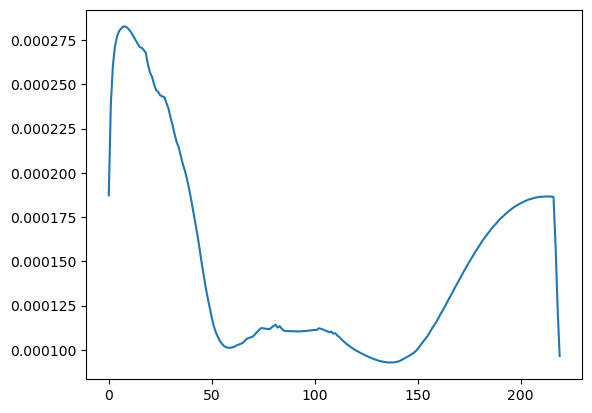

In [16]:
import matplotlib.pyplot as plt
plt.plot(goals)
#plt.plot(rewards)

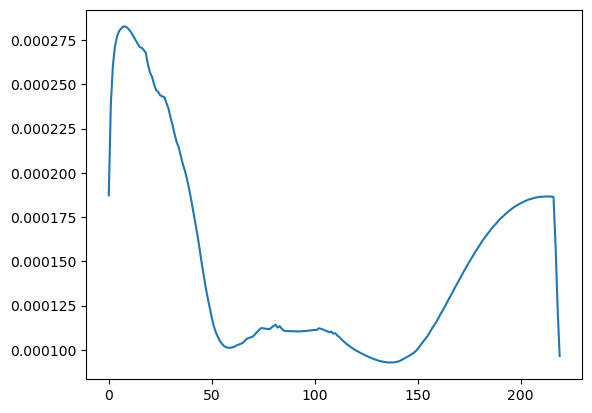

In [15]:
plt.plot(rewards)
#rew2 = [r*1000 for r in rewards]